https://disk.yandex.ru/i/cqlx0RbWTQW6-Q - ссылка на презентацию

#  Финальный проект

#  Ритейл: Анализ результатов внедрения программы лояльности в сети строительных магазинов "Мы строили, строили и наконец построили"  

## Описание проекта
В сети строительных магазинов "Мы строили, строили и наконец построили" 3 месяца назад была введена программа лояльности, в нескольких магазинах клиенты могли приобрести карту лояльности по цене 200р и воспользоваться всеми скидками, бонусами и акциями которые предусматривала эта программа лояльности. С точки зрения собственников сети строительных магазинов - данных вполне достаточно чтобы **оценить результаты** введения программы лояльности **и решить: продолжать, приостановить или ее каким-то образом скорректировать**.
В нашем распоряжении **2 датасета**:   
**retail_dataset.csv** 
Это данные с касс сети магазинов 
и **product_codes.csv**
 данные соответствия ID товара - цене за его единицу

## Описание данных  

**Файл moscow_places.csv:**  
- purchaseid - идентификационный номер чека  
- item_ID - идентификационный номер товара    
- Quantity - количество товара в чеке    
- purchasedate - дата чека (совершения покупки и денежной трансакции)  
- CustomerID - идентификационный  номер покупателя   
- ShopID - идентификационный номер магазина   
- loyalty_program - маркер программы лояльности (1 - клиент имеет карту программы лояльности, 0 - клиент не участвует в программе лояльности)   
  **Файл product_codes.csv:**
- productID - идентификационный номер товара   
- price_per_one - цена за единицу товара в рублях     

**Как работает программа лояльности** на мой взгляд - клиент может получать **скидки** (товар по более низкой цене), **дополнительный товар или услугу бесплатно**. При этом клиент частично компенсирует затраты на программу лояльности **покупая карту лояльности за 200р**. Вполне вероятно что клиент может по этой программе выбирать товар дороже и больше за те же деньги, что он бы потратил и раньше.

<a id='step_0'></a><h3>План работы</h3>

[1. Предобработка](#step_1)   
[1.1 Загрузим необходимые библиотеки](#step_1.1)   
[1.2 Выгрузим данные из файлов csv ](#step_1.2)   
[1.3 выведем информацию о таблице, описание таблицы, уникальные значения столбцов, количество уникальных значений](#step_1.3)   
[1.4 проверим на пропуски, изменим форматы данных, переименуем столбцы для удобства](#step_1.4)   
[1.5 Исследуем столбцы в таблице date](#step_1.5)  
[1.6 Исследуем столбцы в таблице price](#step_1.6)  
[2. Исследовательский анализ](#step_2)   
[2.1. Столбец purchaseId — id (идентификатор покупки)](#step_2.1)    
[2.2 Столбец purchasedate дата покупки](#step_2.2)     
[2.3 Quantity — количество товара](#step_2.3)    
[2.4 CustomerID — id покупателя](#step_2.4)   
[2.5 Столбец loyalty_program ](#step_2.5)   
[2.6 price_per_one - формируем итоговую таблицу с ценами](#step_2.6)   
[2.7. Соединим эту таблицу с исходной таблицей трансакций и посчитаем усредненный средний чек с программой лояльности и без по магазинам](#step_2.7)   
[3. Анализ программы лояльности](#step_3)   
[3.1 Распределение количества чеков, количества товара по дням наблюдений, графики](#step_3.1)    
[3.2  Распределение количества покупателей и количества покупок на человека по дням наблюдений в зависимости от наличия программы лояльности](#step_3.2)    
[3.3 Распределение количества товара на покупателя и размера корзины на человека по дням наблюдений в зависимости от наличия программы лояльности](#step_3.3)    
[3.4 Распределение количества проданного товара по магазинам в зависимости от наличия программы лояльности. Столбчатая диаграмма](#step_3.4)   
[3.5 График зависимости количества проданного товара на покупателя по магазинам](#step_3.5)    
[3.6 График зависимости количества чеков на покупателя по магазинам](#step_3.6)   
[3.7 График зависимости количества товаров в чеке на покупателя по магазинам](#step_3.7)      
[3.8 Формирование сводной исходной таблицы расчеты CAC без маркетинга](#step_3.8)    
[4 Когортный анализ](#step_4)      
[4.1 формирование исходной таблицы](#step_4.1)      
[4.2 создание таблицы профилей](#step_4.2)      
[4.3 расчет Retention Rate  таблицы удержания клиентов](#step_4.3)   
[4.4 тепловая карта Retention Rate  таблицы удержания клиентов](#step_4.4)      
[4.5 расчет накопленной выручки LTV, построение графика lTV и LTV в динамике](#step_4.5)     
[4.6 ROI](#step_4.6)     
[4.7 График истории изменений LTV](#step_4.7)      
[4.8 График Динамика удержания 7-го и 14-го дней жизни](#step_4.8)      
[4.9 Средний и медианные чеки ](#step_4.9)      
[4.10 Retention rate, возьмем когорты не дневные, а недельные и также посмотрим период в 8 недель](#step_4.10)   
[4.10.1 Retention rate для всей таблицы](#step_4.10.0)       
[4.10.2 Retention rate для лояльных клиентов](#step_4.10.2)       
[4.10.3 Retention rate для не лояльных клиентов](#step_4.10.3)       
[5 Формулируем и проверим статистические гипотезы](#step_5)               
[5.1  Гипотеза о среднем чеке](#step_5.1)       
[5.2 Гипотеза о среднем чеке в магазине Shop 0](#step_5.2)     
[5.3 Retention, количество покупок на человека, количество товаров на покупателя или в корзине - статистические гипотезы](#step_5.3)       
[5.4 Вывод по статистическому анализу гипотез ](#step_5.4)            
[6 Результаты исследования, выводы и рекомендации для заказчика](#step_6)   
[7 Рекомендации и материалы для отдела маркетинга и коммерческого департамента ](#step_7)  

<a id='step_1'></a><h3>1. Предобработка</h3>

[К плану работ](#step_0)


<a id='step_1.1'></a><h3>1.1 Загрузим необходимые библиотеки</h3>

In [4]:
#Загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import plotly.graph_objs as go
# импортируем функции для работы со временем
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

<a id='step_1.2'></a><h3>1.2 Выгрузим данные из файлов csv </h3>

[К плану работ](#step_0)  

In [5]:
#Выгрузим данные из файла retail_dataset.csv
data = pd.read_csv('/datasets/retail_dataset.csv')

<a id='step_1.3'></a><h3>1.3 выведем информацию о таблице, описание таблицы, уникальные значения столбцов, количество уникальных значений  </h3>

[К плану работ](#step_0)  

In [6]:
#выводим первые 5 строк таблицы data
display(data.head())
#выводим описание таблицы data
display(data.describe())
#выводим информацию о таблицы data
data.info()

purchaseid item_ID  Quantity         purchasedate  CustomerID  ShopID  \
0     538280   21873        11  2016-12-10 12:50:00     18427.0  Shop 0   
1     538862   22195         0  2016-12-14 14:11:00     22389.0  Shop 0   
2     538855   21239         7  2016-12-14 13:50:00     22182.0  Shop 0   
3     543543   22271         0  2017-02-09 15:33:00     23522.0  Shop 0   
4     543812   79321         0  2017-02-13 14:40:00     23151.0  Shop 0   

   loyalty_program  
0              0.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

Quantity    CustomerID  loyalty_program
count  105335.000000  69125.000000    105335.000000
mean        7.821218  21019.302047         0.226345
std       327.946695   1765.444679         0.418467
min    -74216.000000  18025.000000         0.000000
25%         0.000000  19544.000000         0.000000
50%         2.000000  20990.000000         0.000000
75%         7.000000  22659.000000         0.000000
max     74214.000000  23962.000000         1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


<a id='step_1.4'></a><h3>1.4 проверим на пропуски, изменим форматы данных, переименуем столбцы для удобства</h3>

[К плану работ](#step_0)

In [7]:
# переименуем столбцы в таблице data
data.columns = ['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id', 'shop_id', 'loyalty_program']
data.head()

purchase_id item_id  quantity        purchase_date  customer_id shop_id  \
0      538280   21873        11  2016-12-10 12:50:00      18427.0  Shop 0   
1      538862   22195         0  2016-12-14 14:11:00      22389.0  Shop 0   
2      538855   21239         7  2016-12-14 13:50:00      22182.0  Shop 0   
3      543543   22271         0  2017-02-09 15:33:00      23522.0  Shop 0   
4      543812   79321         0  2017-02-13 14:40:00      23151.0  Shop 0   

   loyalty_program  
0              0.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

In [8]:
#Выгрузим данные из файла product_codes.csv
price = pd.read_csv('/datasets/product_codes.csv')
display(price.head())
display(price.describe())
display('количество уникальных товаров в таблице price', price['productID'].nunique())
price.info()

productID  price_per_one
0    85123A           2.55
1     71053           3.39
2    84406B           2.75
3    84029G           3.39
4    84029E           3.39

price_per_one
count    9969.000000
mean       19.503697
std       330.880754
min         0.000000
25%         1.250000
50%         2.550000
75%         5.510000
max     16888.020000

'количество уникальных товаров в таблице price'

3159

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [9]:
# переименуем столбцы в таблице price
price.columns = ['product_id', 'price_per_one']
price.head()

product_id  price_per_one
0     85123A           2.55
1      71053           3.39
2     84406B           2.75
3     84029G           3.39
4     84029E           3.39

<a id='step_1.5'></a><h3>1.5 Исследуем столбцы в таблице date</h3>

[К плану работ](#step_0)


In [10]:
# исследуем столбцы в таблице date
# исследуем столбец 'purchase_id'
display('уникальные значения столбца purchase_id', data['purchase_id'].unique())
display('количество чеков в таблице всего')
display(data['purchase_id'].nunique())
display('количество чеков в таблице с программой лояльности')
display(data[data['loyalty_program'] == 1.0]['purchase_id'].nunique())
display('количество чеков в таблице без программы лояльности')
display(data[data['loyalty_program'] == 0.0]['purchase_id'].nunique())

'уникальные значения столбца purchase_id'

array(['538280', '538862', '538855', ..., '540564', '542572', 'C541650'],
      dtype=object)

'количество чеков в таблице всего'

4894

'количество чеков в таблице с программой лояльности'

1344

'количество чеков в таблице без программы лояльности'

3550

In [11]:
# исследуем столбец 'item_id'
display(data['item_id'].unique())
display('количество уникальных товаров в таблице data', len(data['item_id'].unique()))

array(['21873', '22195', '21239', ..., '90053', '17028J', '79320'],
      dtype=object)

'количество уникальных товаров в таблице data'

3159

In [12]:
# исследуем столбец 'quantity'
display(data['quantity'].unique())
display('количество уникальных значений количества товаров в строке таблицы data', len(data['quantity'].unique()))

array([    11,      0,      7,      1,      5,      4,      3,      9,
           35,     23,      2,     71,     -2,    103,      6,     24,
          383,    -25,     18,     19,     95,    143,      8,     47,
           17,     20,     14,    -11,     12,     99,     39,     49,
          239,     25,     31,    -31,     29,    -61,     13,     15,
           28,    -13,     -3,     -8,   -101,    -10,   -940,     59,
          199,     27,     22,    119,    287,     37,     -9,     46,
           -5,    -81,     10,     -4,     -6,    215,    -41,     69,
          -16,    -26,   -724,     -7,   -100,     30,    479,   -193,
          -33,   2399,    -15,    191,     21,     63,    -24,    299,
          -19,   1295,    107,     79,     26,    140,    -17,    -14,
          359,    323,     32,   1007,     48,     64,    179,    251,
          -21,    -37,   1286,    -34,    599,    207,     33,    -36,
           52,   -145,     83,     43,    -54,    -65,     68,    503,
      

'количество уникальных значений количества товаров в строке таблицы data'

301

In [13]:
# исследуем столбец 'purchase_date'
# приводим столбец 'purchase_date' к временному формату
data['purchase_date'] = pd.to_datetime(data['purchase_date']) 
# добавляем столбец 'purchase_day' - дата чека(трансакции)
data['purchase_day'] = pd.to_datetime(data['purchase_date']).dt.date
#data.info()
data.head()
first_purchase_date = data['purchase_date'].min()
print('старт наблюдений', first_purchase_date)
last_purchase_date = data['purchase_date'].max()
print('конец наблюдений', last_purchase_date)
print('длительность наблюдений', (last_purchase_date-first_purchase_date).days, 'дней')
print()
print()
# приводим столбец 'purchase_day' к временному формату
data['purchase_day'] = pd.to_datetime(data['purchase_day'])
data.info()
data_start_loyalty = data[data['loyalty_program'] == 1.0]['purchase_date'].min()
print()
print('старт программы лояльности', data_start_loyalty)

старт наблюдений 2016-12-01 08:26:00
конец наблюдений 2017-02-28 17:04:00
длительность наблюдений 89 дней


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  float64       
 7   purchase_day     105335 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.4+ MB

старт программы лояльности 2016-12-01 08:26:00


In [14]:
# исследуем столбец 'customer_id'
display(data['customer_id'].unique())
display('количество уникальных покупателей в таблице data', len(data['customer_id'].unique()))
display('количество уникальных покупателей в таблице data, участвующих в программе лояльности', 
        len(data[data['loyalty_program'] == 1.0]['customer_id'].unique()))
display('количество уникальных покупателей в таблице data, не участвующих в программе лояльности', 
        len(data[data['loyalty_program'] == 0.0]['customer_id'].unique()))

array([18427., 22389., 22182., ..., 20156., 20358., 23763.])

'количество уникальных покупателей в таблице data'

1750

'количество уникальных покупателей в таблице data, участвующих в программе лояльности'

587

'количество уникальных покупателей в таблице data, не участвующих в программе лояльности'

1163

In [15]:
display(data['shop_id'].unique())
print('количество магазинов в сети', len(data['shop_id'].unique()))

array(['Shop 0', 'Shop 1', 'Shop 4', 'Shop 6', 'Shop 2', 'Shop 11',
       'Shop 3', 'Shop 5', 'Shop 7', 'Shop 12', 'Shop 8', 'Shop 27',
       'Shop 10', 'Shop 20', 'Shop 19', 'Shop 25', 'Shop 14', 'Shop 21',
       'Shop 18', 'Shop 9', 'Shop 16', 'Shop 28', 'Shop 29', 'Shop 17',
       'Shop 22', 'Shop 13', 'Shop 26', 'Shop 24', 'Shop 15', 'Shop 23',
       'Shop 30'], dtype=object)

количество магазинов в сети 31


In [16]:
# исследуем столбец 'loyalty_program'
display('уникальные значения столбца loyalty_program', data['loyalty_program'].unique())
display('количество строк в таблице с программой лояльности и без')
display(len(data['loyalty_program']))
display('количество строк в таблице с программой лояльности')
display(len(data[data['loyalty_program'] == 1.0]))
display('количество строк в таблице без программы лояльности')
display(len(data[data['loyalty_program'] == 0.0]))

'уникальные значения столбца loyalty_program'

array([0., 1.])

'количество строк в таблице с программой лояльности и без'

105335

'количество строк в таблице с программой лояльности'

23842

'количество строк в таблице без программы лояльности'

81493

In [17]:
display(data.isna().sum())
data_duplicates = data.duplicated().sum()
display('количество явных дубликатов в таблице', data_duplicates)
percent_dupicates_data = round(len(data['purchase_id']),2)
display('доля дубликатов в таблице data,%', round(100*data_duplicates/percent_dupicates_data, 2))
# удаляем дубликаты
data = data.drop_duplicates().reset_index(drop = True)
display(data.isna().sum())
data.info()

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
shop_id                0
loyalty_program        0
purchase_day           0
dtype: int64

'количество явных дубликатов в таблице'

1033

'доля дубликатов в таблице data,%'

0.98

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36148
shop_id                0
loyalty_program        0
purchase_day           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      68154 non-null   float64       
 5   shop_id          104302 non-null  object        
 6   loyalty_program  104302 non-null  float64       
 7   purchase_day     104302 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.4+ MB


Удалив 1033 (менее 1%) явных дубликата в таблице мы избавились от 62 пропусков в столбце customer_id

<a id='step_1.6'></a><h3>1.6 Исследуем столбцы в таблице price</h3>

[К плану работ](#step_0)


In [18]:
# исследуем столбцы в таблице price
# исследуем столбец 'product_id'
price['product_id'].unique()
print('количество уникальных товаров в таблице price:', len(price['product_id'].unique()))

количество уникальных товаров в таблице price: 3159


Количество уникальных товаров в таблицах data и price одинаково

In [19]:
# исследуем количество явных дубликатов в таблице price
print('количество явных дубликатов в таблице price:', price.duplicated().sum())

количество явных дубликатов в таблице price: 0


In [20]:
display('количество вариантов цен в таблице price', len(price['price_per_one'].unique()))
price.sort_values(by=['product_id']).head(10)

'количество вариантов цен в таблице price'

586

product_id  price_per_one
31        10002           0.85
8122      10002           1.63
2459      10002           1.66
9886      10080           0.85
2432      10120           0.21
2431     10123C           0.65
3623     10124A           0.42
2098     10124G           0.42
4901      10125           0.42
3542      10125           1.66

Выведя верх таблицы price мы видим, что однму товару может соответствовать несколько вариантов цен.   
Это означает что соединение двух таблиц по идентификатору товара - невозможно.

##### Вывод по разделу Предобработка:   
В таблице data, сформированной из файла retail_dataset.csv 105335 строк и 7 столбцов. Форматы столбцов: float64(2), int64(1), object(4). Все столбы полные без пропусков кроме 'CustomerID'.  
Столбец даты совершения покупки 'purchasedate' имеет строчный формат вместо формата даты и времени.  
Столбец 'Quantity' имеет большой разброс значений от -74216 до 74214 - скорее всего это ошибка.   
Для удобства переименовываем столбцы таблицы data в соотвествии с общепринятыми правилами - строчные буквы, пробелы заменены на нижнее подчеркивание, id (идентификатор) отделен от названия нижним подчеркиванием.   
Таблица price сформированная из файла product_codes.csv имеет 2 столбца и 9969 строк, пропусков нет. Переименовываем столбецы в змеином регистре.   
Количество уникальных товаров в таблице price - 3159. Минимальная цена 0, максимальная 16888 рублей. Средняя цена 19.5, медианная цена 2.55 рублей, следовательно в таблице price столбце 'product_id' много выбросов.    
Стобцы таблицы data:  
'item_id'(идентификатор товара):  
количество уникальных товаров в таблице data - 3159, соответствует количеству уникальных товаров в таблице price.   
'quantity'(количество товара):   
количество уникальных значений количества товаров в строке таблицы data - 301, причем в столбце есть как положительные значения, так и отрицательные.   
'purchase_date'(дата и время совершения покупки):    
приводим столбец 'purchase_date' к временному формату, добавляем столбец 'purchase_day' - дата чека(трансакции)    
старт наблюдений 2016-12-01 08:26:00    
конец наблюдений 2017-02-28 17:04:00    
длительность наблюдений 89 дней    
старт программы лояльности 2016-12-01 08:26:00 (совпадает с началом исследования).   
'customer_id':   
количество уникальных покупателей в таблице data - 1750   
количество уникальных покупателей в таблице data, участвующих в программе лояльности - 587,    
количество уникальных покупателей в таблице data, не участвующих в программе лояльности - 1163. Покупателей участвующих в программе лояльности почти в 2 раза меньше чем обычных покупателей.    
'shop_id':    
Всего магазинов в сети - 31.    
'loyalty_program:    
В столбце всего 2 уникальных значения 0.0 и 1.0. Количество строк в таблице с программой лояльности и без - 105335. Количество строк в таблице с программой лояльности - 23842, количество строк в таблице без программы лояльности - 81493.    
Проверив таблицу data на явные дубликаты мы обнаружили 1033 (менее 1%) явных дубликата, удалив их мы одновременно избавились от  62 пропусков в столбце customer_id.    
Явных дубликатов в таблице price нет.    
Количество вариантов цен в таблице price - 586, причем одному идентификатору товара может соответствовать несколько вариантов цен.    

<a id='step_2'></a><h3>2 Исследовательский анализ</h3>

[К плану работ](#step_0)

Изучим следующие параметры датасетов: 

<a id='step_2.1'></a><h3>2.1 Столбец purchaseId — id (идентификатор покупки)</h3>
Определм соотношение количества позиций покупок с программой лояльности и без в магазинах где она действует - по каждому магазину и по всем где она есть.   

In [21]:
#создадим таблицу количества чеков по магазинам
data_purchase =  data.groupby(['shop_id', 'loyalty_program'])['purchase_id'].count().sort_values(ascending=False).reset_index()
display('таблица позиций в чеках по магазинам', data_purchase)
# посчитаем количество позиций в чеках всего
data_purchase_total = data_purchase['purchase_id'].sum()
# посчитаем количество позиций в чеках по программе лояльности всего
data_purchase_total_loyalty = data_purchase[data_purchase['loyalty_program'] == 1.0]['purchase_id'].sum()
display('всего количество позиций в чеках ', data_purchase_total)
# выведем на экран долю позиций в чеках по программе лояльности
print('доля количества позиций в чеках по программе лояльности во всех магазинах, %', round((100*data_purchase_total_loyalty/data_purchase_total), 2))
# переименовываем колонки
data_purchase.columns = ['shop_id','loyalty_program', 'purchase_count']
#создадим столбец доли количества позиций в чеках по отношению к всем количествам позиций в чеках
data_purchase['share,%'] = round(100*data_purchase['purchase_count']/data_purchase_total, 2)
#выдели таблице только магазин 0
purchase_shop_0 = data_purchase.query('shop_id == "Shop 0"')
# посчитаем долю количества позиций в чеках по программе лояльности в магазине 0
share_loyalty_shop_0 = purchase_shop_0[purchase_shop_0['loyalty_program'] == 1.0]['purchase_count']/purchase_shop_0[purchase_shop_0['loyalty_program'] == 0.0]['purchase_count']
c = int(purchase_shop_0[purchase_shop_0['loyalty_program'] == 1.0]['purchase_count'])/int(purchase_shop_0[purchase_shop_0['loyalty_program'] == 0.0]['purchase_count'])
print('доля количества позиций в чеках по программе лояльности в магазине "Shop 0":', round(100*c, 2), '%')
print()

data_purchase

'таблица позиций в чеках по магазинам'

shop_id  loyalty_program  purchase_id
0    Shop 0              0.0        73099
1    Shop 0              1.0        23271
2    Shop 4              0.0         1739
3    Shop 1              0.0         1540
4    Shop 6              0.0         1030
5    Shop 8              0.0          497
6    Shop 3              0.0          492
7    Shop 7              0.0          312
8   Shop 10              0.0          299
9   Shop 12              0.0          278
10  Shop 18              0.0          255
11   Shop 2              0.0          252
12   Shop 5              0.0          179
13  Shop 11              0.0          169
14  Shop 14              0.0          154
15   Shop 8              1.0           63
16   Shop 9              0.0           61
17  Shop 15              0.0           60
18  Shop 16              0.0           59
19  Shop 26              0.0           56
20  Shop 25              0.0           53
21  Shop 19              1.0           48
22  Shop 27              0.0           45
23  Shop 22              0.0           40
24  Shop 17              0.0           40
25  Shop 13              0.0           35
26  Shop 21              0.0           32
27  Shop 24              0.0           32
28  Shop 28              1.0           30
29  Shop 20              0.0           30
30  Shop 19              0.0           26
31  Shop 30              0.0           15
32  Shop 29              0.0            9
33  Shop 23              0.0            2

'всего количество позиций в чеках '

104302

доля количества позиций в чеках по программе лояльности во всех магазинах, % 22.45
доля количества позиций в чеках по программе лояльности в магазине "Shop 0": 31.83 %



shop_id  loyalty_program  purchase_count  share,%
0    Shop 0              0.0           73099    70.08
1    Shop 0              1.0           23271    22.31
2    Shop 4              0.0            1739     1.67
3    Shop 1              0.0            1540     1.48
4    Shop 6              0.0            1030     0.99
5    Shop 8              0.0             497     0.48
6    Shop 3              0.0             492     0.47
7    Shop 7              0.0             312     0.30
8   Shop 10              0.0             299     0.29
9   Shop 12              0.0             278     0.27
10  Shop 18              0.0             255     0.24
11   Shop 2              0.0             252     0.24
12   Shop 5              0.0             179     0.17
13  Shop 11              0.0             169     0.16
14  Shop 14              0.0             154     0.15
15   Shop 8              1.0              63     0.06
16   Shop 9              0.0              61     0.06
17  Shop 15              0.0              60     0.06
18  Shop 16              0.0              59     0.06
19  Shop 26              0.0              56     0.05
20  Shop 25              0.0              53     0.05
21  Shop 19              1.0              48     0.05
22  Shop 27              0.0              45     0.04
23  Shop 22              0.0              40     0.04
24  Shop 17              0.0              40     0.04
25  Shop 13              0.0              35     0.03
26  Shop 21              0.0              32     0.03
27  Shop 24              0.0              32     0.03
28  Shop 28              1.0              30     0.03
29  Shop 20              0.0              30     0.03
30  Shop 19              0.0              26     0.02
31  Shop 30              0.0              15     0.01
32  Shop 29              0.0               9     0.01
33  Shop 23              0.0               2     0.00

##### Вывод:  
Из анализа мы видим, что в среднем доля количества позиций в чеках по программе лояльности по всем магазинам - 22,45%. Отсортировав данные по магазинам и по участию в программе лояльности и просуммировав количества позиций в чеках мы получили результат: максимальное количество позиций в чеках в наблюдаемый период были выбиты в магазине Shop 0. Соотношение количества позиций в чеках по программе лояльности к общей сумме количества позиций в чеках в нем выше чем вцелом по всем остальным магазинам и составляет 31,83%. То есть у программы лояльности есть потенциал роста ассортимента приобретаемого товара.  

<a id='step_2.2'></a><h3>2.2 Столбец purchasedate дата покупки</h3>

[К плану работ](#step_0)   
Вычислим первую и последнюю даты покупки

In [22]:
print('Магазины, участвующие в программе лояльности')
list_loyalty_shop = ['Shop 0', 'Shop 8', 'Shop 19', 'Shop 28']
for elem in list_loyalty_shop:
    data_elem = data[data['shop_id'] == elem]
    data_start_elem = data_elem['purchase_date'].min()
    data_end_elem = data_elem['purchase_date'].max()
    data_start_loyalty_elem = data_elem[data_elem['loyalty_program'] == 1.0]['purchase_date'].min()
    print(elem)
    print('старт программы лояльности ', data_start_loyalty_elem)
    print('старт работы магазина ', data_start_elem)
    print('последний день работы магазина в датасете', data_end_elem)
    print('длительность наблюдений', (last_purchase_date-data_start_loyalty_elem).days, 'дней')
    print('программа лояльности введена через', (data_start_loyalty_elem-data_start_elem).days, 'дней')

Магазины, участвующие в программе лояльности
Shop 0
старт программы лояльности  2016-12-01 08:26:00
старт работы магазина  2016-12-01 08:26:00
последний день работы магазина в датасете 2017-02-28 17:04:00
длительность наблюдений 89 дней
программа лояльности введена через 0 дней
Shop 8
старт программы лояльности  2016-12-09 14:55:00
старт работы магазина  2016-12-03 12:20:00
последний день работы магазина в датасете 2017-02-18 12:21:00
длительность наблюдений 81 дней
программа лояльности введена через 6 дней
Shop 19
старт программы лояльности  2016-12-14 13:27:00
старт работы магазина  2016-12-14 13:27:00
последний день работы магазина в датасете 2017-02-01 15:41:00
длительность наблюдений 76 дней
программа лояльности введена через 0 дней
Shop 28
старт программы лояльности  2017-02-14 12:46:00
старт работы магазина  2017-02-14 12:46:00
последний день работы магазина в датасете 2017-02-14 12:46:00
длительность наблюдений 14 дней
программа лояльности введена через 0 дней


In [23]:
# проверяем работал ли магазин 19 после закрытия программы лояльности
purchase_shop_19 = data[data['shop_id']=='Shop 19'].query('loyalty_program == 0.0')
print('последняя дата работы магазина 19 без программы лояльности')
purchase_shop_19['purchase_date'].max()
#выдели таблице только магазин 0
#purchase_shop_0 = data_purchase.query('shop_id == "Shop 0"')

последняя дата работы магазина 19 без программы лояльности


Timestamp('2017-02-01 15:41:00')

##### Вывод:  
Всего программма лояльности задействована в 4-х магазинах.   
В трех из этих магазинов программа лояльности стартовала с момента открытия магазина(дата первого чека). Магазин 8 - программа лояльности стартовала через 6 дней от момента первого чека.  
Последняя дата трансакций в лояльных магазинах "дожила" до окончания исследования лишь в магазине 0.   
Магазин 28 первая и последняя дата и время покупки совпадает - скорее всего 30 чеков в одно и то же время - это ошибка.  
Даты перых чеков в магазинах отстоят от даты начала исследования дальше с возрастанием номера магазина. Логично предположить что магазины открывались последовательно один за другим.
Примечательно что в магазине 19 последний чек был пробит за месяц до конца исследования как с программой лояльности так и без нее. Значит магазин месяц не работал.

<a id='step_2.3'></a><h3>2.3 Столбец Quantity количество товара </h3>

[К плану работ](#step_0)    
- исследование аномалий, решение что можно отбросить и заменить, определим зависимость среднего количества товара от магазина (с и без программы лояльности), количество товара на покупателя по магазинам и по прогр лояльности и без

In [24]:
# посмотрим описание столбца 'quantity'
display(data[['quantity']].describe())
display('количество вариантов количества товаров всего:', data['quantity'].nunique())
display('максимальное количество товаров в программе лояльности:', data[data['loyalty_program'] == 1.0]['quantity'].max())
display('максимальное количество товаров без программы:', data[data['loyalty_program'] == 0.0]['quantity'].max())
display('минимальное количество товаров в программе лояльности:', data[data['loyalty_program'] == 1.0]['quantity'].min())
display('минимальное количество товаров без программы лояльности:', data[data['loyalty_program'] == 0.0]['quantity'].min())
display('количество товара с отрицательными количеством товара всего', data['quantity'].sum())
display('количество товара при положительном количестве товара всего', data['quantity'].abs().sum())

quantity
count  104302.000000
mean        7.883003
std       329.565540
min    -74216.000000
25%         0.000000
50%         2.000000
75%         7.000000
max     74214.000000

'количество вариантов количества товаров всего:'

301

'максимальное количество товаров в программе лояльности:'

3905

'максимальное количество товаров без программы:'

74214

'минимальное количество товаров в программе лояльности:'

-241

'минимальное количество товаров без программы лояльности:'

-74216

'количество товара с отрицательными количеством товара всего'

822213

'количество товара при положительном количестве товара всего'

1061321

##### Вывод:    
Мы видим в столбце 'quantity' большие выбросы в обе стороны. Вариантов количества товара - 301, не так уж и много. Максимальное количесво товара по программе лояльности 3905, без программы лояльности 74216. Минимальное количество товара по программе лояльности минус 241, без программы - минус 74216. Сумма проданного товара всего, если оставить отрицательные количества товара 822213, если количество товара сделать все положительным, то 1061321. Таким образом, почти 78000 единиц товара, а это 22,5% "теряются" из-за отрицательных количества. Значит оставлять так как есть - нельзя, меняем знак количества товара.

In [25]:
# выведем на экран строки со слишком большими положительными и отрицательными значениями количества товаров
big = data.query('quantity in [-9361, 5567, 74214, -74216]')
big

purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
31870      542504   37413      5567 2017-01-28 12:03:00          NaN  Shop 0   
39189     C536757   84347     -9361 2016-12-02 14:23:00      21517.0  Shop 0   
49166     C541433   23166    -74216 2017-01-18 10:17:00      18025.0  Shop 0   
68612      541431   23166     74214 2017-01-18 10:01:00      18025.0  Shop 0   

       loyalty_program purchase_day  
31870              0.0   2017-01-28  
39189              0.0   2016-12-02  
49166              0.0   2017-01-18  
68612              0.0   2017-01-18

Три строки снизу похожи на ошибки: 3-я и 4-я строки отличаются только минутами пробития чека и обозначением чека. 2-я и 3-я строки имеют похожий идентификатор чека - судя по всему кассовые аппараты с чеками C54... и С53... выдавали ошибки и печатали ошибочное количество товаров со знаком минус. 

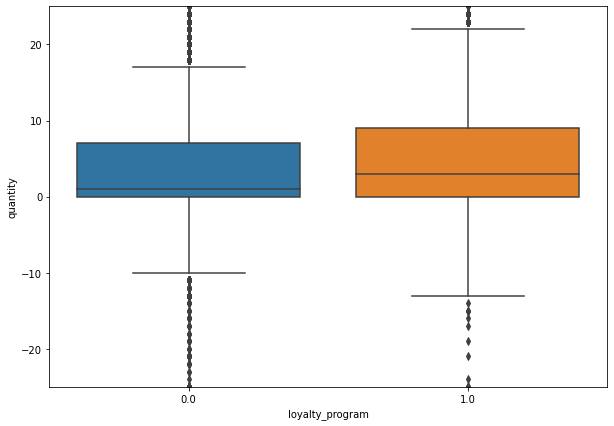

In [26]:
#строим ящик с усами по количеству товаров в зависимости от наличия программы лояльности
plt.figure(figsize=(10, 7))

plt.ylim([-25, 25])
ax = sns.boxplot(x='loyalty_program', y='quantity', data=data) 
plt.show()

Количество товара купленного с программой лояльности стало больше: разброс между первым и 3-м квартилем больше и медиана выше, а выбросы стали реже.

In [27]:
# добавим столбец в таблицу с количеством товара в абсолютной величине ()
data['positive_quant'] = data['quantity'].abs()
display(data.describe())

quantity   customer_id  loyalty_program  positive_quant
count  104302.000000  68154.000000    104302.000000   104302.000000
mean        7.883003  21011.165889         0.224464       10.175462
std       329.565540   1766.665163         0.417231      329.502726
min    -74216.000000  18025.000000         0.000000        0.000000
25%         0.000000  19533.000000         0.000000        0.000000
50%         2.000000  20977.000000         0.000000        2.000000
75%         7.000000  22633.000000         0.000000        8.000000
max     74214.000000  23962.000000         1.000000    74216.000000

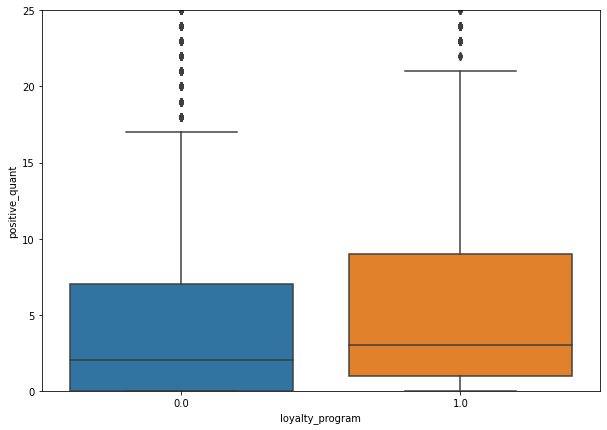

In [28]:
#строим ящик с усами по количеству товаров в зависимости от наличия программы лояльности
plt.figure(figsize=(10, 7))

plt.ylim([0, 25])
ax = sns.boxplot(x='loyalty_program', y='positive_quant', data=data) 
plt.show()

Если мы изменяем минус в количестве товара на плюс, то в программе лояльности первый квартиль уже не 0.

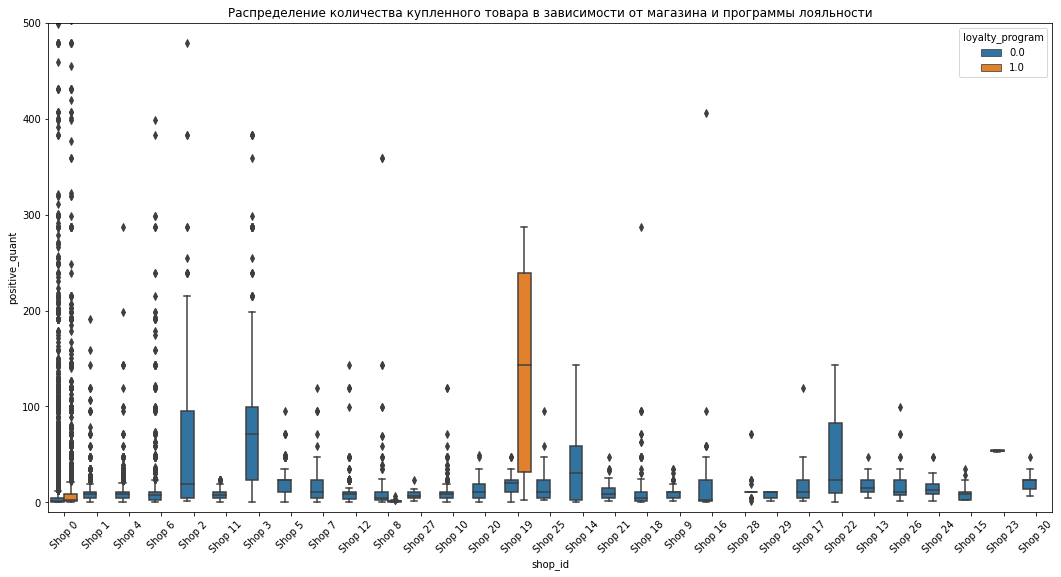

In [29]:
#строим ящик с усами по количеству товаров в зависимости от наличия программы лояльности
plt.figure(figsize=(18, 9))
ax = sns.boxplot(x='shop_id', y='positive_quant', hue='loyalty_program', data=data) 
plt.ylim([-10, 500])
plt.xticks(rotation=45)
plt.title('Распределение количества купленного товара в зависимости от магазина и программы лояльности')
plt.show()


##### Вывод:     
Распределение количества товаров в чеке между магазинами показывает что магазин 19 имеет самое высокое медианное число купленных товаров. И в этом магазине практически нет выбросов.  
Как мы уже раньше исследовали - в этом магазине чеков по программе лояльноти почти в 2 раза больше чем без нее.  
Скорее всего маркетологам надо присмотреться к Shop 19 - возможно в нем созданы условия для покупок большого количества товаров и это дает результат. Возникает вопрос - почему магазин 19 месяц не работал? Вполне возможно что программа лояльности в нем дала неожиданный результат, ведь количество товара, купленного по акции может свидетельствовать о потерях магазина.  
В магазине Shop 0 - в котором пробивается более 90% чеков медианнное число купленных товаров низкое и много выбросов. Скорее всего этот магазин имеет очень большой ассортимент товаров и находится в проходном месте, что способствует притоку посетителей, однако их нельзя назвать оптовыми - скорее всего в него заходят за всякой мелочевкой.
Кандидатами на запрет внедрения программы лояльности могли бы стать магазины Shop 3, Shop 14, Shop 2, Shop 2, Shop 22. У них  высокие медианные значения количества товара(смотри на магазин 19).  
Аутсайдерами оптовых продаж являются магазины 11, 5, 27, 20, 25, 21, 9, 29, 27, 15, 30 - в них низкое количество проданного товара и нет выбросов. Именно эти магазины и рекомендуется подключать к программе лояльности для стимулирования продаж.

In [30]:
# выведем значения перцентилей для столбца 'quantity' и 'positive_quant'
print(np.percentile(data['quantity'], [90, 95, 99])) 
print(np.percentile(data['positive_quant'], [90, 95, 99])) 

[19. 24. 99.]
[19. 24. 99.]


отбросим 1% значений установив уровень отсечения количества товаров на уровне 100.

In [31]:
data = data.query('positive_quant < 100')

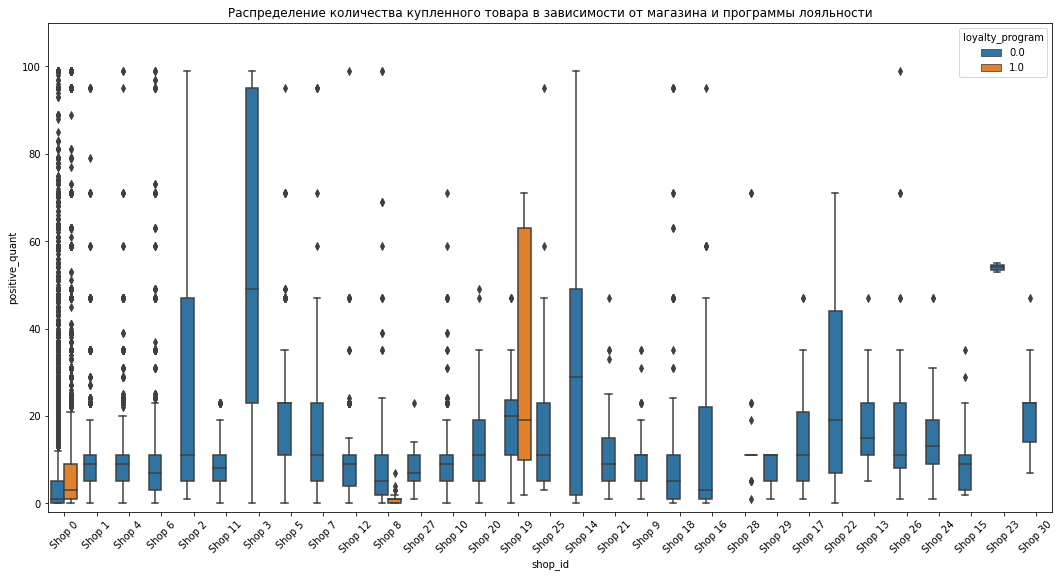

In [32]:
#строим ящик с усами по количеству товаров в зависимости от наличия программы лояльности
plt.figure(figsize=(18, 9))

ax = sns.boxplot(x='shop_id', y='positive_quant', hue='loyalty_program', data=data) 
plt.ylim([-2, 110])
plt.xticks(rotation=45)
plt.title('Распределение количества купленного товара в зависимости от магазина и программы лояльности')
plt.show()


##### Вывод:     
В магазине Shop 8 программа лояльности не приносит ожидаемого результата медианное количество товара без программы лояльности выше чем с ней. Похоже покупатели в этом магазине получают скидки и подарки и не считают нужным купить больше.  
Также нужно обратить внимание на Shop 23 - у него высокое медианное количество покупок, при условии всего 2-х чеков за все время наблюдений, если он открыт недавно, и чеков будет больше - то это еще один кандидат на исключение из программы лояльности.

In [33]:
# выведем дату начала работы магазина Shop 23
data_23 = data[data['shop_id'] == 'Shop 23']
data_start_23 = data_23['purchase_date'].min()
data_start_23

Timestamp('2016-12-20 11:02:00')

Увы, но магазин открыт давно и 2 крупных чека - не показатель. Есть вероятность что этот магазин открыт рядом с новостройками в которых делают ремонт или даже что-то строят, потому что крупные заказы делают строители и отделочники.

<a id='step_2.4'></a><h3>2.4 Столбец CustomerID - id покупателя</h3>

[К плану работ](#step_0)   
Решаем в каких случаях стоит отбросить данные с пропусками в этом столбце (построим ящики с усами по магазинам и определим выбросы, посчитаем количество покупок после удаления выбросов, решим стоит ли это делать Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили. Общий результат удаления
решим что делать с отрицательным количеством товара)

In [34]:
# удаляем пропуски в идентификаторах покупателей, иначе они исказят статистику 
data_not_nan = data.dropna()
# группируем данные по дате наблюдений считеам количество уникальных чеков, 
#сумму количества товара и количество уникальных покупателей в день
data_purchase_date = data_not_nan.groupby(
    ['purchase_day', 'shop_id', 'loyalty_program']).agg({'purchase_id':'nunique', 'quantity':'sum', 'customer_id': 'nunique'}
    ).reset_index()
data_purchase_date.columns = ['purchase_day', 'shop_id', 'loyalty_program', 'purchase_nunique', 'quantity_sum', 'customer_nunique']
# добавляем столбец количество чеков на покупателя в день
data_purchase_date['purchase_per_cust'] = data_purchase_date['purchase_nunique']/data_purchase_date['customer_nunique']
# добавляем столбец количество товара на покупателя в день
data_purchase_date['quantity_per_cust'] = data_purchase_date['quantity_sum']/data_purchase_date['customer_nunique']
# добавляем столбец количество количество товара в чеке  на покупателя в день
data_purchase_date['purchase_quantity_per_cust'] = (data_purchase_date['quantity_sum']/data_purchase_date['purchase_nunique']
                                                   )/data_purchase_date['customer_nunique']
data_purchase_date.head()


purchase_day shop_id  loyalty_program  purchase_nunique  quantity_sum  \
0   2016-12-01  Shop 0              0.0                65          8780   
1   2016-12-01  Shop 0              1.0                49          4306   
2   2016-12-01  Shop 1              0.0                 1           429   
3   2016-12-01  Shop 2              0.0                 1            93   
4   2016-12-01  Shop 3              0.0                 1            95   

   customer_nunique  purchase_per_cust  quantity_per_cust  \
0                54           1.203704         162.592593   
1                36           1.361111         119.611111   
2                 1           1.000000         429.000000   
3                 1           1.000000          93.000000   
4                 1           1.000000          95.000000   

   purchase_quantity_per_cust  
0                    2.501425  
1                    2.441043  
2                  429.000000  
3                   93.000000  
4                   95.000000

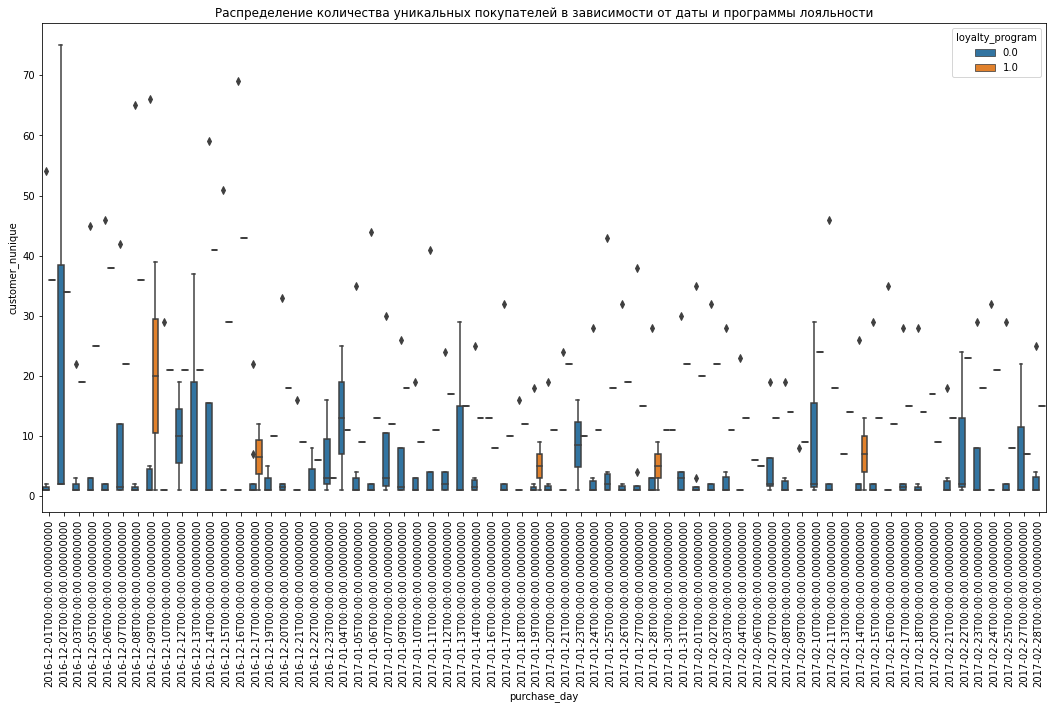

In [35]:
#строим ящик с усами по количеству уникальных покупателей в зависимости от наличия программы лояльности по датам
plt.figure(figsize=(18, 9))

ax = sns.boxplot(x='purchase_day', y='customer_nunique', hue='loyalty_program', data=data_purchase_date) 
plt.xticks(rotation=90)
plt.title('Распределение количества уникальных покупателей в зависимости от даты и программы лояльности')
plt.show()

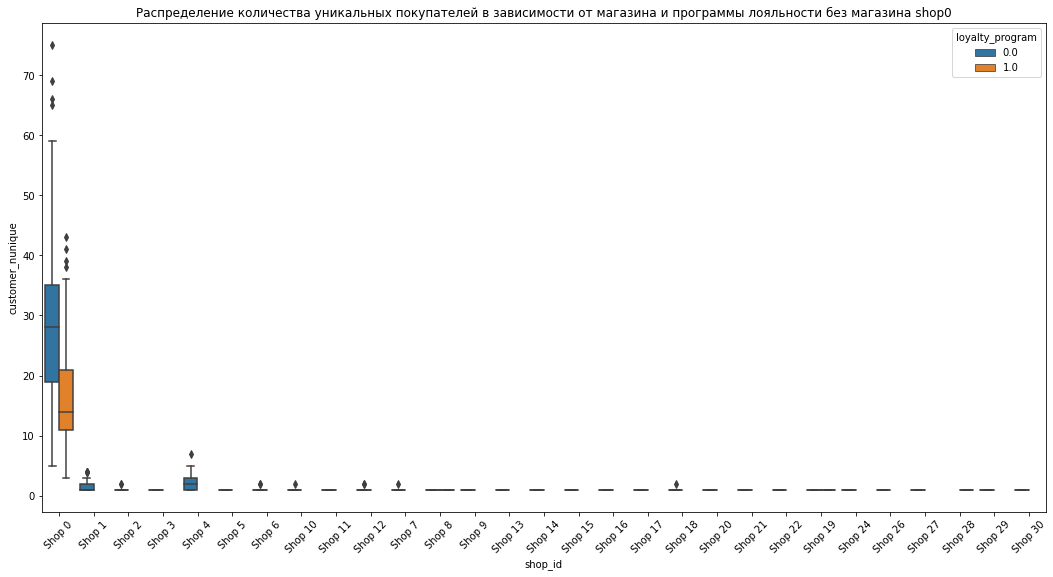

In [36]:
#строим ящик с усами по количеству уникальных покупателей в зависимости от наличия 
#программы лояльности по магазинам не учитываем магазин shop0
plt.figure(figsize=(18, 9))

ax = sns.boxplot(x='shop_id', y='customer_nunique', hue='loyalty_program', data=
                 data_purchase_date) 
plt.xticks(rotation=45)
plt.title('Распределение количества уникальных покупателей в зависимости от магазина и программы лояльности без магазина shop0')
plt.show()

##### Вывод:     
Столбец "customer_id" имеет 36148 пропусков, это более трети данных в таблице. Удалять их не нужно, но мы будем отсекать строки с пустыми значениями в этом столбце когда будем рассчитывать значения на уникального пользователя.   
Пустое поле "customer_id" -  скорее всего это оплата за наличный расчет, таким образом невозможно определить сколт=ько всего уникальных посетителей реально было в магазинах сети. Это могло быть и 1 человек и 100.  
На диаграмме "ящик с усами" распределения уникальных покупателей по дням наблюдений мы видим, что по программе лояльности ящики присутствуют дискретно в 5-ти днях наблюдений, в то время как без программы лояльности боксов больше. причем в те дни где есть боксы по программе лояльности количество уникальных покупателей без программы лояльности ниже чем с ней. Это всё может свидетельствовать о разовых акциях по программе лояльности в эти дни, на которые откликаются владельцы карт лояльности и поэтому покупателей по программе лояльности становится больше чем обычных покупателей. Таким образом можно сделать вывод, что маркетинговая управляемость лояльных клиентов находится на высоом уровне.   
Однако львиная доля лояльных клиентов посещает Shop 0  и из-за большой проходимости - медиана количества лояльных пользователей во все дни наблюдений ниже чем не лояльных.

<a id='step_2.5'></a><h3>2.5  Столбец loyalty_program </h3>

[К плану работ](#step_0)    

участвует ли покупатель в программе лояльности - определим как распределяется количество покупателей, чеков и товаров по программе лояльности и без в отсортированных магазинах;  


In [37]:
data['loyalty_program'].value_counts()

0.0    80211
1.0    23173
Name: loyalty_program, dtype: int64

Количество лояльныых клиентов 22,4%   
Сформируем таблицу обещего датасета data_purchase_date_1 и таблицу для анализа программы лояльности data_purchase_date_2

In [38]:
#Сформируем таблицу обещего датасета data_purchase_date_1
data_purchase_date_1 =data.groupby(['purchase_day']).agg({'purchase_id':'nunique', 'quantity':'sum', 'customer_id': 'nunique'}
    ).reset_index()
data_purchase_date_1.columns = ['purchase_day', 'purchase_nunique', 'quantity_sum', 'customer_nunique']
# добавляем столбец количество чеков на покупателя в день
data_purchase_date_1['purchase_per_cust'] = data_purchase_date_1['purchase_nunique']/data_purchase_date_1['customer_nunique']
# добавляем столбец количество товара на покупателя в день
data_purchase_date_1['quantity_per_cust'] = data_purchase_date_1['quantity_sum']/data_purchase_date_1['customer_nunique']
# добавляем столбец количество количество товара в чеке  на покупателя в день
data_purchase_date_1['purchase_quantity_per_cust'] = (data_purchase_date_1['quantity_sum']/data_purchase_date_1['purchase_nunique']
                                                   )/data_purchase_date_1['customer_nunique']
data_purchase_date_1

purchase_day  purchase_nunique  quantity_sum  customer_nunique  \
0    2016-12-01               138         17434                97   
1    2016-12-02               160         17206               113   
2    2016-12-03               101         10870                54   
3    2016-12-05                95         11551                76   
4    2016-12-06               131         14760                89   
..          ...               ...           ...               ...   
63   2017-02-23                63          9266                50   
64   2017-02-24                66          9380                57   
65   2017-02-25                49          8387                42   
66   2017-02-27                35          3882                31   
67   2017-02-28                60          7662                48   

    purchase_per_cust  quantity_per_cust  purchase_quantity_per_cust  
0            1.422680         179.731959                    1.302405  
1            1.415929         152.265487                    0.951659  
2            1.870370         201.296296                    1.993033  
3            1.250000         151.986842                    1.599861  
4            1.471910         165.842697                    1.265975  
..                ...                ...                         ...  
63           1.260000         185.320000                    2.941587  
64           1.157895         164.561404                    2.493355  
65           1.166667         199.690476                    4.075316  
66           1.129032         125.225806                    3.577880  
67           1.250000         159.625000                    2.660417  

[68 rows x 7 columns]

In [39]:
# Сформируем таблицу для анализа программы лояльности data_purchase_date_2 
data_purchase_date_2 =data.groupby(['purchase_day', 'loyalty_program']).agg({'purchase_id':'nunique', 'quantity':'sum', 'customer_id': 'nunique'}
    ).reset_index()
data_purchase_date_2
data_purchase_date_2.columns = ['purchase_day', 'loyalty_program', 'purchase_nunique', 'quantity_sum', 'customer_nunique']
# добавляем столбец количество чеков на покупателя в день
data_purchase_date_2['purchase_per_cust'] = data_purchase_date_2['purchase_nunique']/data_purchase_date_2['customer_nunique']
# добавляем столбец количество товара на покупателя в день
data_purchase_date_2['quantity_per_cust'] = data_purchase_date_2['quantity_sum']/data_purchase_date_2['customer_nunique']
# добавляем столбец количество количество товара в чеке  на покупателя в день
data_purchase_date_2['purchase_quantity_per_cust'] = (data_purchase_date_2['quantity_sum']/data_purchase_date_2['purchase_nunique']
                                                   )/data_purchase_date_2['customer_nunique']
data_purchase_date_2

purchase_day  loyalty_program  purchase_nunique  quantity_sum  \
0     2016-12-01              0.0                89         13128   
1     2016-12-01              1.0                49          4306   
2     2016-12-02              0.0                97         12134   
3     2016-12-02              1.0                63          5072   
4     2016-12-03              0.0                77          8670   
..           ...              ...               ...           ...   
131   2017-02-25              1.0                 8          1456   
132   2017-02-27              0.0                27          2807   
133   2017-02-27              1.0                 8          1075   
134   2017-02-28              0.0                44          6032   
135   2017-02-28              1.0                16          1630   

     customer_nunique  purchase_per_cust  quantity_per_cust  \
0                  61           1.459016         215.213115   
1                  36           1.361111         119.611111   
2                  79           1.227848         153.594937   
3                  34           1.852941         149.176471   
4                  35           2.200000         247.714286   
..                ...                ...                ...   
131                 8           1.000000         182.000000   
132                24           1.125000         116.958333   
133                 7           1.142857         153.571429   
134                33           1.333333         182.787879   
135                15           1.066667         108.666667   

     purchase_quantity_per_cust  
0                      2.418125  
1                      2.441043  
2                      1.583453  
3                      2.367880  
4                      3.217069  
..                          ...  
131                   22.750000  
132                    4.331790  
133                   19.196429  
134                    4.154270  
135                    6.791667  

[136 rows x 8 columns]

In [40]:
# строим графики
# зависимость количества покупок на покупателя по дням наблюдений в общем датасете
fig = px.line(data_purchase_date_1, x='purchase_day', y=['purchase_per_cust'], \
              title='Количество покупок на покупателя в зависимости от даты наблюдений (общий датасет)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество чеков на покупателя в день')
fig.update_xaxes(tickangle=45)
fig.show() 

# зависимость количества покупок на покупателя по дням наблюдений лояльных клиентов
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==1], x='purchase_day', y=['purchase_per_cust'], \
              title='Количество покупок на покупателя в зависимости от даты наблюдений у лояльных клиентов')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество чеков на покупателя в день')
fig.update_xaxes(tickangle=45)
fig.show() 

# зависимость количества покупок на покупателя по дням наблюдений обычных клиентов
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==0], x='purchase_day', y=['purchase_per_cust'], \
              title='Количество покупок на покупателя в зависимости от даты наблюдений обычных клиентов')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество чеков на покупателя в день')
fig.update_xaxes(tickangle=45)
fig.show() 


In [41]:
# строим графики
# зависимость количества товара на покупателя по дням наблюдений в общем датасете
fig = px.line(data_purchase_date_1, x='purchase_day', y=['quantity_per_cust'], \
              title='Суммарное количество товара на покупателя проданное в день наблюдений (общий датасет)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество товара на покупателя')
fig.update_xaxes(tickangle=45)
fig.show() 
# зависимость количества товара на покупателя по дням наблюдений у лояльных клиентов
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==1], x='purchase_day', y=['quantity_per_cust'], \
              title='Суммарное количество товара на покупателя проданное в день наблюдений (лояльные клиенты)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество товара на покупателя')
fig.update_xaxes(tickangle=45)
fig.show() 
# зависимость количества товара на покупателя по дням наблюдений у обычных клиентов
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==0], x='purchase_day', y=['quantity_per_cust'], \
              title='Суммарное количество товара на покупателя проданное в день наблюдений (обычные клиенты)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество товара на покупателя')
fig.update_xaxes(tickangle=45)
fig.show() 

In [42]:
# строим графики
# зависимость количества товара в чеке на покупателя по дням наблюдений в общем датасете
fig = px.line(data_purchase_date_1, x='purchase_day', y=['purchase_quantity_per_cust'], \
              title='Суммарное количество товара в чеке на покупателей в день наблюдений(общий датасет)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text=' количество товара/количество чеков на покупателя')
fig.update_xaxes(tickangle=45)
fig.show()
# зависимость количества товара в чеке на покупателя по дням наблюдений лояльных клиентов
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==1], x='purchase_day', y=['purchase_quantity_per_cust'], \
              title='Суммарное количество товара в чеке на покупателей в день наблюдений(лояльные клиенты)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text=' количество товара/количество чеков на покупателя')
fig.update_xaxes(tickangle=45)
fig.show()
# зависимость количества товара в чеке на покупателя по дням наблюдений обычных клиентов
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==0], x='purchase_day', y=['purchase_quantity_per_cust'], \
              title='Суммарное количество товара в чеке на покупателей в день наблюдений(обычные клиенты)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text=' количество товара/количество чеков на покупателя')
fig.update_xaxes(tickangle=45)
fig.show()

In [43]:
# строим графики
#количество покупателей в день наблюдений и количество товара/количество чеков на покупателя
fig = px.line(data_purchase_date_1, x='purchase_day', y=['customer_nunique'], \
              title='количество покупателей в день наблюдений (общий датасет)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество товара/количество чеков на покупателя')
fig.update_xaxes(tickangle=45)
fig.show()
# лояльные клиенты
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==1], x='purchase_day', y=['customer_nunique'], \
              title='количество покупателей в день наблюдений (лояльные клиенты)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество товара/количество чеков на покупателя')
fig.update_xaxes(tickangle=45)
fig.show()
# обычные клиенты
fig = px.line(data_purchase_date_2[data_purchase_date_2['loyalty_program']==0], x='purchase_day', y=['customer_nunique'], \
              title='количество покупателей в день наблюдений (обычные клиенты)')
fig.update_xaxes(title_text='дата наблюдений')
fig.update_yaxes(title_text='количество товара/количество чеков на покупателя')
fig.update_xaxes(tickangle=45)
fig.show()

##### Вывод:    
В графиках наблюдается сезонность. Есть явные "зубья" - недели наблюдений - в понедельник минимум - в воскресенье максимум. Виден разрыв на новогодние праздники с 23 декабря по 4 января.
На графике количества чеков на человека в день есть явные пики 21 января и 28 февраля - это скорее всего связано с днями выдачи заработной платы.  
На графике количества товара на покупателя есть 2 явных пика вниз - 9 декабря и 11 февраля - это скорее всего связано с отсутствием денег перед авансом. В январе это не наблюдается потому что - каникулы и люди тратят подарки на новый год. визуально средняя линия количества товара в день в декабре, январе и феврале не меняется.  
Последний график 'Суммарное количество товара в чеке на покупателя в день наблюдений' показывает общую тенденцию для розничной торговли в это время года - всплеск продаж перед новым годом, "голодный" январь и небольшой рост в феврале.   
В общем датасете разброс от 1 покупки в день до 2,2, у лояльных - от 1 до 1,8, у обычных клиентов от 1 до 2,6. Обычные клиенты совершают покупки чаще.   
Суммарное количество тоара проданное в день на покупателя - от 79 до 306 в общем датасете, у лояльных - от 24 до 367, у обычных от 57 до 403. Обычные клиенты покупают товаров в день больше.   
Товаров в корзине на клиента в день в общем датасете - от 0,6 до 13,4, у лояльных - от 1,5 до 51,1, у обычных клиентов - 0,96 до 16,5. У лояльных клиентов в среднем корзина товаров "богаче".    
Количество клиентов в день в общем датасете от 11 до 119, лояльных - от 3 до 43, обычных - от 7 до 79. Обычных клиентов больше почти в 2 раза, но если учесть что соотношение лояльных к обычным почти 1:4, то получится что лояльные ходят в 2 раза чаще.

<a id='step_2.6'></a><h3>2.6  price_per_one - формируем итоговую таблицу с ценами </h3>

[К плану работ](#step_0)     

price_per_one - формируем итоговую таблицу с ценами для использования в дальнейшем
цена товара, выделяем 2 цены: цену по программе лояльности - минимальную, без программы лояльности медианную.   Формируем и добавляем столбец 'price'в таблице product_codes.csv в соответствии с этим правилом;  


Формируем прайс-лист для программы лояльности. **Делаем предположение** что    
 **без программы лояльности** позиции присваивается **медианная цена**, 
 **по программе лояльности** действует **минимальная цена**.

In [44]:
# Таблица цен
price_for_loyality = price.groupby('product_id', as_index=False).agg({'price_per_one': ['min', 'median']})#.reset_index()
price_for_loyality['price'] = price_for_loyality['price_per_one']['median']
price_for_loyality['loyality_price'] = price_for_loyality['price_per_one']['min']
price_for_loyality = price_for_loyality[['product_id', 'price', 'loyality_price']]
price_for_loyality['delta'] = price_for_loyality['price'] - price_for_loyality['loyality_price']
print('количество лояльных цен равных нулю', price_for_loyality[price_for_loyality['loyality_price'] == 0]['price'].count())
print('количество одинаковых цен с программой и без', price_for_loyality[price_for_loyality['delta'] == 0]['price'].count())
price_for_loyality.columns = ['product_id', 'price', 'loyality_price', 'delta']
display(price_for_loyality.head())

price_for_loyality.info()

количество лояльных цен равных нулю 382
количество одинаковых цен с программой и без 665


product_id  price  loyality_price  delta
0      10002   1.63            0.85   0.78
1      10080   0.85            0.85   0.00
2      10120   0.21            0.21   0.00
3     10123C   0.65            0.65   0.00
4     10124A   0.42            0.42   0.00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3159 entries, 0 to 3158
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3159 non-null   object 
 1   price           3159 non-null   float64
 2   loyality_price  3159 non-null   float64
 3   delta           3159 non-null   float64
dtypes: float64(3), object(1)
memory usage: 123.4+ KB


In [45]:
price = price_for_loyality.rename(columns = {'product_id':'item_id'})
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3159 entries, 0 to 3158
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         3159 non-null   object 
 1   price           3159 non-null   float64
 2   loyality_price  3159 non-null   float64
 3   delta           3159 non-null   float64
dtypes: float64(3), object(1)
memory usage: 123.4+ KB


##### Вывод    
В прайсе есть 382 товара по нулевой стоимости - скорее всего это второй товар бесплатно, товары как бонусы и акционные товары впридачу.Также в таблице присутствуют 665 товаров которые не меняют цену вне зависимости действует программа лояльности или нет.

<a id='step_2.7'></a><h3>2.7 Соединим эту таблицу с исходной таблицей трансакций и посчитаем усредненный средний чек с программой лояльности и без по магазинам </h3>

[К плану работ](#step_0)   

In [46]:
# соединяем таблицы по идентификатору товара
data_with_price = data.merge(price, on='item_id')


In [47]:
# создаем прайс с ценами в зависимости от наличия программы лояльности
data_with_price['loyality_price1'] = data_with_price['loyality_price']
# заполняем его
data_with_price.loc[data_with_price['loyalty_program'] == 0.0, 'loyality_price1'] = data_with_price['price']
print(data_with_price.head())

  purchase_id item_id  quantity       purchase_date  customer_id shop_id  \
0      538280   21873        11 2016-12-10 12:50:00      18427.0  Shop 0   
1      541104   21873         0 2017-01-13 14:29:00          NaN  Shop 0   
2      540418   21873         1 2017-01-07 11:04:00          NaN  Shop 0   
3      541516   21873         2 2017-01-18 17:34:00          NaN  Shop 0   
4      541566   21873        35 2017-01-19 11:50:00      23401.0  Shop 0   

   loyalty_program purchase_day  positive_quant  price  loyality_price  delta  \
0              0.0   2016-12-10              11   1.63            0.42   1.21   
1              0.0   2017-01-13               0   1.63            0.42   1.21   
2              0.0   2017-01-07               1   1.63            0.42   1.21   
3              0.0   2017-01-18               2   1.63            0.42   1.21   
4              1.0   2017-01-19              35   1.63            0.42   1.21   

   loyality_price1  
0             1.63  
1             

In [48]:
# создаем столбец с суммой за позицию товара в чеке
data_with_price['position_sum'] = data_with_price['positive_quant']*data_with_price['loyality_price1']

In [49]:
data_median_purchace = data_with_price.groupby(
    ['purchase_day', 'loyalty_program', 'shop_id']).agg({'position_sum':'sum', 'positive_quant':'sum', 'customer_id':'nunique', 'purchase_id':'nunique'}
    ).reset_index()
data_median_purchace.tail(15)


purchase_day  loyalty_program  shop_id  position_sum  positive_quant  \
399   2017-02-25              0.0   Shop 4      1187.910             467   
400   2017-02-25              0.0   Shop 6      3303.990             243   
401   2017-02-25              0.0   Shop 7       118.360              62   
402   2017-02-25              1.0   Shop 0      1722.520            1486   
403   2017-02-27              0.0   Shop 0      8201.920            2705   
404   2017-02-27              0.0   Shop 1       125.805              66   
405   2017-02-27              0.0   Shop 2       198.910              64   
406   2017-02-27              1.0   Shop 0      1173.970            1075   
407   2017-02-28              0.0   Shop 0     12766.345            4986   
408   2017-02-28              0.0   Shop 1      1845.825             600   
409   2017-02-28              0.0  Shop 10       318.235              90   
410   2017-02-28              0.0  Shop 12       176.960              12   
411   2017-02-28              0.0  Shop 30       743.530             331   
412   2017-02-28              0.0   Shop 7       600.580             251   
413   2017-02-28              1.0   Shop 0      2127.210            1634   

     customer_id  purchase_id  
399            2            2  
400            1            1  
401            1            1  
402            8            8  
403           22           25  
404            1            1  
405            1            1  
406            7            8  
407           25           36  
408            4            4  
409            1            1  
410            1            1  
411            1            1  
412            1            1  
413           15           16

In [50]:
data_median_purchace.columns = ['purchase_day', 'loyalty_program', 'shop_id', 'sum', 'quantity', 'customers', 'purchases']
data_median_purchace
data_median_purchace['meane_price_position'] = data_median_purchace['sum'] / data_median_purchace['quantity'] 
data_median_purchace['meane_sum_customers'] = data_median_purchace['sum'] / data_median_purchace['customers']
data_median_purchace['meane_sum_purchases'] = data_median_purchace['sum'] / data_median_purchace['purchases']
data_median_purchace['meane_sum_purchases'] = data_median_purchace['sum'] / data_median_purchace['purchases']
data_median_purchace

purchase_day  loyalty_program  shop_id        sum  quantity  customers  \
0     2016-12-01              0.0   Shop 0  33367.835     10452         54   
1     2016-12-01              0.0   Shop 1   1261.270       429          1   
2     2016-12-01              0.0   Shop 2    433.800        93          1   
3     2016-12-01              0.0   Shop 3    295.925        95          1   
4     2016-12-01              0.0   Shop 4    529.935       196          2   
..           ...              ...      ...        ...       ...        ...   
409   2017-02-28              0.0  Shop 10    318.235        90          1   
410   2017-02-28              0.0  Shop 12    176.960        12          1   
411   2017-02-28              0.0  Shop 30    743.530       331          1   
412   2017-02-28              0.0   Shop 7    600.580       251          1   
413   2017-02-28              1.0   Shop 0   2127.210      1634         15   

     purchases  meane_price_position  meane_sum_customers  meane_sum_purchases  
0           81              3.192483            617.92287           411.948580  
1            1              2.940023           1261.27000          1261.270000  
2            1              4.664516            433.80000           433.800000  
3            1              3.115000            295.92500           295.925000  
4            2              2.703750            264.96750           264.967500  
..         ...                   ...                  ...                  ...  
409          1              3.535944            318.23500           318.235000  
410          1             14.746667            176.96000           176.960000  
411          1              2.246314            743.53000           743.530000  
412          1              2.392749            600.58000           600.580000  
413         16              1.301842            141.81400           132.950625  

[414 rows x 10 columns]

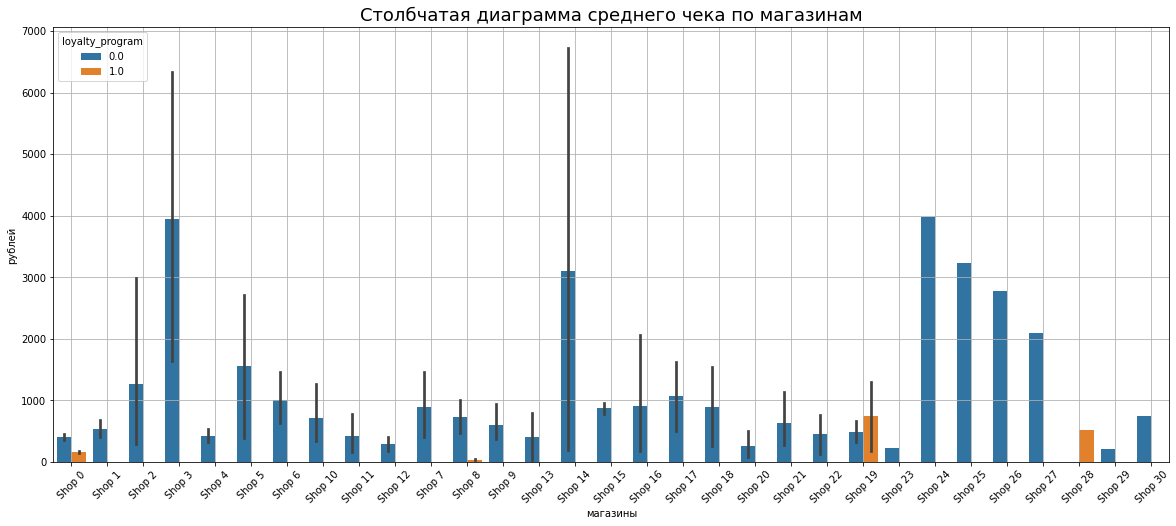

In [51]:
plt.figure(figsize=(20, 8)) 
sns.barplot(x=data_median_purchace['shop_id'], y=data_median_purchace['meane_sum_purchases'], 
            hue=data_median_purchace['loyalty_program'], data=data_median_purchace) 
plt.title('Столбчатая диаграмма среднего чека по магазинам', fontsize=18)
plt.xlabel('магазины')
plt.ylabel('рублей')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
plt.show()

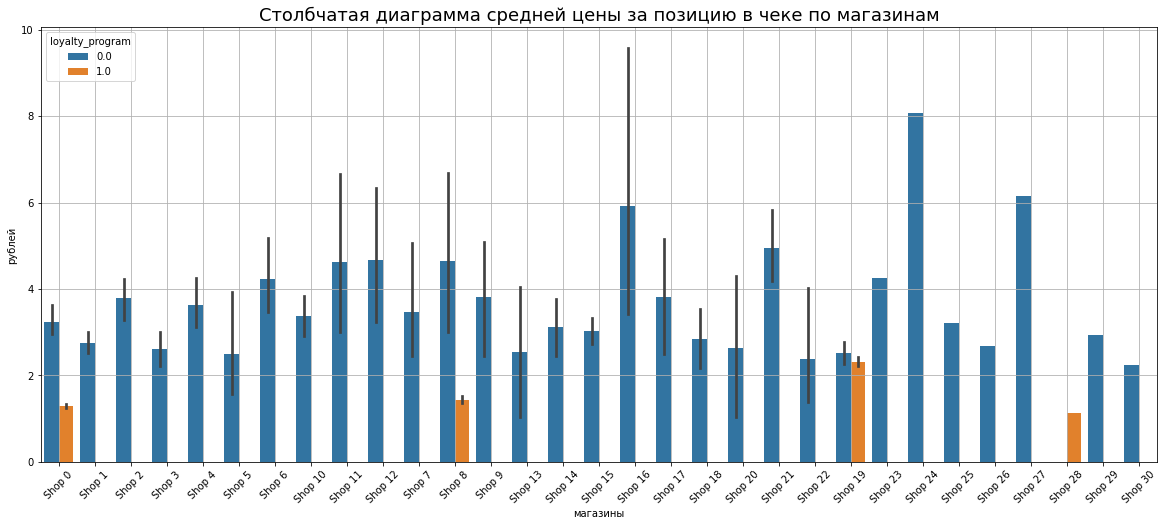

In [52]:
plt.figure(figsize=(20, 8)) 
sns.barplot(x=data_median_purchace['shop_id'], y=data_median_purchace['meane_price_position'], 
            hue=data_median_purchace['loyalty_program'], data=data_median_purchace) 
plt.title('Столбчатая диаграмма средней цены за позицию в чеке по магазинам', fontsize=18)
plt.xlabel('магазины')
plt.ylabel('рублей')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
plt.show()

#### Вывод по разделу Исследовательский Анализ   
В флагманском магазине Shop 0 по программе лояльноти приобретается более широкий ассортимент чем во всей сети. Поскольку на этот магазин приходится 92% чеков, то следовательно введя программу лояльности повсеместно можно расширить номенклатуру часто продаваемого товара.

На сегодняшний день программа лояльности действует в 4-х магазинах из 31. Один из магазинов(Shop 19) в программе лояльности месяц не работал. 

Даты первых чеков в магазинах отстоят от даты начала исследования дальше с возрастанием номера магазина. Логично предположить что магазины открывались последовательно один за другим.
Примечательно что в магазине 19 последний чек был пробит за месяц до конца исследования как с программой лояльности так и без нее. Значит магазин месяц не работал. По странному стечению обстоятельств внем было больше всего продано товаров по программе лояльности - возможно после того как закончились товары по программе лояльности клиенты перестали там покупать или владельцы магазина были недовольны результатами программы.   
Из-за отрицательных количеств товара мы теряем почти 78000 единиц товара, а это 22,5% от общего количества товара. Поэтому мы взяли количество товаров по модулю и отсекли выбросы на уровне 100 шт, отбросив таком образом 1% данных.   
  
Распределение количества товаров в чеке между магазинами показывает что магазин 19 имеет самое высокое медианное число купленных товаров. И в этом магазине практически нет выбросов.  
Как мы уже раньше исследовали - в этом магазине чеков по программе лояльноти почти в 2 раза больше чем без нее.  
Скорее всего маркетологам надо присмотреться к Shop 19 - возможно в нем созданы условия для покупок большого количества товаров и это дает результат, также вполне возможно что программа лояльности в нем дала неожиданный результат, ведь количество товара, купленного по акции может свидетельствовать и о потерях магазина.  
В магазине Shop 0 - в котором пробивается более 90% чеков медианнное число купленных товаров низкое и много выбросов. Скорее всего этот магазин имеет очень большой ассортимент товаров и находится в проходном месте, что способствует притоку посетителей, однако их нельзя назвать оптовыми - скорее всего в него заходят за всякой мелочевкой.
Кандидатами на запрет внедрения программы лояльности могли бы стать магазины Shop 3, Shop 14, Shop 2, Shop 2, Shop 22. У них  высокие медианные значения количества товара(учитываем опыт магазина 19).  
Аутсайдерами оптовых продаж являются магазины 11, 5, 27, 20, 25, 21, 9, 29, 27, 15, 30 - в них низкое количество проданного товара и нет выбросов. Именно эти магазины и рекомендуется подключать к программе лояльности для стимулирования продаж.   

В магазине Shop 8 программа лояльности не приносит ожидаемого результата медианное количество товара без программы лояльности выше чем с ней. Похоже покупатели в этом магазине получают скидки и подарки и не считают нужным купить больше.  
Столбец "customer_id" имеет много пропусков, это более трети данных в таблице. Решено не удалять, но стоит отсекать строки с пустыми значениями в этом столбце когда будем рассчитывать значения на уникального пользователя.   

В графиках количества чеков, товара и покупателей на день наблюдений наблюдается сезонность. Есть явные "зубья" - недели наблюдений - в понедельник минимум - в воскресенье максимум. Виден разрыв на новогодние праздники с 23 декабря по 4 января.
На графике количества чеков на человека в день есть явные пики 21 января и 28 февраля - это скорее всего связано с днями выдачи заработной платы.  
На графике количества товара на покупателя есть 2 явных пика вниз - 9 декабря и 11 февраля - это скорее всего связано с отсутствием денег перед авансом. В январе это не наблюдается потому что - каникулы и люди тратят подарки на новый год. визуально средняя линия количества товара в день в декабре, январе и феврале не меняется.  
Последний график 'Суммарное чеков * количество товара на покупателей в день наблюдений' показывает общую тенденцию для розничной торговли в это время года - всплеск продаж перед новым годом, "голодный" январь и небольшой рост в феврале.   

Судя по среднему чеку оптовыми магазинами являются 24,25,26 и 27, возможно еще 3-ий.
Судя по средней цене позиции в чеке - когда разница в чеке по программе лояльности и без большая - 8-ой магазин - то клиент покупает очень мало по программе лояльности. Если цена позиции в чеке одинакова - магазин 19, то клиент покупает слишком много и это магазину не выгодно. В магазине 0 цена товара в чеке по программе лояльности ниже в 2 с небольшим раза - это похоже оптимальный вариант.


<a id='step_3'></a><h3>3  Анализ программы лояльности </h3>

[К плану работ](#step_0)   

Тут удалять строки с пустыми идентификаторам покупателей не нужно

<a id='step_3.1'></a><h3>3.1  Распределение количества чеков, количества товара по дням наблюдений, графики </h3>

[К плану работ](#step_0) 

In [53]:
# посмотрим распределение количества чеков, количества товара по дням наблюдений
#и в зависимости от участия в программе лояльности
data_purchase_date_loyalty = data.groupby(
    ['purchase_day', 'loyalty_program']).agg({'purchase_id':'nunique', 'quantity':'sum', 'customer_id':'nunique'}
    ).reset_index()
data_purchase_date_loyalty.columns = ['purchase_day', 'loyalty_program', 'purchase_nunique_l', 
                                      'quantity_sum_l', 'customer_nunique_l']
data_purchase_date_loyalty = data_purchase_date_loyalty[data_purchase_date_loyalty['loyalty_program'] == 1.0]
data_purchase_date_loyalty = data_purchase_date_loyalty[['purchase_day', 'purchase_nunique_l', 
                                                         'quantity_sum_l', 'customer_nunique_l']]
data_purchase_date_loyalty.head()
data_purchase_date_non_loyalty = data.groupby(
    ['purchase_day', 'loyalty_program']).agg({'purchase_id':'nunique', 'quantity':'sum', 'customer_id':'nunique'}
    ).reset_index()
# _n - без программы лояльности, _l - с программой лояльности
data_purchase_date_non_loyalty.columns = ['purchase_day', 'loyalty_program', 'purchase_nunique_n', 'quantity_sum_n',
                                          'customer_nunique_n']
data_purchase_date_non_loyalty = data_purchase_date_non_loyalty[data_purchase_date_non_loyalty['loyalty_program'] == 0.0]
data_purchase_date_non_loyalty = data_purchase_date_non_loyalty[['purchase_day', 'purchase_nunique_n', 'quantity_sum_n', 
                                                                 'customer_nunique_n']]
data_purchase_date_non_loyalty.head()
data_purchase_date_merge = data_purchase_date_loyalty.merge(data_purchase_date_non_loyalty, on='purchase_day')
# создаем сводную таблицу количества чеков и проданного товара в зависимости 
#от дня наблюдений и принадлежности к программе лояльности
data_purchase_date_merge.head()

purchase_day  purchase_nunique_l  quantity_sum_l  customer_nunique_l  \
0   2016-12-01                  49            4306                  36   
1   2016-12-02                  63            5072                  34   
2   2016-12-03                  24            2200                  19   
3   2016-12-05                  26            3192                  25   
4   2016-12-06                  43            4399                  38   

   purchase_nunique_n  quantity_sum_n  customer_nunique_n  
0                  89           13128                  61  
1                  97           12134                  79  
2                  77            8670                  35  
3                  69            8359                  51  
4                  88           10361                  51

In [54]:
# добавляем столбцы с информацией о лояльных клиентах
# добавляем столбец количество чеков на покупателя в день
data_purchase_date_merge['purchase_per_cust_l'] = data_purchase_date_merge['purchase_nunique_l']/data_purchase_date_merge['customer_nunique_l']
# добавляем столбец количество товара на покупателя в день
data_purchase_date_merge['quantity_per_cust_l'] = data_purchase_date_merge['quantity_sum_l']/data_purchase_date_merge['customer_nunique_l']
# добавляем столбец количество количество товара в чеке  на покупателя в день
data_purchase_date_merge['purchase_quantity_per_cust_l'] = (data_purchase_date_merge['quantity_sum_l']/data_purchase_date_merge['purchase_nunique_l']
                                                   )/data_purchase_date_merge['customer_nunique_l']
data_purchase_date_merge

purchase_day  purchase_nunique_l  quantity_sum_l  customer_nunique_l  \
0    2016-12-01                  49            4306                  36   
1    2016-12-02                  63            5072                  34   
2    2016-12-03                  24            2200                  19   
3    2016-12-05                  26            3192                  25   
4    2016-12-06                  43            4399                  38   
..          ...                 ...             ...                 ...   
63   2017-02-23                  20            3907                  18   
64   2017-02-24                  24            3559                  21   
65   2017-02-25                   8            1456                   8   
66   2017-02-27                   8            1075                   7   
67   2017-02-28                  16            1630                  15   

    purchase_nunique_n  quantity_sum_n  customer_nunique_n  \
0                   89           13128                  61   
1                   97           12134                  79   
2                   77            8670                  35   
3                   69            8359                  51   
4                   88           10361                  51   
..                 ...             ...                 ...   
63                  43            5359                  32   
64                  42            5821                  36   
65                  41            6931                  34   
66                  27            2807                  24   
67                  44            6032                  33   

    purchase_per_cust_l  quantity_per_cust_l  purchase_quantity_per_cust_l  
0              1.361111           119.611111                      2.441043  
1              1.852941           149.176471                      2.367880  
2              1.263158           115.789474                      4.824561  
3              1.040000           127.680000                      4.910769  
4              1.131579           115.763158                      2.692166  
..                  ...                  ...                           ...  
63             1.111111           217.055556                     10.852778  
64             1.142857           169.476190                      7.061508  
65             1.000000           182.000000                     22.750000  
66             1.142857           153.571429                     19.196429  
67             1.066667           108.666667                      6.791667  

[68 rows x 10 columns]

In [55]:
# добавляем столбцы с информацией об обычных клиентах
# добавляем столбец количество чеков на покупателя в день
data_purchase_date_merge['purchase_per_cust_n'] = data_purchase_date_merge['purchase_nunique_n']/data_purchase_date_merge['customer_nunique_n']
# добавляем столбец количество товара на покупателя в день
data_purchase_date_merge['quantity_per_cust_n'] = data_purchase_date_merge['quantity_sum_n']/data_purchase_date_merge['customer_nunique_n']
# добавляем столбец количество количество товара в чеке  на покупателя в день
data_purchase_date_merge['purchase_quantity_per_cust_n'] = (data_purchase_date_merge['quantity_sum_n']/data_purchase_date_merge['purchase_nunique_n']
                                                   )/data_purchase_date_merge['customer_nunique_n']
data_purchase_date_merge

purchase_day  purchase_nunique_l  quantity_sum_l  customer_nunique_l  \
0    2016-12-01                  49            4306                  36   
1    2016-12-02                  63            5072                  34   
2    2016-12-03                  24            2200                  19   
3    2016-12-05                  26            3192                  25   
4    2016-12-06                  43            4399                  38   
..          ...                 ...             ...                 ...   
63   2017-02-23                  20            3907                  18   
64   2017-02-24                  24            3559                  21   
65   2017-02-25                   8            1456                   8   
66   2017-02-27                   8            1075                   7   
67   2017-02-28                  16            1630                  15   

    purchase_nunique_n  quantity_sum_n  customer_nunique_n  \
0                   89           13128                  61   
1                   97           12134                  79   
2                   77            8670                  35   
3                   69            8359                  51   
4                   88           10361                  51   
..                 ...             ...                 ...   
63                  43            5359                  32   
64                  42            5821                  36   
65                  41            6931                  34   
66                  27            2807                  24   
67                  44            6032                  33   

    purchase_per_cust_l  quantity_per_cust_l  purchase_quantity_per_cust_l  \
0              1.361111           119.611111                      2.441043   
1              1.852941           149.176471                      2.367880   
2              1.263158           115.789474                      4.824561   
3              1.040000           127.680000                      4.910769   
4              1.131579           115.763158                      2.692166   
..                  ...                  ...                           ...   
63             1.111111           217.055556                     10.852778   
64             1.142857           169.476190                      7.061508   
65             1.000000           182.000000                     22.750000   
66             1.142857           153.571429                     19.196429   
67             1.066667           108.666667                      6.791667   

    purchase_per_cust_n  quantity_per_cust_n  purchase_quantity_per_cust_n  
0              1.459016           215.213115                      2.418125  
1              1.227848           153.594937                      1.583453  
2              2.200000           247.714286                      3.217069  
3              1.352941           163.901961                      2.375391  
4              1.725490           203.156863                      2.308601  
..                  ...                  ...                           ...  
63             1.343750           167.468750                      3.894622  
64             1.166667           161.694444                      3.849868  
65             1.205882           203.852941                      4.972023  
66             1.125000           116.958333                      4.331790  
67             1.333333           182.787879                      4.154270  

[68 rows x 13 columns]

In [56]:
# строим графики Количество чеков и товара по датам в зависимости от даты наблюдений
fig = px.line(data_purchase_date_merge, x='purchase_day', y=['purchase_nunique_l', 'purchase_nunique_n'], \
              title='Количество чеков по датам в зависимости от даты наблюдений')
fig.update_xaxes(title_text='день наблюдений')
fig.update_yaxes(title_text='количество чеков в день')
fig.update_xaxes(tickangle=45)

fig.show() 
print('медианное количество чеков лояльных клиентов в день', round(data_purchase_date_merge['purchase_nunique_l'].median(), 2))
print('медианное количество чеков обычных клиентов в день', round(data_purchase_date_merge['purchase_nunique_n'].median(), 2))

fig = px.line(data_purchase_date_merge, x='purchase_day', y=['quantity_sum_l', 'quantity_sum_n'], \
              title='Суммарное количество товара, проданное в день наблюдений')
fig.update_xaxes(title_text='день наблюдений')
fig.update_yaxes(title_text='количество товара')
fig.update_xaxes(tickangle=45)
fig.show() 
print('медианное количество товара лояльных клиентов в день', round(data_purchase_date_merge['quantity_sum_l'].median(), 2))
print('медианное количество товара обычных клиентов в день', round(data_purchase_date_merge['quantity_sum_n'].median(), 2))

медианное количество чеков лояльных клиентов в день 16.0
медианное количество чеков обычных клиентов в день 45.0


медианное количество товара лояльных клиентов в день 1901.0
медианное количество товара обычных клиентов в день 6232.0


<a id='step_3.2'></a><h3>3.2  Распределение количества покупателей и количества покупок на человека по дням наблюдений в зависимости от наличия программы лояльности </h3>

[К плану работ](#step_0) 

In [57]:
# строим графики Количество покупателей и покупок на человека по датам в зависимости от наличия программы лояльности
fig = px.line(data_purchase_date_merge, x='purchase_day', y=['customer_nunique_l', 'customer_nunique_n'], \
              title='Количество покупателей по датам в зависимости наличия программы лояльности на одном графике')
fig.update_xaxes(title_text='день наблюдений')
fig.update_yaxes(title_text='количество покупателей в день')
fig.update_xaxes(tickangle=45)
fig.show() 
print('медианное количество лояльных клиентов в день', data_purchase_date_merge['customer_nunique_l'].median())
print('медианное количество обычных клиентов в день', data_purchase_date_merge['customer_nunique_n'].median())

fig = px.line(data_purchase_date_merge, x='purchase_day', y=['purchase_per_cust_l', 'purchase_per_cust_n'], \
              title='Количество покупок на человека в день наблюдений в зависимости от наличия программы лояльности')
fig.update_xaxes(title_text='день наблюдений')
fig.update_yaxes(title_text='количество покупок на человека')
fig.update_xaxes(tickangle=45)
fig.show() 
print('медианное количество покупок лояльных клиентов в день', round(data_purchase_date_merge['purchase_per_cust_l'].median(), 2))
print('медианное количество покупок обычных клиентов в день', round(data_purchase_date_merge['purchase_per_cust_n'].median(), 2))

медианное количество лояльных клиентов в день 14.0
медианное количество обычных клиентов в день 34.0


медианное количество покупок лояльных клиентов в день 1.09
медианное количество покупок обычных клиентов в день 1.38


#### Вывод:
У обычных клиентов количество чеков и товара по дням наблюдений больше. Коичество покупателей и покупок на человека тоже выше у клиентов без программы лояльности.

<a id='step_3.3'></a><h3>3.3  Распределение количества товара на покупателя и размера корзины на человека по дням наблюдений в зависимости от наличия программы лояльности </h3>

[К плану работ](#step_0) 

In [58]:
# строим графики Количество товара на покупателя и товара в корзине на человека по датам 
# в зависимости от наличия программы лояльности
fig = px.line(data_purchase_date_merge, x='purchase_day', y=['quantity_per_cust_l', 'quantity_per_cust_n'], \
              title='Количество товара на покупателя по датам в зависимости наличия программы лояльности')
fig.update_xaxes(title_text='день наблюдений')
fig.update_yaxes(title_text='количество товара на покупателя в день')
fig.update_xaxes(tickangle=45)

fig.show() 
print('медианное количество товара на покупателя у лояльных клиентов в день', 
      round(data_purchase_date_merge['quantity_per_cust_l'].median(), 2))
print('медианное количество товара на покупателя у обычных клиентов в день', 
      round(data_purchase_date_merge['quantity_per_cust_n'].median(), 2))
fig = px.line(data_purchase_date_merge, x='purchase_day', y=['purchase_quantity_per_cust_l', 'purchase_quantity_per_cust_n'], \
              title='Размер корзины в среднем на чел. в зависимости от наличия программы лояльности по дням ')
fig.update_xaxes(title_text='день наблюдений')
fig.update_yaxes(title_text='среднее количество покупок на человека')
fig.update_xaxes(tickangle=45)
fig.show() 
print('медианный размер корзины лояльных клиентов в день', 
      round(data_purchase_date_merge['purchase_quantity_per_cust_l'].median(), 2))
print('медианный размер корзины обычных клиентов в день', 
      round(data_purchase_date_merge['purchase_quantity_per_cust_n'].median(), 2))

медианное количество товара на покупателя у лояльных клиентов в день 124.24
медианное количество товара на покупателя у обычных клиентов в день 185.78


медианный размер корзины лояльных клиентов в день 7.78
медианный размер корзины обычных клиентов в день 4.34


##### Вывод   
Красная линия количество чеков без программы лояльности имеет более выраженный пилообразный характер в зависимости от дня недели, голубая линия количества чеков имеет более сглаженный характер. Скорее всего это связано с тем, что клиенты участвующие в программе лояльности это профессионалы строительства и поход в строительный магазин у них не зависит от дня недели. Клиенты без программы лояльности - это обычные люди - в рабочие дни они на работе и в строительные магазины не ходят.  
Количество проданного товара без программы лояльности в декабре и начале января - скорее всего связаны с новогодними подарками - до нового года покупаются подарки родственникам и друзьям, после нового года - тратятся подаренные деньги.  
Интересны всплески 1 февраля и 22 февраля на голубой линии количества товара, проданного по программе лояльности. Это свидетельствует о покупках к мужчинам подарков в строительном магазине к 23 февраля, скорее всего лояльные клиенты действительно работают в строительстве и подарки дарят из строительного магазина (например инструмент).

<a id='step_3.4'></a><h3>3.4  Распределение количества проданного товара по магазинам в зависимости от наличия программы лояльности. Столбчатая диаграмма </h3>

[К плану работ](#step_0) 

In [59]:
#удаляем пропуски потому что мы будем считать на количество уникальных пользователей
data_per_shop = data.dropna()
# группируем таблицу по магазинам и программе лояльности
data_per_shop = data_per_shop.groupby(
    ['shop_id', 'loyalty_program'], as_index=False).agg({'customer_id':'nunique', 'purchase_id':'nunique', 'positive_quant':'sum'}
                                                       ).sort_values(by='shop_id', ascending=False)
# добавляем столбец количество чеков на покупателя
data_per_shop['purchase_customer'] = data_per_shop['purchase_id']/data_per_shop['customer_id']
# добавляем столбец количество товаров на покупателя
data_per_shop['quantity_customer'] = data_per_shop['positive_quant']/data_per_shop['customer_id']
# добавляем столбец отношение товаров на покупателя к чекам на покупателя
data_per_shop['quantity_purchase_customer'] = data_per_shop['quantity_customer']/data_per_shop['purchase_customer']
data_per_shop.reset_index().head()

index shop_id  loyalty_program  customer_id  purchase_id  positive_quant  \
0     31  Shop 9              0.0            2            4             664   
1     30  Shop 8              1.0            1            2              52   
2     29  Shop 8              0.0           11           17            3992   
3     28  Shop 7              0.0            7           11            4389   
4     27  Shop 6              0.0            3           38            9942   

   purchase_customer  quantity_customer  quantity_purchase_customer  
0           2.000000         332.000000                  166.000000  
1           2.000000          52.000000                   26.000000  
2           1.545455         362.909091                  234.823529  
3           1.571429         627.000000                  399.000000  
4          12.666667        3314.000000                  261.631579

In [60]:
data_shop_loya = data.groupby(['shop_id', 'loyalty_program']). agg({'positive_quant':'sum'}).reset_index()
display(data_shop_loya.sort_values(by='positive_quant'))
data_shop_loya.columns = ['shop_id', 'loyalty_program', 'positive_quant']

shop_id  loyalty_program  positive_quant
32   Shop 8              1.0              52
24  Shop 29              0.0              71
18  Shop 23              0.0             108
26  Shop 30              0.0             331
22  Shop 27              0.0             341
15  Shop 20              0.0             413
16  Shop 21              0.0             414
23  Shop 28              1.0             466
19  Shop 24              0.0             494
10  Shop 17              0.0             519
12  Shop 19              0.0             520
8   Shop 15              0.0             574
6   Shop 13              0.0             617
13  Shop 19              1.0             618
33   Shop 9              0.0             664
17  Shop 22              0.0             786
9   Shop 16              0.0             817
20  Shop 25              0.0            1008
21  Shop 26              0.0            1035
4   Shop 11              0.0            1402
11  Shop 18              0.0            2712
5   Shop 12              0.0            2901
3   Shop 10              0.0            3170
28   Shop 5              0.0            3698
31   Shop 8              0.0            3992
30   Shop 7              0.0            4389
7   Shop 14              0.0            5147
14   Shop 2              0.0            5753
29   Shop 6              0.0           11369
2    Shop 1              0.0           16497
27   Shop 4              0.0           18187
25   Shop 3              0.0           19416
1    Shop 0              1.0          156977
0    Shop 0              0.0          381486

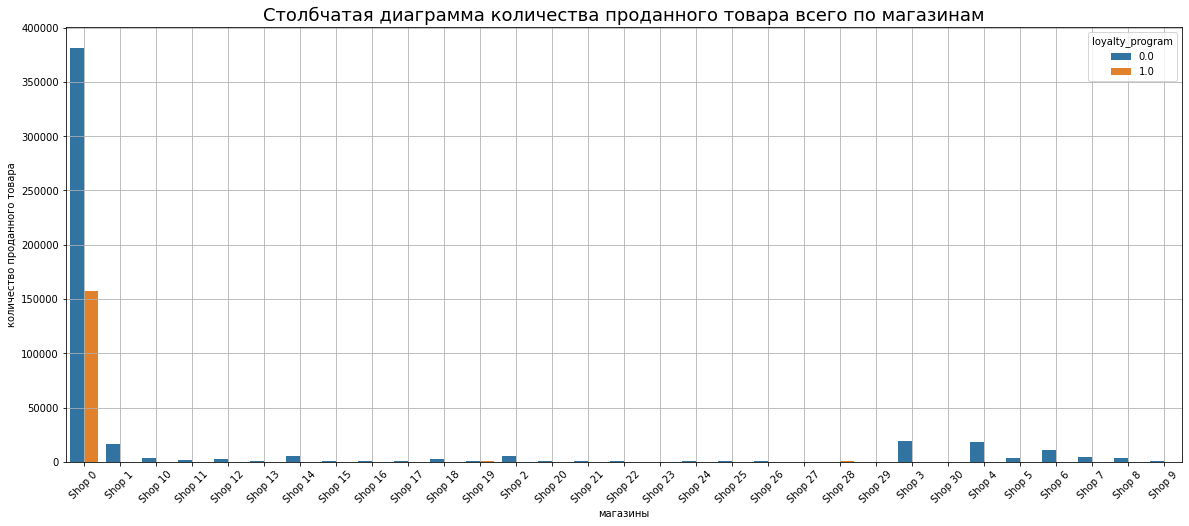

In [61]:
plt.figure(figsize=(20, 8)) 
sns.barplot(x=data_shop_loya['shop_id'], y=data_shop_loya['positive_quant'], hue=data_shop_loya['loyalty_program'], data=data_shop_loya) 
plt.title('Столбчатая диаграмма количества проданного товара всего по магазинам', fontsize=18)
plt.xlabel('магазины')
plt.ylabel('количество проданного товара')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# добавляем сетку
plt.grid()
plt.show()

##### Вывод
Максимальное количество товара продается в Shop 0 - количество товара проданного в других магазинах на уровне статистической пограешности кроме магазинов 1, 3, 4 и 6.  
Причем по программе лояльности продано в 2,3 раза меньше.

<a id='step_3.5'></a><h3>3.5  График зависимости количества проданного товара на покупателя по магазинам </h3>

[К плану работ](#step_0)

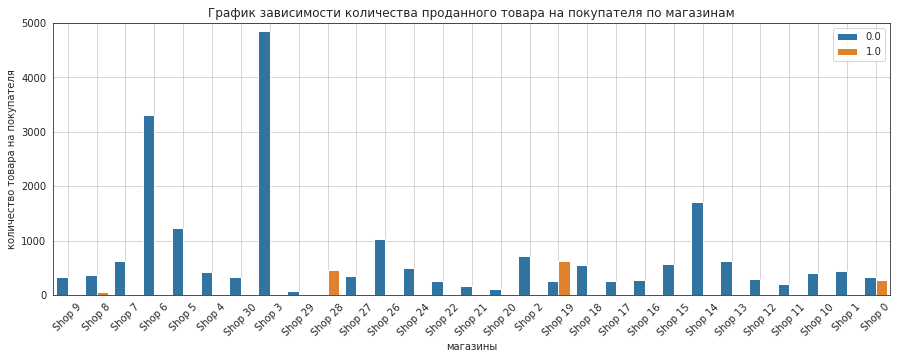

In [62]:
#Построим  График зависимости количества проданного товара на покупателя по магазинам
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(15, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='shop_id', y='quantity_customer', data=data_per_shop, hue='loyalty_program')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества проданного товара на покупателя по магазинам')
plt.xlabel('магазины')
plt.ylabel('количество товара на покупателя')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='upper right', fontsize=10)
plt.ylim(0, 5000)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

##### Вывод
В пятерку лидеров по количеству проданного товара на покупателя входят: Shop 3, Shop 6, Shop 14, Shop 5 и Shop 26.   
Тройка аутсайдеров по количеству товара Shop 20, Shop 21, Shop 29.   
В программе лояльности места по количеству проданного товара на покупателя распределены Shop 19, Shop 28, Shop 0 и Shop 8. В Первых двух по программе лояльности продано товара больше чем без программы лояльности.   
Тут надо учитывать что  мы удалили пропуски в данных о покупателях, поэтому товара без программы лояльности реально больше.

<a id='step_3.6'></a><h3>3.6 График зависимости количества чеков на покупателя по магазинам </h3>

[К плану работ](#step_0)

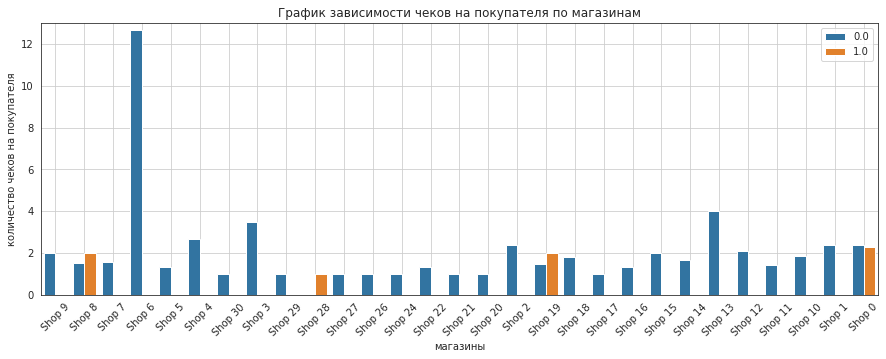

In [63]:
# Построим график зависимости чеков на покупателя по магазинам
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(15, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='shop_id', y='purchase_customer', data=data_per_shop, hue='loyalty_program')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости чеков на покупателя по магазинам')
plt.xlabel('магазины')
plt.ylabel('количество чеков на покупателя')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='upper right', fontsize=10)
plt.ylim(0, 13)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()


##### Вывод   
Явным лидером по количеству чеков на человека является Shop 6 (в 6 раз больше чем всреднем по магазинам), далее следуют Shop 13 и Shop 3. В Shop 8 и Shop 19 чеков по программе лояльности больше чем без нее. В Shop 28 их одинаковое количество, а в Shop 0 меньше. Однако если учесnь удаление пропусков, то вполне вероятно что покупатели были "с улицы" и в таблицу попали как NaN

<a id='step_3.7'></a><h3>3.7 График зависимости количества товаров в чеке на покупателя по магазинам </h3>

[К плану работ](#step_0)

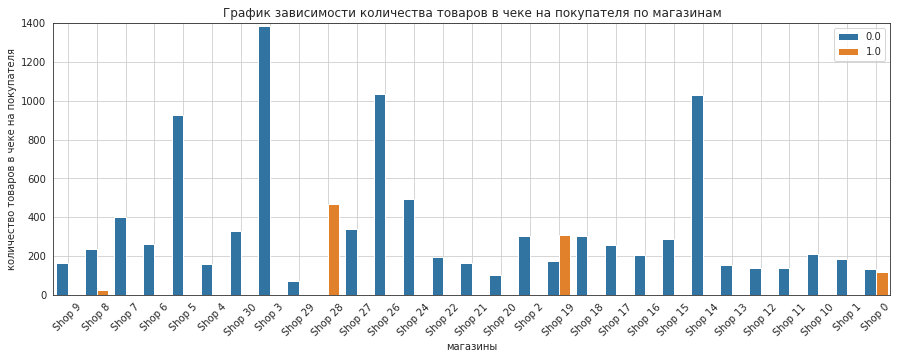

In [64]:
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(15, 5))
# строим столбчатый график средствами seaborn
sns.barplot(x='shop_id', y='quantity_purchase_customer', data=data_per_shop, hue='loyalty_program')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества товаров в чеке на покупателя по магазинам')
plt.xlabel('магазины')
plt.ylabel('количество товаров в чеке на покупателя')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='upper right', fontsize=10)
plt.ylim(0, 1400)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

##### Вывод   
В четверку лидеров по количеству проданного товара в чеке входят: Shop 3, Shop 26, Shop 14 и Shop 5.   
Тройка аутсайдеров по количеству товара в чеке Shop 29, Shop 20, Shop 21.   
В программе лояльности места по количеству проданного товара в чеке распределены Shop 28, Shop 19, Shop 0 и Shop 8. В Первых трех по программе лояльности продано товара больше чем без программы лояльности.   

<a id='step_3.8'></a><h3>3.8 Формирование сводной исходной таблицы расчеты CAC без маркетинга </h3>

[К плану работ](#step_0)

In [65]:
price_1 = price_for_loyality[['product_id', 'price']]
price_2 = price_for_loyality[['product_id', 'loyality_price']]
data_price = data.merge(price_1, right_on='product_id', left_on='item_id', how='left')
data_price = data_price.merge(price_2, right_on='product_id', left_on='item_id', how='left')

data_price_z = data_price[['customer_id', 'loyalty_program','positive_quant','price','loyality_price']]
data_price_z = data_price_z.query('loyalty_program == 1.0')
data_price_z.head()
cohort_loyalty = data_price_z['customer_id'].nunique()
display('размер когорты в программе лояльности', cohort_loyalty)
data_price_z['position_sum_lost'] = data_price_z['positive_quant']*data_price_z['price']
data_price_z['position_sum'] = data_price_z['positive_quant']*data_price_z['loyality_price']

lost_invest_loyalty = data_price_z['position_sum_lost'].sum()-data_price_z['position_sum'].sum()

data_price_y = data_price[['loyalty_program', 'positive_quant', 'price']]

data_price_y.loc[0:len(data_price_y['positive_quant']),3] = 1
loyalty_o = data_price_y['price'].sum()
loyalty_o
CAC = (lost_invest_loyalty+loyalty_o)/cohort_loyalty
print('CAC - затраты на введение программы лояльности на человека', '(они же потери в цене и товары бесплатно без учета прибыли от продажи карт и всех маркетинговых затрат), руб', round(CAC,2))


'размер когорты в программе лояльности'

577

CAC - затраты на введение программы лояльности на человека (они же потери в цене и товары бесплатно без учета прибыли от продажи карт и всех маркетинговых затрат), руб 1401.98


##### Вывод     
Для когортного анализа мы сформировали итоговую таблицу с суммами чеков, которая равна произведению положительного количества товара, умноженная на цену в зависимости от наличия программы лояльности. Суммы стоимости товаров в чеке объединены по идентификатору чека purchase_id.  
Для расчета стоимости привлечения клиентов мы рассчитываем CAC. Расчет производится следующим образом: все чеки по программе лояльности пересчитываются по цене без программы лояльности, разница сумм этих чеков - это потери от введения программы лояльности. Кроме того в затраты по программе лояльности добавляется сумма всех чеков товаров с количеством равным 0 и идентификатором участия в программе лояльности (логика в том что этот товар добавлен в чек в размере 1 штука). Сумму затрат мы делим на количество уникальных покупателей по программе лояльности.
Итого САС без учета прибыли от продажи карт лояльности(каждая 200р) и затрат на маркетинг связанный с этой акцией 499,48 рублей на человека.  
Каждый участник акции минимум 1 раз купил карту лояльности за 200 р и на маркетинг акции были затраты: зп маркетолога и выпуск пластиковых карт (как минимум), эти данные мы учтем ниже.


In [66]:
#Формируем сводную таблицу трансакций с ценами
# формируем в прайсе столбец с ценами в зависимости от программы лояльности
data_price['loyality_price1'] = data_price['loyality_price'] 

data_price.loc[data_price['loyalty_program'] == 0.0, 'loyality_price1'] = data_price['price']
data_price = data_price[['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id', 'shop_id', 'loyalty_program', 'purchase_day', 'positive_quant', 'loyality_price1']]
# создаем столбец стоимости товара в чеке (количество * цену)
data_price['position_sum'] = data_price['positive_quant']*data_price['loyality_price1']
data_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103384 entries, 0 to 103383
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      103384 non-null  object        
 1   item_id          103384 non-null  object        
 2   quantity         103384 non-null  int64         
 3   purchase_date    103384 non-null  datetime64[ns]
 4   customer_id      67320 non-null   float64       
 5   shop_id          103384 non-null  object        
 6   loyalty_program  103384 non-null  float64       
 7   purchase_day     103384 non-null  datetime64[ns]
 8   positive_quant   103384 non-null  int64         
 9   loyality_price1  103384 non-null  float64       
 10  position_sum     103384 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 13.5+ MB


### Вывод   по Анализу программы лояльности  
График количества чеков без программы лояльности вцелом выше чем с ней, амплитуда шире. Лояльные клиенты покупают меньше. Однако ярко выраженный пилообразный характер в зависимости от дня недели у лояльных клиентов отсутствует, можно сделать вывод что это клиенты-профессиналы и они посещают нашу сеть как в выходные, так и в будние дни, естественно их много меньше чем обычных клиентов.
Вал продажи товара по дням в январе и декабре связаны с сезоном распродаж и каникулами. В феврале у клиентов программы лояльности есть всплески 1 и 22 февраля - скорее всего это подарки себе или друзьям мужчина - а что профессионал может подарить коллегам или друзьям - то что в доме пригодится настоящему мужчине и это как раз ассортимент нашей сети.  
Сеть на данный момент имеет расширение магазинов, но продажи хорошо идут лишь в одном магазине Shop 0. В нем товаров по программе лояльности продается в 2,5 раза меньше чем без нее.  
В пятерку лидеров по количеству проданного товара на покупателя входят: Shop 3, Shop 6, Shop 14, Shop 5 и Shop 26.   
Тройка аутсайдеров по количеству товара Shop 20, Shop 21, Shop 29.   
В программе лояльности места по количеству проданного товара на покупателя распределены между Shop 19, Shop 28, Shop 0 и Shop 8. В Первых двух по программе лояльности продано товара больше чем без программы лояльности.   

Явным лидером по количеству чеков на человека является Shop 6 (в 6 раз больше чем в среднем по магазинам), далее следуют Shop 13 и Shop 3. В Shop 8 и Shop 19 чеков по программе лояльности больше чем без нее. В Shop 28 их одинаковое количество, а в Shop 0 меньше.  
В четверкуерку лидеров по количеству проданного товара в чеке входят: Shop 3, Shop 26, Shop 14 и Shop 5.   
Тройка аутсайдеров по количеству товара в чеке Shop 29, Shop 20, Shop 21.   
В программе лояльности места по количеству проданного товара в чеке распределены Shop 28, Shop 19, Shop 0 и Shop 8. В Первых двух по программе лояльности продано товара больше чем без программы лояльности.   
По результатам анализа предположили что в магазинах нашей сети продаются товары по программе лояльности по минимальной цене, а без по медианной. Из таблицы цен мы сыормировали прайс лояльности и обычный и добавили эти цены в зависимости от маркета лояльности на чеке. Далее мы сгруппировали данные по идентификатору чека и посчитали сумму покупок в каждом чеке. Эти данные были использованы в дальнейшем когортном анализе.
Кроме того мы посчитали дельту между товарами программы лояльности проданными по медианному и лояльному прайсу и сочли это затратами на рекламу программы лояльности (Низкие цены - это тоже реклама). К этой сумме прибавили все товары отданные бесплатно по программе лояльности и получилось что сеть магазинов потеряла на программе лояльности по 499 рублей на каждого привлеченного покупателя. Это не чистые за траты CAC на привлечение покупателей, данные зп маркетологов и изготовления карт мы добавим в когортном анализе. Так как карты программы лояльности платные, то частично затраты на привлечение покупателя уменьшаются на возврат от продажи карт. И это тоже будет учтено в дальнейшем.
Итогом анализа программы лояльности стала таблица с чеками.

<a id='step_4'></a><h3>4. Когортный анализ </h3>      


<a id='step_4.1'></a><h3>4.1 формирование исходной таблицы </h3>   

[К плану работ](#step_0)

In [67]:
# Из сводной таблицы трансакций с ценами создаем таблицу для когортного анализа data_for_cohort
data_price = data_price.dropna()
data_price.head(10)
data_for_cohort = data_price.groupby(['purchase_id','customer_id', 'purchase_date', 'loyalty_program', 'shop_id']).agg({'position_sum':'sum'}).reset_index()
data_for_cohort = data_for_cohort.rename(columns = {'purchase_date':'event_dt', 'customer_id':'user_id',  'position_sum':'revenue'})
data_for_cohort = data_for_cohort[['user_id', 'event_dt', 'loyalty_program', 'shop_id', 'revenue']]
print(data_for_cohort.head())
data_for_cohort.info()

   user_id            event_dt  loyalty_program shop_id  revenue
0  23529.0 2016-12-01 08:26:00              1.0  Shop 0   62.800
1  23529.0 2016-12-01 08:28:00              1.0  Shop 0    0.000
2  18726.0 2016-12-01 08:34:00              0.0  Shop 0  285.395
3  18726.0 2016-12-01 08:34:00              0.0  Shop 0   96.090
4  18726.0 2016-12-01 08:35:00              0.0  Shop 0   13.200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          4061 non-null   float64       
 1   event_dt         4061 non-null   datetime64[ns]
 2   loyalty_program  4061 non-null   float64       
 3   shop_id          4061 non-null   object        
 4   revenue          4061 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 158.8+ KB


В таблице осталось 4061 чек (строки) и 5 столбцов. Переименовываем столбцы дя удобства когортного анализа и чтобы воспользоваться стандартными функциями рассчета

<a id='step_4.2'></a><h3> 4.2 Cоздание таблицы профилей</h3>   

[К плану работ](#step_0)


In [68]:
# Функция для создания профилей покупателей
def get_profiles(data_for_cohort):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        data_for_cohort.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first', 'loyalty_program':'first'})
        .rename(columns={'event_dt': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles


In [69]:
# Используем готовую функцию и создаем профили полкупателей
profiles = get_profiles(data_for_cohort)
display(profiles.info())
display(profiles)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          1727 non-null   float64       
 1   first_ts         1727 non-null   datetime64[ns]
 2   loyalty_program  1727 non-null   float64       
 3   dt               1727 non-null   object        
 4   month            1727 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 67.6+ KB


None

user_id            first_ts  loyalty_program          dt      month
0     18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01
1     18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01
2     18029.0 2017-02-02 16:01:00              0.0  2017-02-02 2017-02-01
3     18031.0 2017-02-16 12:33:00              0.0  2017-02-16 2017-02-01
4     18035.0 2017-01-18 09:50:00              0.0  2017-01-18 2017-01-01
...       ...                 ...              ...         ...        ...
1722  23938.0 2016-12-08 13:38:00              1.0  2016-12-08 2016-12-01
1723  23939.0 2016-12-16 18:23:00              1.0  2016-12-16 2016-12-01
1724  23948.0 2016-12-08 13:53:00              1.0  2016-12-08 2016-12-01
1725  23956.0 2017-01-25 12:34:00              1.0  2017-01-25 2017-01-01
1726  23962.0 2017-01-06 14:14:00              1.0  2017-01-06 2017-01-01

[1727 rows x 5 columns]

In [70]:
# проверяем на наличие явных дубликатов
profiles.duplicated().sum()

0

В профилях 1727 пользователя(строк), есть столбец даты первой аокупки, месяца первой покупки и даты и времени первой покупки.

<a id='step_4.3'></a><h3> 4.3 Расчет Retention Rate  таблицы удержания клиентов</h3>   

[К плану работ](#step_0)
 

In [71]:
profiles

user_id            first_ts  loyalty_program          dt      month
0     18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01
1     18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01
2     18029.0 2017-02-02 16:01:00              0.0  2017-02-02 2017-02-01
3     18031.0 2017-02-16 12:33:00              0.0  2017-02-16 2017-02-01
4     18035.0 2017-01-18 09:50:00              0.0  2017-01-18 2017-01-01
...       ...                 ...              ...         ...        ...
1722  23938.0 2016-12-08 13:38:00              1.0  2016-12-08 2016-12-01
1723  23939.0 2016-12-16 18:23:00              1.0  2016-12-16 2016-12-01
1724  23948.0 2016-12-08 13:53:00              1.0  2016-12-08 2016-12-01
1725  23956.0 2017-01-25 12:34:00              1.0  2017-01-25 2017-01-01
1726  23962.0 2017-01-06 14:14:00              1.0  2017-01-06 2017-01-01

[1727 rows x 5 columns]

In [72]:
data_for_cohort

user_id            event_dt  loyalty_program shop_id   revenue
0     23529.0 2016-12-01 08:26:00              1.0  Shop 0    62.800
1     23529.0 2016-12-01 08:28:00              1.0  Shop 0     0.000
2     18726.0 2016-12-01 08:34:00              0.0  Shop 0   285.395
3     18726.0 2016-12-01 08:34:00              0.0  Shop 0    96.090
4     18726.0 2016-12-01 08:35:00              0.0  Shop 0    13.200
...       ...                 ...              ...     ...       ...
4056  23910.0 2017-02-25 12:46:00              1.0  Shop 0    17.480
4057  19835.0 2017-02-25 16:26:00              0.0  Shop 6  3303.990
4058  19363.0 2017-02-27 10:25:00              0.0  Shop 0    11.820
4059  19836.0 2017-02-27 15:07:00              0.0  Shop 0    35.400
4060  23520.0 2017-02-28 15:19:00              1.0  Shop 0     3.260

[4061 rows x 5 columns]

In [73]:
# присоединяем исходную таблицу data_for_cohort к профилям по столбцу user_id получаем таблицу result_raw - таблица трансакций с чеками

result_raw = profiles.merge(
    data_for_cohort[['user_id', 'event_dt' ]], on='user_id', how='left'
)
print('количество дубликатов в таблице result_raw', result_raw.duplicated().sum())
result_raw = result_raw.drop_duplicates().reset_index()
print()
print('result_raw - таблица трансакций с чеками для когортного анализа')
result_raw

количество дубликатов в таблице result_raw 36

result_raw - таблица трансакций с чеками для когортного анализа


index  user_id            first_ts  loyalty_program          dt  \
0         0  18026.0 2016-12-07 14:57:00              0.0  2016-12-07   
1         1  18026.0 2016-12-07 14:57:00              0.0  2016-12-07   
2         2  18027.0 2016-12-16 19:09:00              0.0  2016-12-16   
3         3  18027.0 2016-12-16 19:09:00              0.0  2016-12-16   
4         4  18029.0 2017-02-02 16:01:00              0.0  2017-02-02   
...     ...      ...                 ...              ...         ...   
4020   4056  23948.0 2016-12-08 13:53:00              1.0  2016-12-08   
4021   4057  23956.0 2017-01-25 12:34:00              1.0  2017-01-25   
4022   4058  23962.0 2017-01-06 14:14:00              1.0  2017-01-06   
4023   4059  23962.0 2017-01-06 14:14:00              1.0  2017-01-06   
4024   4060  23962.0 2017-01-06 14:14:00              1.0  2017-01-06   

          month            event_dt  
0    2016-12-01 2016-12-07 14:57:00  
1    2016-12-01 2017-01-26 14:30:00  
2    2016-12-01 2016-12-16 19:09:00  
3    2016-12-01 2017-01-25 10:42:00  
4    2017-02-01 2017-02-02 16:01:00  
...         ...                 ...  
4020 2016-12-01 2016-12-16 15:39:00  
4021 2017-01-01 2017-01-25 12:34:00  
4022 2017-01-01 2017-01-06 14:14:00  
4023 2017-01-01 2017-01-23 14:58:00  
4024 2017-01-01 2017-02-28 10:30:00  

[4025 rows x 7 columns]

Удалив дубликаты получили таблицу с 4025 чеками

In [74]:

# вычисляем лайфтайм для каждой трансакции в днях
result_raw['lifetime'] = (
    result_raw['event_dt'] - result_raw['first_ts']
).dt.days

result_raw.head()

index  user_id            first_ts  loyalty_program          dt      month  \
0      0  18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01   
1      1  18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01   
2      2  18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01   
3      3  18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01   
4      4  18029.0 2017-02-02 16:01:00              0.0  2017-02-02 2017-02-01   

             event_dt  lifetime  
0 2016-12-07 14:57:00         0  
1 2017-01-26 14:30:00        49  
2 2016-12-16 19:09:00         0  
3 2017-01-25 10:42:00        39  
4 2017-02-02 16:01:00         0

In [75]:
# строим таблицу удержания

result_grouped = result_raw.pivot_table(
    index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
)

result_grouped.head()

lifetime       0    1    2    3    4    5    6     7     8    9   ...   80  \
dt                                                                ...        
2016-12-01   97.0  7.0  2.0  4.0  8.0  4.0  9.0  10.0   7.0  3.0  ...  1.0   
2016-12-02  104.0  1.0  NaN  2.0  3.0  5.0  4.0  15.0   NaN  NaN  ...  1.0   
2016-12-03   48.0  NaN  1.0  2.0  1.0  3.0  3.0   NaN   1.0  NaN  ...  NaN   
2016-12-05   68.0  5.0  NaN  2.0  3.0  1.0  5.0   4.0   7.0  2.0  ...  1.0   
2016-12-06   76.0  2.0  4.0  3.0  1.0  1.0  NaN  11.0  10.0  4.0  ...  4.0   

lifetime     81   82   83   84   85   86   87   88   89  
dt                                                       
2016-12-01  NaN  3.0  7.0  3.0  5.0  NaN  1.0  5.0  4.0  
2016-12-02  3.0  3.0  3.0  5.0  NaN  1.0  NaN  NaN  NaN  
2016-12-03  1.0  2.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
2016-12-05  NaN  NaN  1.0  3.0  1.0  NaN  NaN  NaN  NaN  
2016-12-06  1.0  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN  

[5 rows x 90 columns]

In [76]:
# вычисляем размеры когорт

cohort_sizes = (
    result_raw.groupby('dt')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes

cohort_size
dt                     
2016-12-01           97
2016-12-02          104
2016-12-03           48
2016-12-05           68
2016-12-06           76
...                 ...
2017-02-23           19
2017-02-24           23
2017-02-25           18
2017-02-27           12
2017-02-28           24

[68 rows x 1 columns]

In [77]:
# объединяем размеры когорт и таблицу удержания

result_grouped = cohort_sizes.merge(
    result_grouped, on='dt', how='left'
).fillna(0)

result_grouped

cohort_size      0    1    2    3    4    5    6     7     8  ...  \
dt                                                                        ...   
2016-12-01           97   97.0  7.0  2.0  4.0  8.0  4.0  9.0  10.0   7.0  ...   
2016-12-02          104  104.0  1.0  0.0  2.0  3.0  5.0  4.0  15.0   0.0  ...   
2016-12-03           48   48.0  0.0  1.0  2.0  1.0  3.0  3.0   0.0   1.0  ...   
2016-12-05           68   68.0  5.0  0.0  2.0  3.0  1.0  5.0   4.0   7.0  ...   
2016-12-06           76   76.0  2.0  4.0  3.0  1.0  1.0  0.0  11.0  10.0  ...   
...                 ...    ...  ...  ...  ...  ...  ...  ...   ...   ...  ...   
2017-02-23           19   19.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...   
2017-02-24           23   23.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...   
2017-02-25           18   18.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...   
2017-02-27           12   12.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...   
2017-02-28           24   24.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  ...   

             80   81   82   83   84   85   86   87   88   89  
dt                                                            
2016-12-01  1.0  0.0  3.0  7.0  3.0  5.0  0.0  1.0  5.0  4.0  
2016-12-02  1.0  3.0  3.0  3.0  5.0  0.0  1.0  0.0  0.0  0.0  
2016-12-03  0.0  1.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2016-12-05  1.0  0.0  0.0  1.0  3.0  1.0  0.0  0.0  0.0  0.0  
2016-12-06  4.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2017-02-23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-02-24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-02-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-02-27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2017-02-28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[68 rows x 91 columns]

In [78]:
# делим данные таблицы удержания на размеры когорт

result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

0         1         2         3         4         5         6   \
dt                                                                            
2016-12-01  1.0  0.072165  0.020619  0.041237  0.082474  0.041237  0.092784   
2016-12-02  1.0  0.009615  0.000000  0.019231  0.028846  0.048077  0.038462   
2016-12-03  1.0  0.000000  0.020833  0.041667  0.020833  0.062500  0.062500   
2016-12-05  1.0  0.073529  0.000000  0.029412  0.044118  0.014706  0.073529   
2016-12-06  1.0  0.026316  0.052632  0.039474  0.013158  0.013158  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
2017-02-23  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-24  1.0  0.043478  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-25  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-27  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-28  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  7         8         9   ...        80        81        82  \
dt                                        ...                                 
2016-12-01  0.103093  0.072165  0.030928  ...  0.010309  0.000000  0.030928   
2016-12-02  0.144231  0.000000  0.000000  ...  0.009615  0.028846  0.028846   
2016-12-03  0.000000  0.020833  0.000000  ...  0.000000  0.020833  0.041667   
2016-12-05  0.058824  0.102941  0.029412  ...  0.014706  0.000000  0.000000   
2016-12-06  0.144737  0.131579  0.052632  ...  0.052632  0.013158  0.000000   
...              ...       ...       ...  ...       ...       ...       ...   
2017-02-23  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2017-02-24  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2017-02-25  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2017-02-27  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2017-02-28  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

                  83        84        85        86        87        88  \
dt                                                                       
2016-12-01  0.072165  0.030928  0.051546  0.000000  0.010309  0.051546   
2016-12-02  0.028846  0.048077  0.000000  0.009615  0.000000  0.000000   
2016-12-03  0.020833  0.000000  0.000000  0.000000  0.000000  0.000000   
2016-12-05  0.014706  0.044118  0.014706  0.000000  0.000000  0.000000   
2016-12-06  0.013158  0.013158  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2017-02-23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-25  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-27  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-02-28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  89  
dt                    
2016-12-01  0.041237  
2016-12-02  0.000000  
2016-12-03  0.000000  
2016-12-05  0.000000  
2016-12-06  0.000000  
...              ...  
2017-02-23  0.000000  
2017-02-24  0.000000  
2017-02-25  0.000000  
2017-02-27  0.000000  
2017-02-28  0.000000  

[68 rows x 90 columns]

In [79]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2017, 2, 28).date()
horizon_days = 14

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [80]:
# рассчитываем максимально возможную дату привлечения
last_suitable_acquisition_date = observation_date
if not ignore_horizon:
    last_suitable_acquisition_date = observation_date - timedelta(
        days=horizon_days - 1
    )

# исключаем пользователей, пришедших после максимальной даты привлечения
result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

result_raw

user_id            first_ts  loyalty_program          dt      month
0     18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01
1     18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01
2     18029.0 2017-02-02 16:01:00              0.0  2017-02-02 2017-02-01
4     18035.0 2017-01-18 09:50:00              0.0  2017-01-18 2017-01-01
5     18038.0 2017-01-12 12:43:00              0.0  2017-01-12 2017-01-01
...       ...                 ...              ...         ...        ...
1722  23938.0 2016-12-08 13:38:00              1.0  2016-12-08 2016-12-01
1723  23939.0 2016-12-16 18:23:00              1.0  2016-12-16 2016-12-01
1724  23948.0 2016-12-08 13:53:00              1.0  2016-12-08 2016-12-01
1725  23956.0 2017-01-25 12:34:00              1.0  2017-01-25 2017-01-01
1726  23962.0 2017-01-06 14:14:00              1.0  2017-01-06 2017-01-01

[1543 rows x 5 columns]

In [81]:
# Функция для расчета Retentiob Rate без dimension
def get_retention(
    profiles, data_for_cohort, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        data_for_cohort[['user_id', 'event_dt']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [82]:
# Функция для расчета Retentiob Rate c dimension='loyalty_program'
def get_retention_d(profiles, data_for_cohort, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['loyalty_program'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(data_for_cohort[['user_id', 'event_dt']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
 
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    result_raw = result_raw1
    result_grouped = result_grouped1
    result_in_time = result_in_time1
    # возвращаем обе таблицы и сырые данные
    return result_raw1, result_grouped1, result_in_time1

In [83]:
# Применяем функцию и создаем таблицу
retention_raw, retention = get_retention(
    profiles, data_for_cohort, datetime(2017, 2, 28).date(), 14
)
#retention

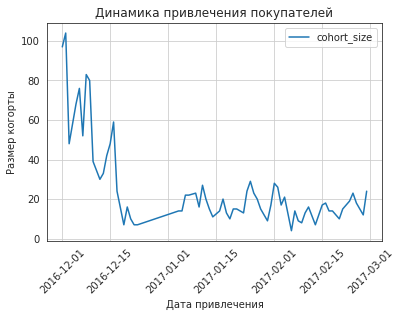

In [84]:
# строим график динамики привлечения покупателей
cohort_sizes.plot(grid=True) # постройте график, добавьте сетку

plt.title('Динамика привлечения покупателей')  # название графика
plt.xlabel('Дата привлечения')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Размер когорты')   # название оси Y
plt.show()


##### Вывод    
Максимальное количество привлеченных покупателей было накануне нового года в выходные дни - это и логично, люди выбирали и покупали подарки к новому году. Дальнейшие пики в январе связаны с покупкой на подаренные на новый год деньги, пики в феврале - с подаркми к 23 февраля.  
Привлечение максимум покупателей в декабре могут быть связаны с сезонными распродажами во всех розничных магазинах и исследуемая нами сеть "Мы строили, строили и наконец построили" - не исключение.

<a id='step_4.4'></a><h3> 4.4 тепловая карта Retention Rate  таблицы удержания клиентов</h3>   

[К плану работ](#step_0)
 

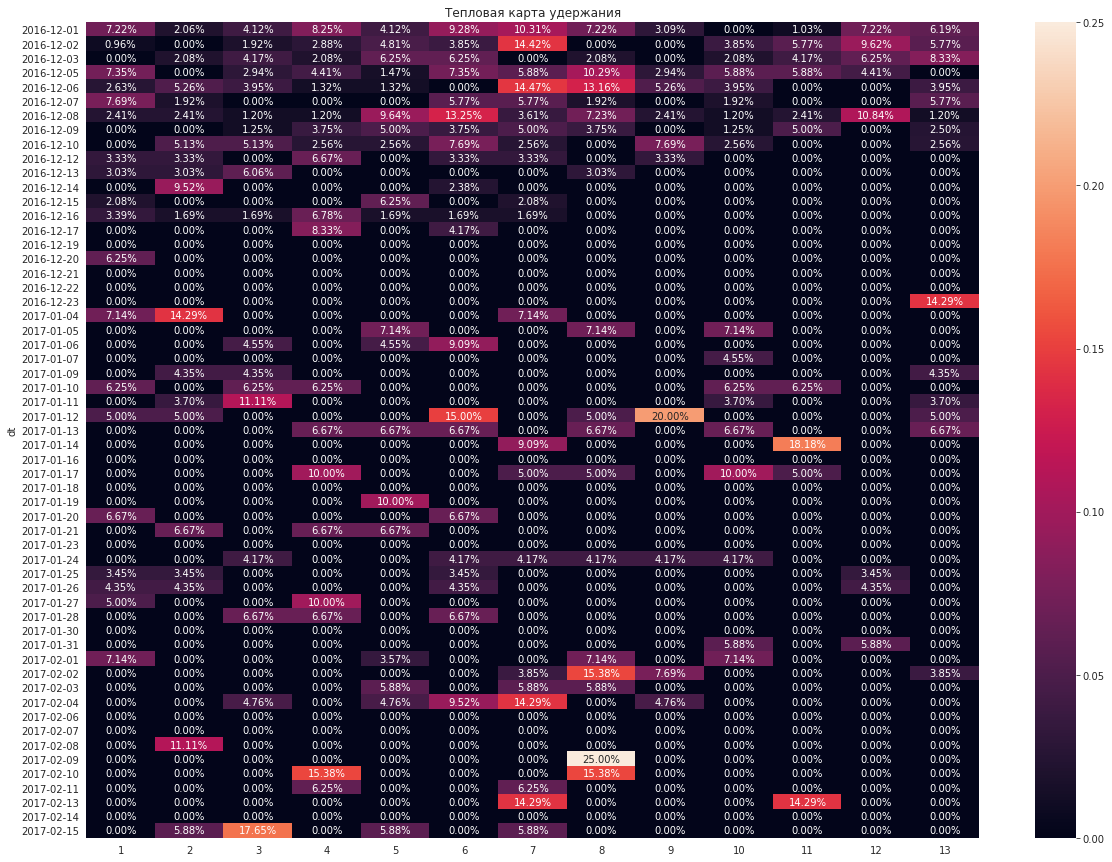

In [85]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(20, 15))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

#####  Вывод   
Плохая динамика удержания приходится на когорту 21,22 и 23 декабря, 16 января, 30 января, 6, 7 и 14 февраля. Когорты за 11 и 18 декабря, 8 и 15 января и 5 и 22 февраля - вообще отсутствуют.  
Возможно клиенты пришедшие в магазин в день влюбленных "не наш профиль" и на день защитника отечества приходят только постоянные клиенты, которые знают ассортимент и делают осознанные покупки.

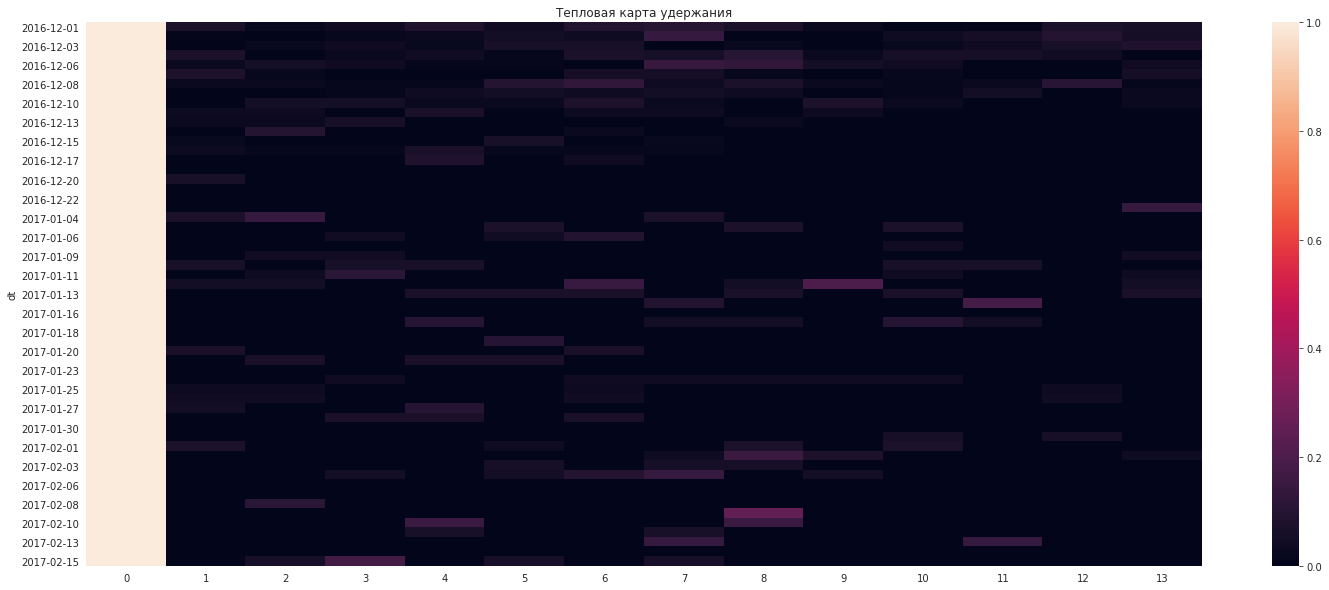

In [86]:
# строим хитмэп с учётом горизонта анализа

retention_raw, retention = get_retention(
    profiles, data_for_cohort, datetime(2017, 2, 28).date(), 14
)

plt.figure(figsize = (25, 10))  # задаём размер графика
sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = False,  # выключаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания')  # название графика
plt.show()

#####  Вывод   
всплеск когорт 9 и 10 февраля на 9-ый день можно объяснить покупками накануне 23 февраля(в начале месяца заходили и что-то запланировали купить - 18-19-в день зарплаты купили).

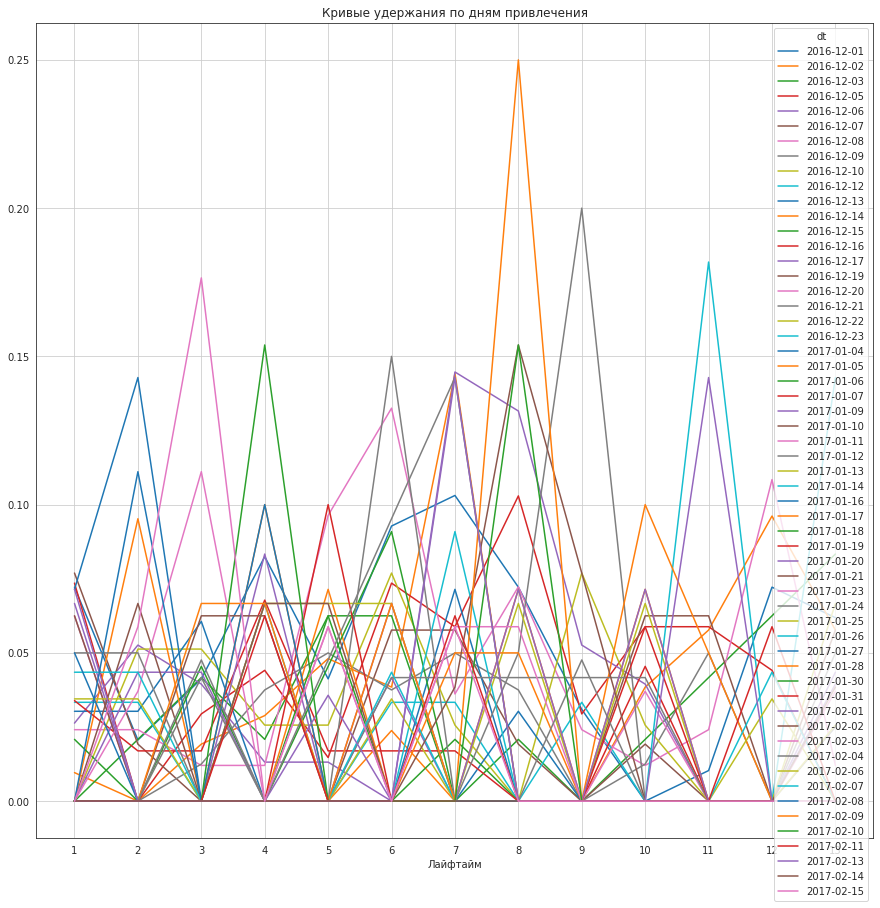

In [87]:
# строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 15),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

Пилообразная кривая удержания мне ни очем не говорит, разве что о том что визиты в наши магазины совершаются не регулярно.

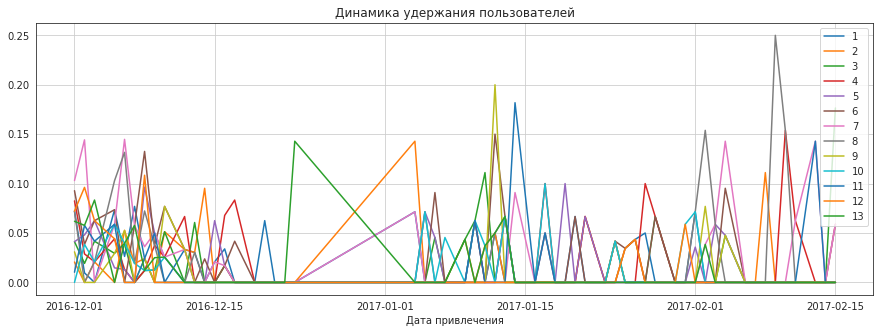

In [88]:
# строим графики изменений

report = retention.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

<a id='step_4.5'></a><h3> 4.5 расчет накопленной выручки LTV, построение графика lTV и LTV в динамике</h3>   

[К плану работ](#step_0)

In [89]:
# функция для рассчета накопленной выручки, дополнительный признак - принадлежность к программе лояльности
dimensions=['loyalty_program']
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 7. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time


In [90]:
print(profiles)

      user_id            first_ts  loyalty_program          dt      month
0     18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01
1     18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01
2     18029.0 2017-02-02 16:01:00              0.0  2017-02-02 2017-02-01
3     18031.0 2017-02-16 12:33:00              0.0  2017-02-16 2017-02-01
4     18035.0 2017-01-18 09:50:00              0.0  2017-01-18 2017-01-01
...       ...                 ...              ...         ...        ...
1722  23938.0 2016-12-08 13:38:00              1.0  2016-12-08 2016-12-01
1723  23939.0 2016-12-16 18:23:00              1.0  2016-12-16 2016-12-01
1724  23948.0 2016-12-08 13:53:00              1.0  2016-12-08 2016-12-01
1725  23956.0 2017-01-25 12:34:00              1.0  2017-01-25 2017-01-01
1726  23962.0 2017-01-06 14:14:00              1.0  2017-01-06 2017-01-01

[1727 rows x 5 columns]


In [91]:

# Вычисляем средний чек от покупки карт лояльности на человека
profiles1 = profiles[profiles['loyalty_program']==1]# выделяем только лояльных клиентов
a = profiles.groupby('month').agg({'user_id':'nunique'}).reset_index()# считаем количество лояльных клиентов по месяцам
a['bonus'] = a['user_id']*200# добавляем столбец бонус - сумма за проданные карты лояльности в месяц
print(a)
b =  a['user_id'].sum()# сумма всех бонусов от продажи карт лояльности

# средний чек от покупки карт лояльности на покупателя
bonus_0 = a['bonus'].sum()/profiles1[profiles1['loyalty_program']==1.0]['user_id'].nunique()
b1 = profiles1[profiles1['loyalty_program']==1.0]['user_id'].nunique()
print('количество уникальных лояльных пользователе', b1)
print('средний чек от покупки карт лояльности на лояльного покупателя', round(bonus_0, 2))

       month  user_id   bonus
0 2016-12-01      930  186000
1 2017-01-01      421   84200
2 2017-02-01      376   75200
количество уникальных лояльных пользователе 577
средний чек от покупки карт лояльности на лояльного покупателя 598.61


есть снижение по месяцам покупок карт лояльности - это связано как с сезонностью, так и, возможно, с разочарованием в самой программе

In [92]:
display(result_raw)
display(result_raw.info())

user_id            first_ts  loyalty_program          dt      month
0     18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01
1     18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01
2     18029.0 2017-02-02 16:01:00              0.0  2017-02-02 2017-02-01
4     18035.0 2017-01-18 09:50:00              0.0  2017-01-18 2017-01-01
5     18038.0 2017-01-12 12:43:00              0.0  2017-01-12 2017-01-01
...       ...                 ...              ...         ...        ...
1722  23938.0 2016-12-08 13:38:00              1.0  2016-12-08 2016-12-01
1723  23939.0 2016-12-16 18:23:00              1.0  2016-12-16 2016-12-01
1724  23948.0 2016-12-08 13:53:00              1.0  2016-12-08 2016-12-01
1725  23956.0 2017-01-25 12:34:00              1.0  2017-01-25 2017-01-01
1726  23962.0 2017-01-06 14:14:00              1.0  2017-01-06 2017-01-01

[1543 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 0 to 1726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          1543 non-null   float64       
 1   first_ts         1543 non-null   datetime64[ns]
 2   loyalty_program  1543 non-null   float64       
 3   dt               1543 non-null   object        
 4   month            1543 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 72.3+ KB


None

In [93]:
loy = result_raw.groupby(['user_id','month']).agg({'loyalty_program':'nunique' }).reset_index()
loy = loy.groupby(['month']).agg({'loyalty_program':'sum' }).reset_index()
loy

bonus_cart = loy['loyalty_program'].sum()
print('количество проданных карт лояльности всего', bonus_cart)

количество проданных карт лояльности всего 1543


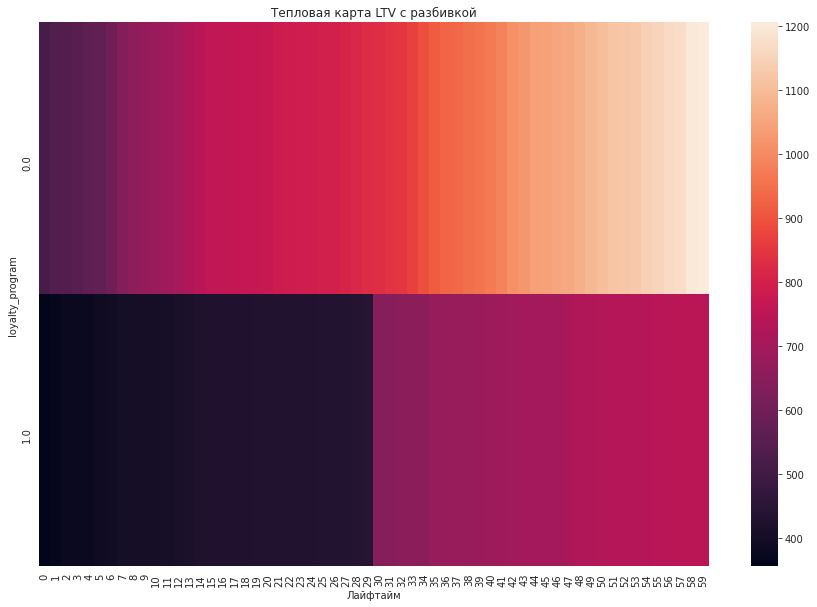

In [94]:
# преобразуем данные о времени
profiles['dt'] = pd.to_datetime(profiles['dt']).dt.date
profiles['first_ts'] = pd.to_datetime(profiles['first_ts'])
data_for_cohort['event_dt'] = pd.to_datetime(data_for_cohort['event_dt'])
# используем функцию для ltv накопленной выручки и считаем по нашим данным
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, data_for_cohort, datetime(2017, 2, 14).date(), 60, dimensions=['loyalty_program']
)

# Добавляем в накопленную выручку стоимость оплаты карт лояльности (средний чек на лояльного клиента)
ltv.loc[1,0:29] = ltv.loc[1,0:29]+200
ltv.loc[1,30:59] = ltv.loc[1,30:59]+400

# строим тепловую карту накопленной выручки LTV с разбивкой по наличию программы лояльности у покупателя
plt.figure(figsize=(15, 10))  # задаём размер графика
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=False, fmt='.2f')
plt.title('Тепловая карта LTV c разбивкой')
plt.xlabel('Лайфтайм')
plt.show()

#####  Вывод   
С добавкой от покупки карт лояльности накопленная выручка лояльных клиентов все равно не выше чем у не лояльных

In [95]:
ltv

cohort_size           0           1           2           3  \
loyalty_program                                                                
0.0                      560  513.240348  537.606170  540.402152  549.939509   
1.0                      323  356.873994  368.289628  377.199257  378.294892   

                          4           5           6           7           8  \
loyalty_program                                                               
0.0              565.497750  569.947964  594.252161  637.509839  658.716143   
1.0              380.452384  390.259814  396.183158  401.883870  404.071641   

                 ...           50           51           52           53  \
loyalty_program  ...                                                       
0.0              ...  1103.504482  1116.937348  1121.630884  1127.531866   
1.0              ...   729.436687   732.780526   734.026254   736.779845   

                          54           55           56           57  \
loyalty_program                                                       
0.0              1143.551982  1155.066750  1166.581875  1175.446732   
1.0               737.686037   742.403313   743.708545   744.817399   

                          58           59  
loyalty_program                            
0.0              1198.599893  1205.645366  
1.0               746.926409   748.073065  

[2 rows x 61 columns]

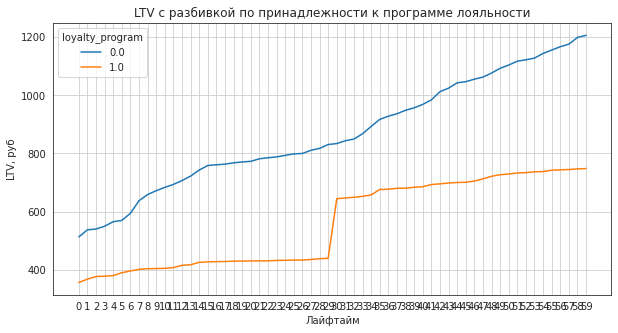

In [96]:
# строим кривые LTV

CAC1 = CAC-bonus_0+(300000+25*2000)/b
report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по принадлежности к программе лояльности')

#затраты CAC которые мы посчитали вычитаем то что заработали от продажи карт лояльноти + зп маркетолога 
#за 3 месяца + изготовление 2000 карт деленное на количество карт лояльности
plt.ylabel('LTV, руб')
plt.xlabel('Лайфтайм')
plt.show()

#####  Вывод   
Накопленная выручка по программе лояльности ниже не смотря даже на то что карты лояльности продаются ежемесячно, и она растет медленнее чем без программы лояльности. Кроме того есть снижение по месяцам покупок карт лояльности - это связано как с сезонностью, так и, возможно, с разочарованием в самой программе

<a id='step_4.6'></a><h3> 4.6 ROI</h3>   

[К плану работ](#step_0)   
В нашем проекте нет CAC и ROI и посчитать их невозможно. То, как мы это делаем - принципиально не верно. "Недополученная прибыль" не входит в затраты по определению. У нас в прибыли есть два принципиально разные части - выручка и затраты. Уменьшение выручки - это просто уменьшение выручки, к затратам это никак не относится. Выручки не достаточно для расчета САС и ROI. Именно поэтому расчет CAC и ROI будем считать ориентировочным.

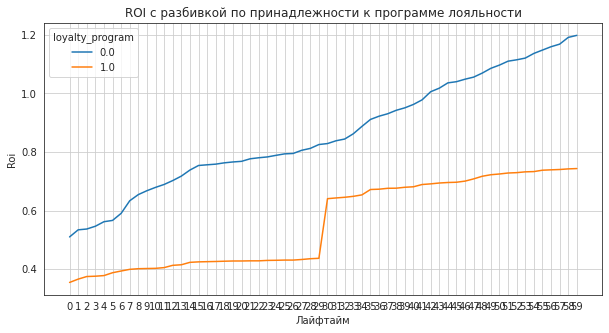

In [97]:

report1 = ltv.drop(columns=['cohort_size'])
report1 = report/CAC1

report1.T.plot(grid=True, figsize=(10, 5), xticks=list(report1.columns.values))
plt.title('ROI с разбивкой по принадлежности к программе лояльности')

#затраты CAC которые мы посчитали вычитаем то что заработали от продажи карт лояльноти + зп маркетолога 
#за 3 месяца + изготовление 2000 карт деленное на количество карт лояльности
plt.ylabel('Roi')
plt.xlabel('Лайфтайм')
plt.show()

In [98]:
CAC1

1006.0344276798606

####  Вывод   
Ориентировочные затраты на программу лояльности (1006 рублей) и выручка от нее изначально отличаются. Таким образом, затраты не окупились в течении рассматриваемого периода. По программе лояльности накопленная выручка ниже на 23%.

<a id='step_4.7'></a><h3> 4.7 График истории изменений LTV</h3>   

[К плану работ](#step_0)   
в целом в динамике и в количестве покупок видно, что 14 дней для исследования мало. Поэтому возьмем временной период в 60 дней и посмотрим репльно динамику LTV

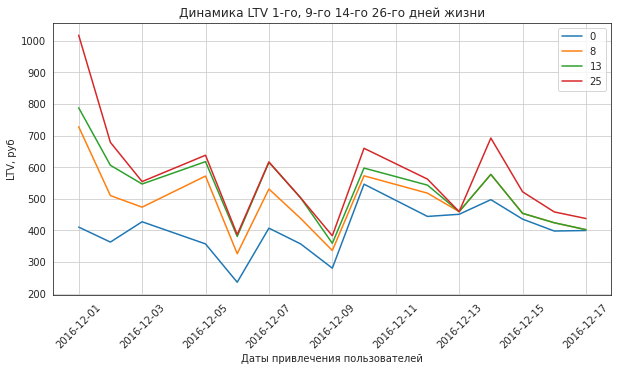

In [99]:

ltv_raw, ltv, ltv_history = get_ltv(
    profiles, data_for_cohort, datetime(2017, 2, 14).date(), 60
)

report = ltv_history[[0, 8, 13, 25]]  # делаем срез данных
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика LTV 1-го, 9-го 14-го 26-го дней жизни')
plt.xticks(rotation=45)
plt.ylabel('LTV, руб')
plt.xlabel('Даты привлечения пользователей')
plt.show()

#####  Вывод   
Накопленная выручка сильнее всего увеличилась накануне и после Нового года и перед 23 февраля - причина подарки.

<a id='step_4.8'></a><h3> 4.8 График Динамика удержания 7-го и 14-го дней жизни</h3>   

[К плану работ](#step_0) 

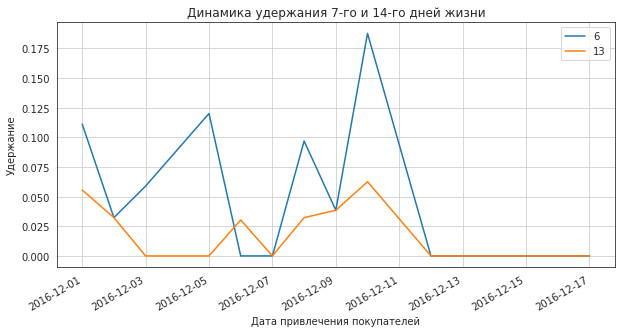

In [100]:
retention_raw, retention, retention_history = get_retention_d(
    profiles, data_for_cohort, datetime(2017, 2, 14).date(), 60,
)

report = retention_history.query('loyalty_program == 1.0').droplevel('loyalty_program')[[6, 13]]
report.plot(grid=True, figsize=(10, 5))
plt.title('Динамика удержания 7-го и 14-го дней жизни')
plt.ylabel('Удержание')
plt.xlabel('Дата привлечения покупателей')
plt.show()

#####  Вывод   
Удержание 7-го дня жизни намного выше чем 14-го. Прямая в конце графика - это новогодние каникулы.

In [101]:
# формируем таблицу чеков
orders = data_price[['purchase_id', 'customer_id', 'purchase_date', 'position_sum', 'loyalty_program']]
orders
orders = data_price.groupby(['customer_id', 'purchase_date', 'loyalty_program', 'purchase_id',]).agg({'position_sum':'sum'}).reset_index()
orders = orders.rename(columns = {'purchase_date':'event_dt', 'customer_id':'user_id',  'position_sum':'revenue'})
orders = orders[['user_id', 'event_dt', 'revenue',  'loyalty_program']]
orders.head()


user_id            event_dt  revenue  loyalty_program
0  18026.0 2016-12-07 14:57:00  955.350              0.0
1  18026.0 2017-01-26 14:30:00  781.170              0.0
2  18027.0 2016-12-16 19:09:00  761.330              0.0
3  18027.0 2017-01-25 10:42:00   28.865              0.0
4  18029.0 2017-02-02 16:01:00  386.180              0.0

In [102]:
print(orders. info())
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4061 entries, 0 to 4060
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          4061 non-null   float64       
 1   event_dt         4061 non-null   datetime64[ns]
 2   revenue          4061 non-null   float64       
 3   loyalty_program  4061 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 127.0 KB
None


0

<a id='step_4.9'></a><h3> 4.9 Средний и медианные чеки</h3>   

[К плану работ](#step_0) 

In [103]:
#Опишем таблицы чеков
display(orders.describe())
orders_loyalty1 = orders.query('loyalty_program == 1.0')
orders_loyalty = orders.query('loyalty_program == 1.0 and revenue !=0')
#Опишем таблицу чеков по программе лояльности без нулевых покупок
display('таблица чеков по программе лояльности', orders_loyalty1.describe())
display('таблица чеков по программе лояльности без нулевых покупок', orders_loyalty.describe())
orders_no_loyalty1 = orders.query('loyalty_program == 0.0')
orders_no_loyalty = orders.query('loyalty_program == 0.0 and revenue !=0')
#Опишем  таблицу чеков без программы лояльности и без нулевых покупок
display('таблица чеков без программы лояльности', orders_no_loyalty1.describe())
print('таблица чеков без программы лояльности и без нулевых покупок', orders_no_loyalty.describe())

user_id       revenue  loyalty_program
count   4061.000000   4061.000000      4061.000000
mean   20928.638266    358.133977         0.322581
std     1753.148705    669.759994         0.467521
min    18026.000000      0.000000         0.000000
25%    19429.000000     56.520000         0.000000
50%    20838.000000    176.480000         0.000000
75%    22484.000000    418.660000         1.000000
max    23962.000000  12165.700000         1.000000

'таблица чеков по программе лояльности'

user_id      revenue  loyalty_program
count   1310.000000  1310.000000           1310.0
mean   23025.689313   154.655214              1.0
std      553.488026   232.879838              0.0
min    22005.000000     0.000000              1.0
25%    22542.000000    33.750000              1.0
50%    23054.000000    90.710000              1.0
75%    23520.000000   198.510000              1.0
max    23962.000000  3412.410000              1.0

'таблица чеков по программе лояльности без нулевых покупок'

user_id      revenue  loyalty_program
count   1230.000000  1230.000000           1230.0
mean   23024.969106   164.714089              1.0
std      550.080598   236.865052              0.0
min    22005.000000     0.380000              1.0
25%    22554.000000    45.620000              1.0
50%    23048.500000    98.720000              1.0
75%    23520.000000   207.847500              1.0
max    23962.000000  3412.410000              1.0

'таблица чеков без программы лояльности'

user_id       revenue  loyalty_program
count   2751.00000   2751.000000           2751.0
mean   19930.04253    455.028626              0.0
std     1139.91341    779.316902              0.0
min    18026.00000      0.000000              0.0
25%    18825.50000     82.700000              0.0
50%    19972.00000    251.675000              0.0
75%    20880.00000    529.967500              0.0
max    22000.00000  12165.700000              0.0

таблица чеков без программы лояльности и без нулевых покупок             user_id       revenue  loyalty_program
count   2705.000000   2705.000000           2705.0
mean   19934.577449    462.766636              0.0
std     1136.845844    783.635436              0.0
min    18026.000000      0.950000              0.0
25%    18836.000000     87.185000              0.0
50%    19977.000000    259.910000              0.0
75%    20882.000000    535.445000              0.0
max    22000.000000  12165.700000              0.0


Средний чек:   
по всей таблице чеков 358 рублей   
по программе лояльности 155 рублей  
без программы лояльности 455 рубля  
по программе лояльности без нулевых покупок 165 рублей  
без программы лояльности и без нулевых покупок 462 рубля 
Медианный чек:
по всей таблице чеков 176 рублей   
по программе лояльности 91 рублей  
без программы лояльности 251 рубля 
по программе лояльности без нулевых покупок 99 рублей  
без программы лояльности и без нулевых покупок 260 рубля 

In [104]:
print('медианный чек по программе лояльности', orders.query('loyalty_program == 1.0')['revenue'].median())
print('медианный чек без программы лояльности', orders.query('loyalty_program == 0.0')['revenue'].median())


медианный чек по программе лояльности 90.71000000000001
медианный чек без программы лояльности 251.675


In [105]:
print('Средний чек по всем клиентам', orders['revenue'].mean().round(2))
print('Медианный чек по всем клиентам', orders['revenue'].median().round(2))
orders['event_dt_m'] = orders['event_dt'].dt.month
retention_pivot_avg_check = orders.pivot_table(
    index='event_dt_m',
    values='revenue',
    aggfunc='median'
)
print('медианный чек по месяцам', retention_pivot_avg_check)

Средний чек по всем клиентам 358.13
Медианный чек по всем клиентам 176.48
медианный чек по месяцам              revenue
event_dt_m          
1           196.5500
2           191.9125
12          149.6450


<Figure size 1152x432 with 0 Axes>

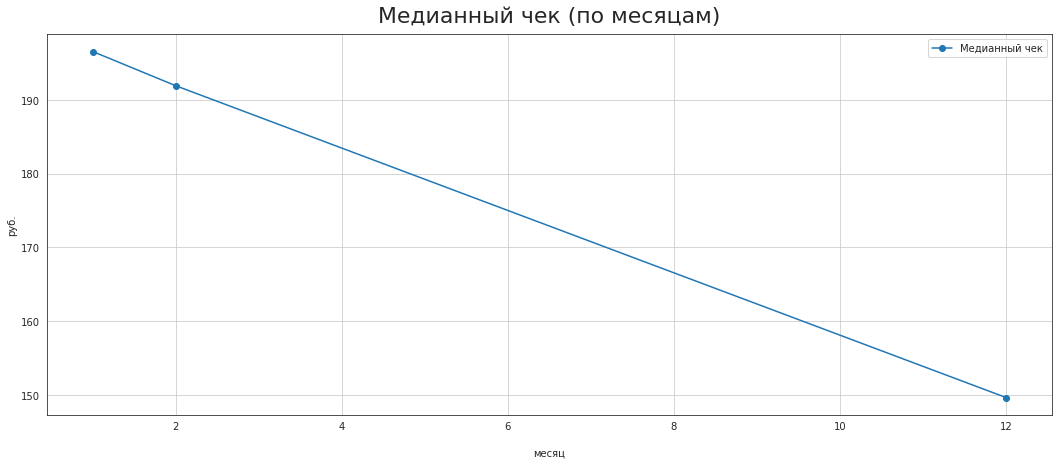

In [106]:

plt.figure(figsize=(16, 6))
fig, ax = plt.subplots(figsize=(18,7)) 
retention_pivot_avg_check.plot(style='o-', grid=True, ax=ax)
ax.legend(labels=['Медианный чек'])
ax.set_title('Медианный чек (по месяцам)', fontsize=22, y=1.015)
ax.set_xlabel('месяц', labelpad=16)
ax.set_ylabel('руб.')
plt.show()

#####  Вывод   
Несмотря на всплеск продаж перед новым годом - средний чек в декабре самый маленький - видимо но новый год строительные товары дарят недорогие. А вот после нового года те кому подарили деньги на новый год приходят за дорогими товарами.   
Несмотря на мужской праздник в феврале - чек в этом месяце ниже чем в январе, наверное потому что в январе 2 праздника - навый год, рождество и старый новый год, а в феврале только один. И еще как вывод - не только мужчины покупают подарки в сети магазинов "Мы строили, строили и наконец построили", иначе суммарный чек в январе и феврале был бы одинаковым.

Количество уникальных пользователей за день: 27
Количество уникальных пользователей за неделю: 140
Количество уникальных пользователей за месяц: 514


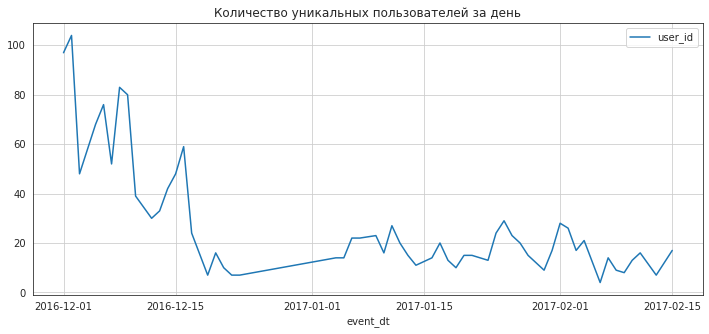

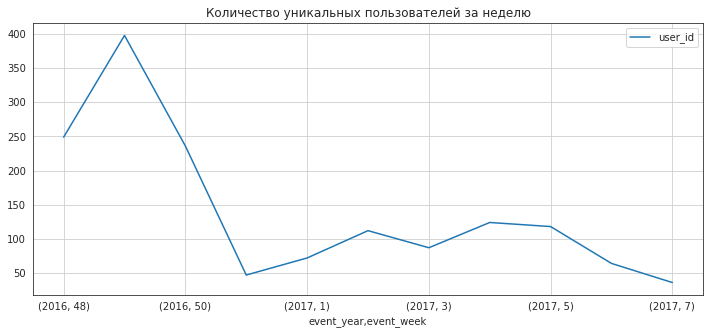

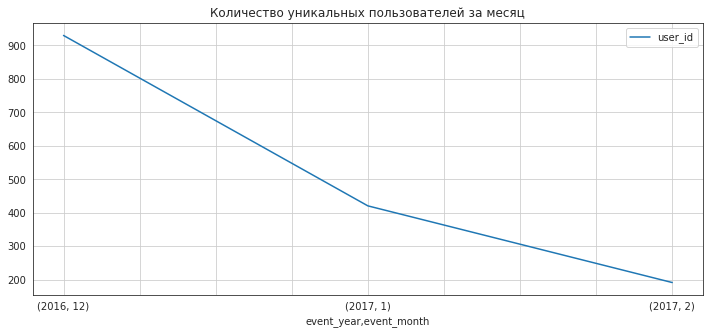

In [107]:
# Рассчитываем дневное, недельное и месячное количество привлеченных покупателй

result_raw['event_year']  = result_raw['first_ts'].dt.year
result_raw['event_month'] = result_raw['first_ts'].dt.month
result_raw['event_week']  = result_raw['first_ts'].dt.week
result_raw['event_dt'] = result_raw['first_ts'].dt.date

dau_total = result_raw.groupby('event_dt').agg({'user_id': 'nunique'})
wau_total = (
    result_raw.groupby(['event_year', 'event_week'])
    .agg({'user_id': 'nunique'})
)
mau_total = (
    result_raw.groupby(['event_year', 'event_month'])
    .agg({'user_id': 'nunique'})
)

print('Количество уникальных пользователей за день:', int(dau_total.mean()))
print('Количество уникальных пользователей за неделю:',int(wau_total.mean())) 
print('Количество уникальных пользователей за месяц:',int(mau_total.mean()))

dau_total.plot(grid=True, figsize=(12, 5), title = 'Количество уникальных пользователей за день')
plt.show()

wau_total.plot(grid=True, figsize=(12, 5), title = 'Количество уникальных пользователей за неделю')
plt.show()

mau_total.plot(grid=True, figsize=(12, 5), title = 'Количество уникальных пользователей за месяц')
plt.show()

#####  Вывод   
Количество привлеченных пользователей в день мы уже рассматривали, в Неделю - максимум на 49 неделе - за 3 недели до нового года - сезон распродаж и покупок к новому году, падение на последней неделе года связано с каникулами, далее плавный рост к началу-середине феврала, за ним снижение - праздники кончились, деньги тоже.
Количество привлеченных пользователей по месяцам постоянно снижается - это тревожная тенденци - маркетинг работает плохо - нужно что-то менять.

### Вывод по разделу когортный анализ   
Анализ ведется по таблице с 4061 чеку. Из нее выделено 1727 профиля покупателя. Когорты сформированы по дню первой покупки, в данных всего 89 лайфтаймов
На графике динамики привлечения покупателей видно, что максимальное количество привлеченных покупателей было накануне нового года в декабре, в январе и феврале привлеченных новых покупателей в разы меньше.   
Динамика удержания  в когортах с 21 по 23 декабря, 16 января, 30 января, 6, 7 и 14 февраля - плохая. Когорты за 11 и 18 декабря, 8 и 15 января и 5 и 22 февраля - вообще отсутствуют.  
Возможно клиенты пришедшие в магазин в день влюбленных "не наш профиль" и на день защитника отечества приходят только постоянные(не новые) клиенты, которые знают ассортимент и делают осознанные покупки.  
Тепловая карта удержания клиентов имеет неоднородный характер, это может свидетельствовать о том, что в строительные магазины заходят крайне редко и нерегулярно. 
Количество лояльных пользователей уменьшается от месяца к месяцу более чем в 2 раза каждый месяц - это свидетельствует об отказе клиентов оплачивать карту лояльности из-за того что выгода по ней может быть меньше чем затраты, однако также в этом вопросе нельзя исключать фактор сезонности. Есть вероятность того что с началом дачного сезона в апреле-марте покупок станет больше и клиентов программы лояльности тоже. Всего уникальных лояльных клиентов 524, а проданных карт 1543. При рассчетах уникальных лояльных пользователей мы отбросили профили без идентификатора пользователя. Получается что затраты среднего клиента программы лояльности на карты привелегий за три месяца составили 589 рублей.   
До учета выручк от карт лояльности накопленная выручка на человека LTV по программе лояльности была ниже чем клиента не участвующего в ней. При учете выручки от карт - лояльные клиенты дают выручку сетинаших магазинов выше. Однако накопленная выручка клиентов программы лояльности растет медленней чем выручка у обычных клиентов.
Программа лояльности окупилась почти в 6-7 раз и львную долю окупаемости занимает выручка от карт. Вполне возможно что можено в дальнейшем отказаться от помесячной оплаты карт лояльности или снизить цену карт постепенно. В динамике LTV больше всего накапливалась накануне праздников(подарки) на новый год и день защитника отечества.
Средний чек по всей таблице примерно 358 рублей, по программе лояльности на 54% ниже, без программы - на 29% выше.
Медианный чек по всей таблице составляет 176 рублей, по программе лояльности на 44% ниже, без программы лояльности на 48% выше.
Медианный чек самый высокий в январе - люди сами совершают покупки в период новогодних праздников, есть версия что на подаренные деньги. Январский медианный чек самый низкий - новогодние сувениры как правило недорогие. Февральский чет выше декабрьского но меньше январского.
Среднее количество уникальных пользователей за день: 27
Среднее количество уникальных пользователей за неделю: 140
Среднее количество уникальных пользователей за месяц: 514
В день привлекалось больше всего в январе, по неделям - максимум на 49-ю неделю (сезон новогодних распродаж). Помесячно количество лояльных клиентов постоянно сокращается.

<a id='step_4.10'></a><h3> 4.10 Retention rate, возьмем когорты не дневные, а недельные и также посмотрим период в 8 недель  </h3>   

[К плану работ](#step_0)   
Из-за сложности понимамия удержания клиентов по дням и динамики этого удержания попробуем укрупнить исследование и взять недельные когорты и интервал 8 недель.

<a id='step_4.10.1'></a><h3> 4.10.1 Retention rate для всей таблицы</h3>   

[К плану работ](#step_0)   

In [108]:
result_raw.head()

user_id            first_ts  loyalty_program          dt      month  \
0  18026.0 2016-12-07 14:57:00              0.0  2016-12-07 2016-12-01   
1  18027.0 2016-12-16 19:09:00              0.0  2016-12-16 2016-12-01   
2  18029.0 2017-02-02 16:01:00              0.0  2017-02-02 2017-02-01   
4  18035.0 2017-01-18 09:50:00              0.0  2017-01-18 2017-01-01   
5  18038.0 2017-01-12 12:43:00              0.0  2017-01-12 2017-01-01   

   event_year  event_month  event_week    event_dt  
0        2016           12          49  2016-12-07  
1        2016           12          50  2016-12-16  
2        2017            2           5  2017-02-02  
4        2017            1           3  2017-01-18  
5        2017            1           2  2017-01-12

In [109]:
observation_date = datetime(2017, 2, 28).date()
horizon_week = 8
last_suitable_acquisition_date = observation_date
last_suitable_acquisition_date = observation_date - timedelta(days=(horizon_week*7 - 1))
result_raw = result_raw.query('dt <= @last_suitable_acquisition_date')

In [110]:
result_raw['first_ts_week'] = result_raw['first_ts'].dt.week
result_raw = result_raw[['user_id', 'first_ts', 'loyalty_program', 'first_ts_week', 'month']]
display(result_raw.head())

data_for_cohort['event_dt_week'] = data_for_cohort['event_dt'].dt.week
display(data_for_cohort.head())
result_raw = result_raw.merge(data_for_cohort, on=['user_id', 'loyalty_program'], how='left')
result_raw.head()

user_id            first_ts  loyalty_program  first_ts_week      month
0   18026.0 2016-12-07 14:57:00              0.0             49 2016-12-01
1   18027.0 2016-12-16 19:09:00              0.0             50 2016-12-01
9   18049.0 2016-12-14 12:58:00              0.0             50 2016-12-01
12  18056.0 2016-12-20 09:37:00              0.0             51 2016-12-01
13  18062.0 2016-12-22 14:28:00              0.0             51 2016-12-01

user_id            event_dt  loyalty_program shop_id  revenue  \
0  23529.0 2016-12-01 08:26:00              1.0  Shop 0   62.800   
1  23529.0 2016-12-01 08:28:00              1.0  Shop 0    0.000   
2  18726.0 2016-12-01 08:34:00              0.0  Shop 0  285.395   
3  18726.0 2016-12-01 08:34:00              0.0  Shop 0   96.090   
4  18726.0 2016-12-01 08:35:00              0.0  Shop 0   13.200   

   event_dt_week  
0             48  
1             48  
2             48  
3             48  
4             48

user_id            first_ts  loyalty_program  first_ts_week      month  \
0  18026.0 2016-12-07 14:57:00              0.0             49 2016-12-01   
1  18026.0 2016-12-07 14:57:00              0.0             49 2016-12-01   
2  18027.0 2016-12-16 19:09:00              0.0             50 2016-12-01   
3  18027.0 2016-12-16 19:09:00              0.0             50 2016-12-01   
4  18049.0 2016-12-14 12:58:00              0.0             50 2016-12-01   

             event_dt  shop_id   revenue  event_dt_week  
0 2016-12-07 14:57:00  Shop 15   955.350             49  
1 2017-01-26 14:30:00  Shop 15   781.170              4  
2 2016-12-16 19:09:00  Shop 22   761.330             50  
3 2017-01-25 10:42:00  Shop 22    28.865              4  
4 2016-12-14 12:58:00  Shop 18  1914.335             50

In [111]:
result_raw['first_ts_week1'] = (result_raw[result_raw['first_ts_week']<48]['first_ts_week'].astype(int)+52).astype(int)
result_raw['first_week'] = result_raw['first_ts_week']
result_raw.loc[result_raw['first_ts_week']<48, 'first_week'] = result_raw['first_ts_week1']
result_raw = result_raw[['user_id', 'first_ts', 'loyalty_program', 'first_ts_week', 'event_dt', 'shop_id', 'revenue', 'event_dt_week', 'first_week']]
result_raw['event_dt_week1'] = (result_raw[result_raw['event_dt_week']<48]['event_dt_week'].astype(int)+52).astype(int)
result_raw['event_week'] = result_raw['event_dt_week']
result_raw.loc[result_raw['event_dt_week']<48, 'event_week'] = result_raw['event_dt_week1']
result_raw['lifetime'] = (result_raw['event_week'] - result_raw['first_week']).astype(int)
result_raw = result_raw[['user_id', 'first_ts_week', 'loyalty_program', 'event_dt_week', 'event_week', 'first_week', 'lifetime']]
display(result_raw)
display(result_raw.info())

user_id  first_ts_week  loyalty_program  event_dt_week  event_week  \
0     18026.0             49              0.0             49        49.0   
1     18026.0             49              0.0              4        56.0   
2     18027.0             50              0.0             50        50.0   
3     18027.0             50              0.0              4        56.0   
4     18049.0             50              0.0             50        50.0   
...       ...            ...              ...            ...         ...   
2918  23939.0             50              1.0             50        50.0   
2919  23939.0             50              1.0              2        54.0   
2920  23939.0             50              1.0              3        55.0   
2921  23948.0             49              1.0             49        49.0   
2922  23948.0             49              1.0             50        50.0   

      first_week  lifetime  
0           49.0         0  
1           49.0         7  
2           50.0         0  
3           50.0         6  
4           50.0         0  
...          ...       ...  
2918        50.0         0  
2919        50.0         4  
2920        50.0         5  
2921        49.0         0  
2922        49.0         1  

[2923 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2923 non-null   float64
 1   first_ts_week    2923 non-null   int64  
 2   loyalty_program  2923 non-null   float64
 3   event_dt_week    2923 non-null   int64  
 4   event_week       2923 non-null   float64
 5   first_week       2923 non-null   float64
 6   lifetime         2923 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 247.2 KB


None

In [112]:
# строим таблицу удержания

result_grouped = result_raw.pivot_table(
    index=['first_week'], columns='lifetime', values='user_id', aggfunc='nunique'
)

result_grouped.head(30)

lifetime       0      1     2     3     4     5     6     7     8     9   \
first_week                                                                 
48.0        249.0   60.0  66.0  24.0   NaN  43.0  41.0  32.0  34.0  45.0   
49.0        398.0  103.0  40.0   NaN  51.0  61.0  44.0  58.0  50.0  54.0   
50.0        236.0   19.0   NaN  21.0  26.0  24.0  31.0  25.0  20.0  26.0   
51.0         47.0    NaN   3.0   4.0   2.0   3.0   6.0   4.0   2.0   3.0   
53.0         14.0    1.0   NaN   NaN   2.0   NaN   2.0   NaN   NaN   NaN   

lifetime      10    11    12    13  
first_week                          
48.0        42.0  36.0  35.0  10.0  
49.0        46.0  44.0  10.0   NaN  
50.0        17.0   5.0   NaN   NaN  
51.0         3.0   NaN   NaN   NaN  
53.0         NaN   NaN   NaN   NaN

In [113]:
# вычисляем размеры когорт

cohort_sizes = (
    result_raw.groupby('first_week')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes

cohort_size
first_week             
48.0                249
49.0                398
50.0                236
51.0                 47
53.0                 14

In [114]:
# объединяем размеры когорт и таблицу удержания

result_grouped = cohort_sizes.merge(
    result_grouped, on='first_week', how='left'
).fillna(0)

result_grouped

cohort_size      0      1     2     3     4     5     6     7  \
first_week                                                                  
48.0                249  249.0   60.0  66.0  24.0   0.0  43.0  41.0  32.0   
49.0                398  398.0  103.0  40.0   0.0  51.0  61.0  44.0  58.0   
50.0                236  236.0   19.0   0.0  21.0  26.0  24.0  31.0  25.0   
51.0                 47   47.0    0.0   3.0   4.0   2.0   3.0   6.0   4.0   
53.0                 14   14.0    1.0   0.0   0.0   2.0   0.0   2.0   0.0   

               8     9    10    11    12    13  
first_week                                      
48.0        34.0  45.0  42.0  36.0  35.0  10.0  
49.0        50.0  54.0  46.0  44.0  10.0   0.0  
50.0        20.0  26.0  17.0   5.0   0.0   0.0  
51.0         2.0   3.0   3.0   0.0   0.0   0.0  
53.0         0.0   0.0   0.0   0.0   0.0   0.0

In [115]:
# делим данные таблицы удержания на размеры когорт

result_grouped = result_grouped.div(
    result_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped

0         1         2         3         4         5         6   \
first_week                                                                    
48.0        1.0  0.240964  0.265060  0.096386  0.000000  0.172691  0.164659   
49.0        1.0  0.258794  0.100503  0.000000  0.128141  0.153266  0.110553   
50.0        1.0  0.080508  0.000000  0.088983  0.110169  0.101695  0.131356   
51.0        1.0  0.000000  0.063830  0.085106  0.042553  0.063830  0.127660   
53.0        1.0  0.071429  0.000000  0.000000  0.142857  0.000000  0.142857   

                  7         8         9         10        11        12  \
first_week                                                               
48.0        0.128514  0.136546  0.180723  0.168675  0.144578  0.140562   
49.0        0.145729  0.125628  0.135678  0.115578  0.110553  0.025126   
50.0        0.105932  0.084746  0.110169  0.072034  0.021186  0.000000   
51.0        0.085106  0.042553  0.063830  0.063830  0.000000  0.000000   
53.0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  13  
first_week            
48.0        0.040161  
49.0        0.000000  
50.0        0.000000  
51.0        0.000000  
53.0        0.000000

In [116]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2017, 2, 28).date()
horizon_week = 8

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [117]:
# восстанавливаем столбец с размерами когорт
result_grouped['cohort_size'] = cohort_sizes

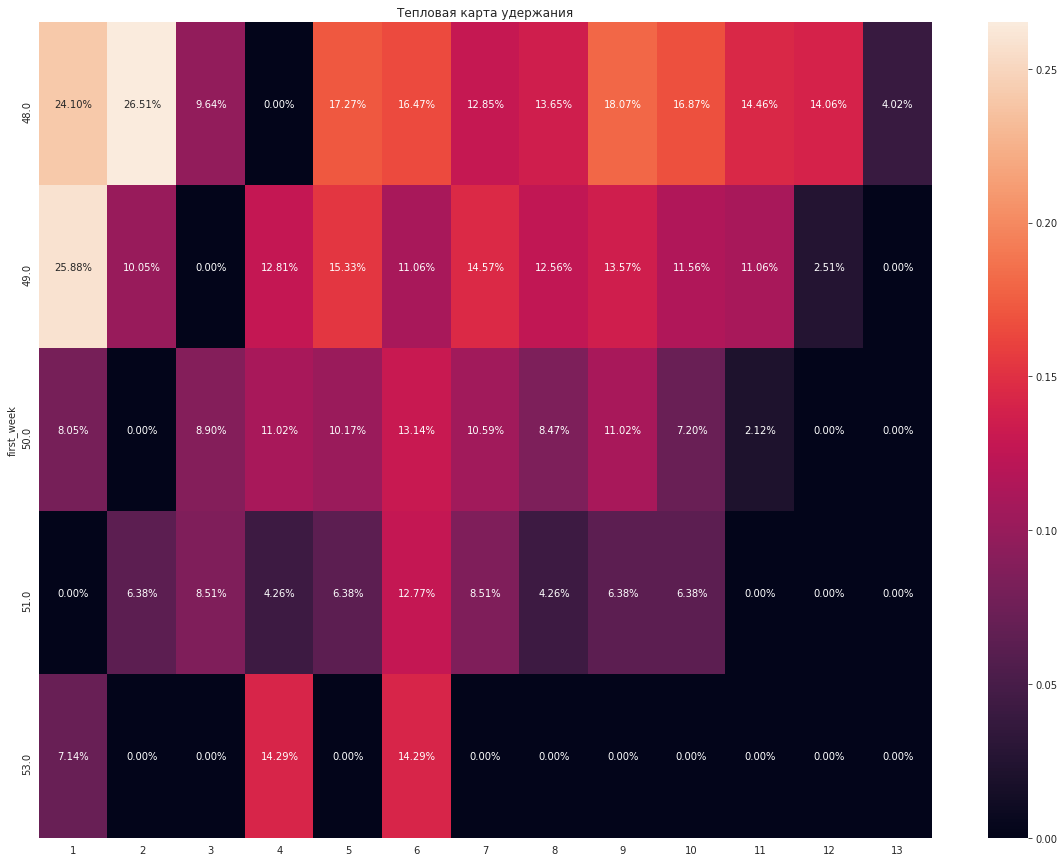

In [118]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(20, 15))  # задаём размер графика
sns.heatmap(
    result_grouped.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

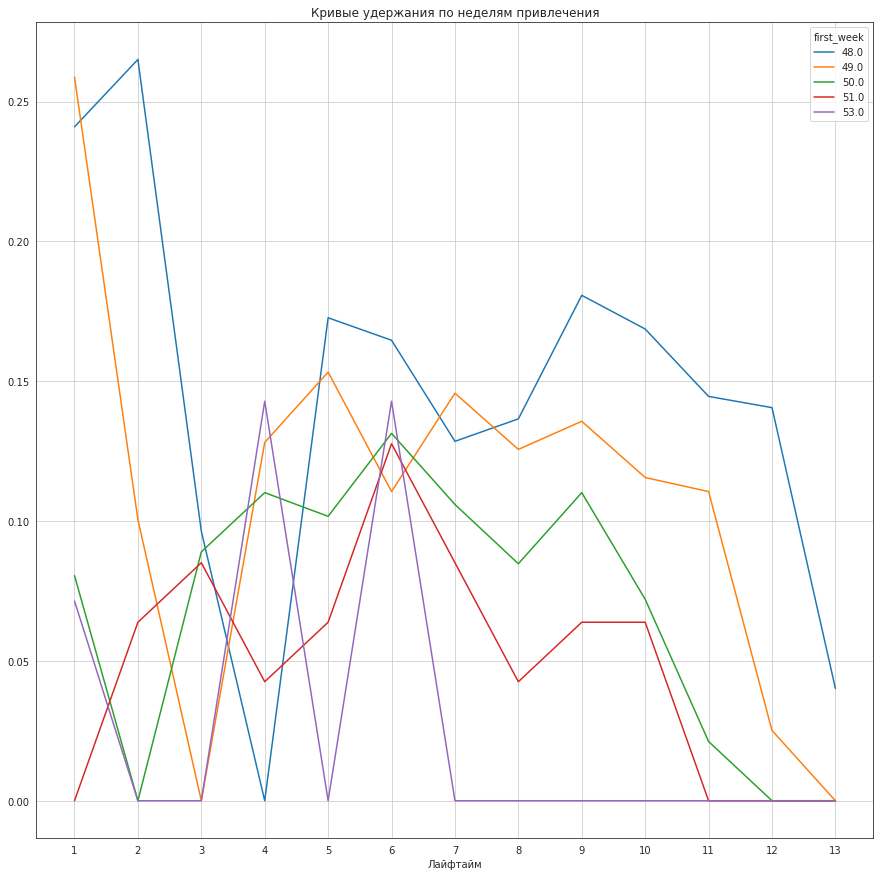

In [119]:
# строим кривые удержания

report = result_grouped.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 15),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по неделям привлечения')  # название графика
plt.show()

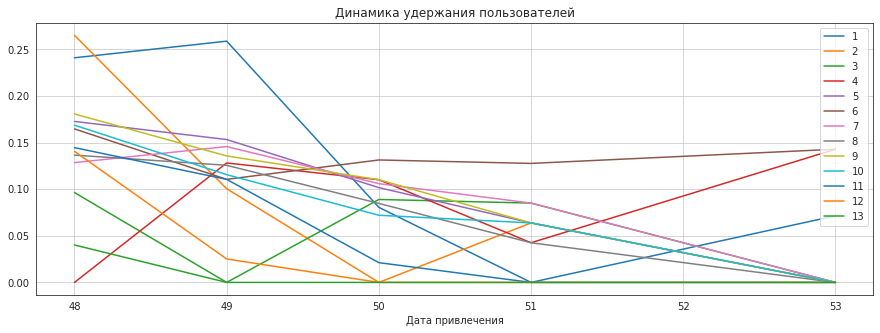

In [120]:
# строим графики изменений

report = result_grouped.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

<a id='step_4.10.2'></a><h3> 4.10.2 Retention rate для лояльных клиентов</h3>   

[К плану работ](#step_0)   

In [121]:
result_raw_l = result_raw.query('loyalty_program==1.0')

In [122]:
# строим таблицу удержания

result_grouped_l = result_raw_l.pivot_table(
    index=['first_week'], columns='lifetime', values='user_id', aggfunc='nunique'
)

result_grouped_l.head(30)

lifetime       0     1     2    3     4     5     6     7     8     9     10  \
first_week                                                                     
48.0         84.0  19.0  18.0  8.0   NaN   5.0   8.0   8.0   7.0  10.0  13.0   
49.0        146.0  43.0  13.0  NaN  13.0  22.0  14.0  20.0  19.0  18.0  16.0   
50.0         93.0   9.0   NaN  4.0  10.0  12.0  11.0  13.0  11.0  12.0   6.0   
51.0         13.0   NaN   1.0  NaN   NaN   NaN   3.0   3.0   NaN   1.0   NaN   
53.0          2.0   1.0   NaN  NaN   1.0   NaN   1.0   NaN   NaN   NaN   NaN   

lifetime      11   12   13  
first_week                  
48.0        10.0  9.0  1.0  
49.0        19.0  4.0  NaN  
50.0         2.0  NaN  NaN  
51.0         NaN  NaN  NaN  
53.0         NaN  NaN  NaN

In [123]:
# вычисляем размеры когорт

cohort_sizes_l = (
    result_raw_l.groupby('first_week')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes_l

cohort_size
first_week             
48.0                 84
49.0                146
50.0                 93
51.0                 13
53.0                  2

In [124]:
# объединяем размеры когорт и таблицу удержания

result_grouped_l = cohort_sizes_l.merge(
    result_grouped_l, on='first_week', how='left'
).fillna(0)

result_grouped_l

cohort_size      0     1     2    3     4     5     6     7     8  \
first_week                                                                      
48.0                 84   84.0  19.0  18.0  8.0   0.0   5.0   8.0   8.0   7.0   
49.0                146  146.0  43.0  13.0  0.0  13.0  22.0  14.0  20.0  19.0   
50.0                 93   93.0   9.0   0.0  4.0  10.0  12.0  11.0  13.0  11.0   
51.0                 13   13.0   0.0   1.0  0.0   0.0   0.0   3.0   3.0   0.0   
53.0                  2    2.0   1.0   0.0  0.0   1.0   0.0   1.0   0.0   0.0   

               9    10    11   12   13  
first_week                              
48.0        10.0  13.0  10.0  9.0  1.0  
49.0        18.0  16.0  19.0  4.0  0.0  
50.0        12.0   6.0   2.0  0.0  0.0  
51.0         1.0   0.0   0.0  0.0  0.0  
53.0         0.0   0.0   0.0  0.0  0.0

In [125]:
# делим данные таблицы удержания на размеры когорт

result_grouped_l = result_grouped_l.div(
    result_grouped_l['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped_l

0         1         2         3         4         5         6   \
first_week                                                                    
48.0        1.0  0.226190  0.214286  0.095238  0.000000  0.059524  0.095238   
49.0        1.0  0.294521  0.089041  0.000000  0.089041  0.150685  0.095890   
50.0        1.0  0.096774  0.000000  0.043011  0.107527  0.129032  0.118280   
51.0        1.0  0.000000  0.076923  0.000000  0.000000  0.000000  0.230769   
53.0        1.0  0.500000  0.000000  0.000000  0.500000  0.000000  0.500000   

                  7         8         9         10        11        12  \
first_week                                                               
48.0        0.095238  0.083333  0.119048  0.154762  0.119048  0.107143   
49.0        0.136986  0.130137  0.123288  0.109589  0.130137  0.027397   
50.0        0.139785  0.118280  0.129032  0.064516  0.021505  0.000000   
51.0        0.230769  0.000000  0.076923  0.000000  0.000000  0.000000   
53.0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  13  
first_week            
48.0        0.011905  
49.0        0.000000  
50.0        0.000000  
51.0        0.000000  
53.0        0.000000

In [126]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2017, 2, 28).date()
horizon_week = 8

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [127]:
# восстанавливаем столбец с размерами когорт
result_grouped_l['cohort_size'] = cohort_sizes_l

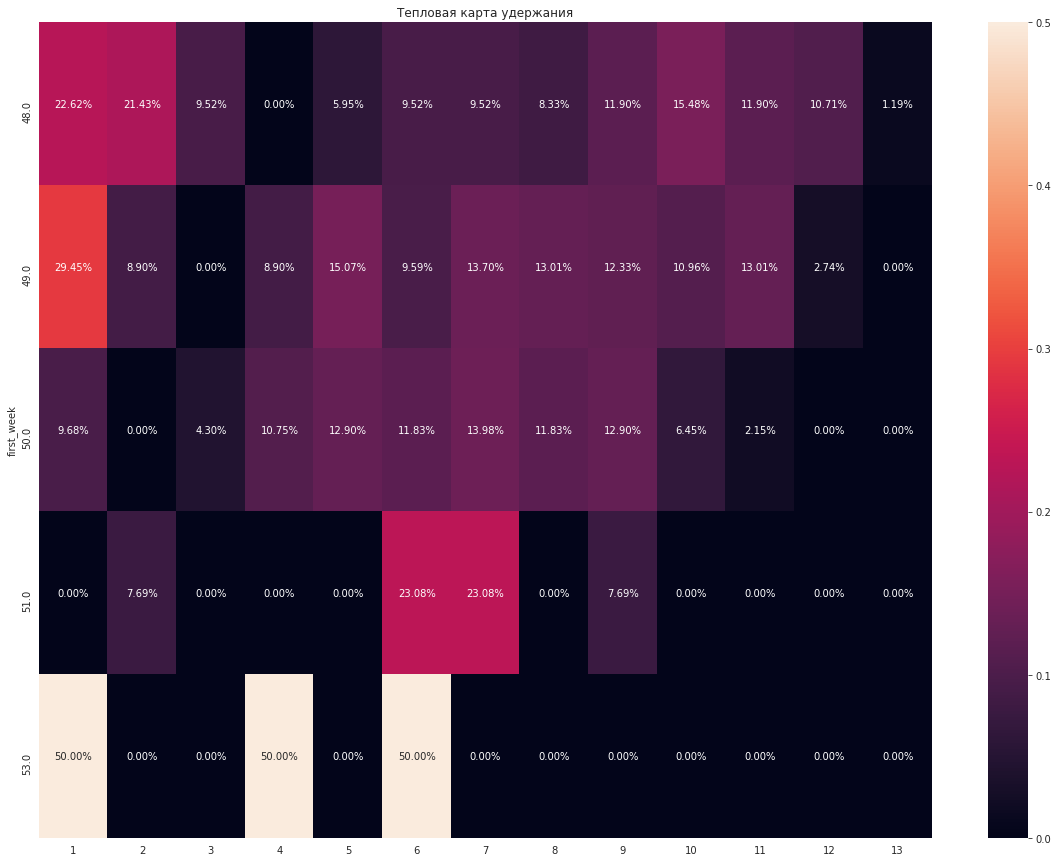

In [128]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(20, 15))  # задаём размер графика
sns.heatmap(
    result_grouped_l.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

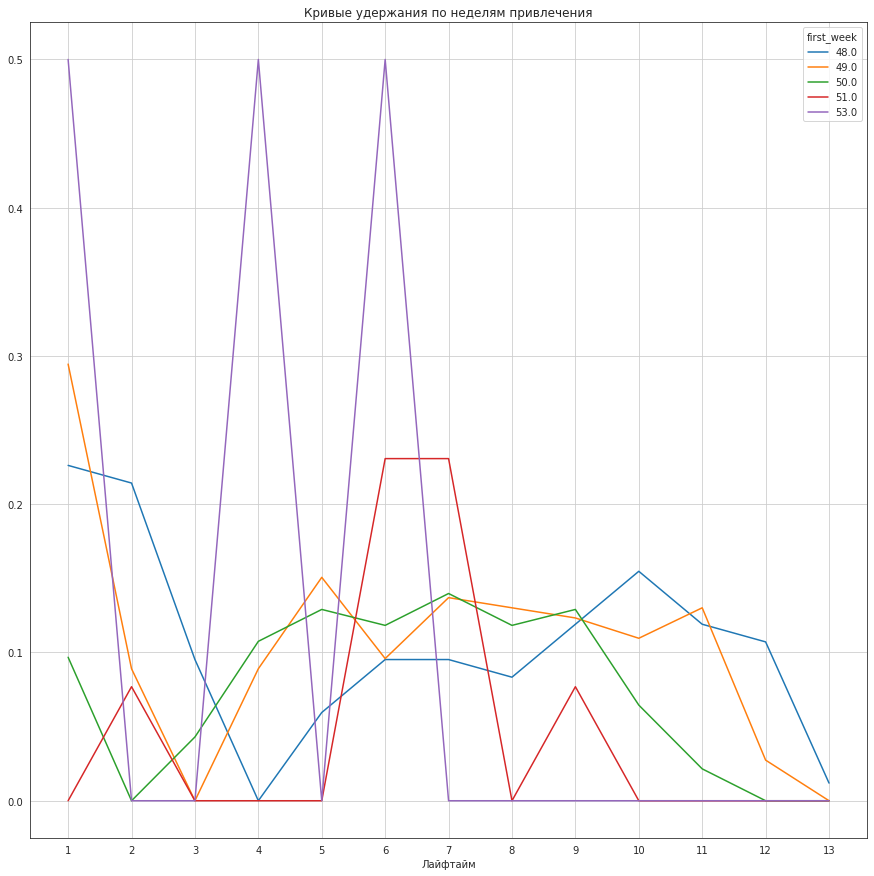

In [129]:
# строим кривые удержания

report = result_grouped_l.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 15),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по неделям привлечения')  # название графика
plt.show()

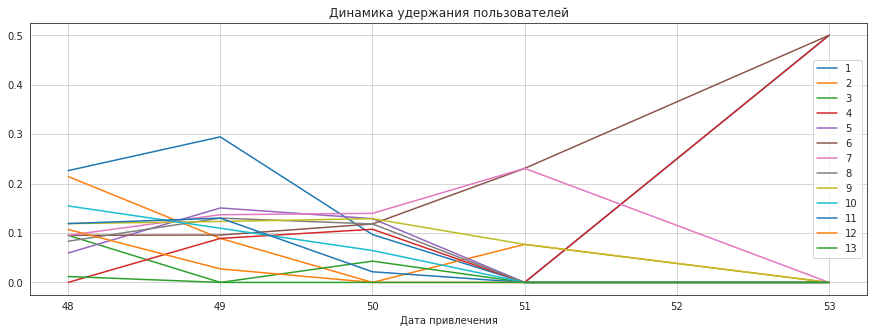

In [130]:
# строим графики изменений

report = result_grouped_l.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

<a id='step_4.10.3'></a><h3> 4.10.3 Retention rate для не лояльных клиентов</h3>   

[К плану работ](#step_0)    

In [131]:
result_raw_n = result_raw.query('loyalty_program==0.0')

In [132]:
# строим таблицу удержания

result_grouped_n = result_raw_n.pivot_table(
    index=['first_week'], columns='lifetime', values='user_id', aggfunc='nunique'
)

result_grouped_n.head(30)

lifetime       0     1     2     3     4     5     6     7     8     9     10  \
first_week                                                                      
48.0        165.0  41.0  48.0  16.0   NaN  38.0  33.0  24.0  27.0  35.0  29.0   
49.0        252.0  60.0  27.0   NaN  38.0  39.0  30.0  38.0  31.0  36.0  30.0   
50.0        143.0  10.0   NaN  17.0  16.0  12.0  20.0  12.0   9.0  14.0  11.0   
51.0         34.0   NaN   2.0   4.0   2.0   3.0   3.0   1.0   2.0   2.0   3.0   
53.0         12.0   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN   NaN   

lifetime      11    12   13  
first_week                   
48.0        26.0  26.0  9.0  
49.0        25.0   6.0  NaN  
50.0         3.0   NaN  NaN  
51.0         NaN   NaN  NaN  
53.0         NaN   NaN  NaN

In [133]:
# вычисляем размеры когорт

cohort_sizes_n = (
    result_raw_n.groupby('first_week')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes_n

cohort_size
first_week             
48.0                165
49.0                252
50.0                143
51.0                 34
53.0                 12

In [134]:
# объединяем размеры когорт и таблицу удержания

result_grouped_n = cohort_sizes_n.merge(
    result_grouped_n, on='first_week', how='left'
).fillna(0)

result_grouped_n

cohort_size      0     1     2     3     4     5     6     7  \
first_week                                                                 
48.0                165  165.0  41.0  48.0  16.0   0.0  38.0  33.0  24.0   
49.0                252  252.0  60.0  27.0   0.0  38.0  39.0  30.0  38.0   
50.0                143  143.0  10.0   0.0  17.0  16.0  12.0  20.0  12.0   
51.0                 34   34.0   0.0   2.0   4.0   2.0   3.0   3.0   1.0   
53.0                 12   12.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   

               8     9    10    11    12   13  
first_week                                     
48.0        27.0  35.0  29.0  26.0  26.0  9.0  
49.0        31.0  36.0  30.0  25.0   6.0  0.0  
50.0         9.0  14.0  11.0   3.0   0.0  0.0  
51.0         2.0   2.0   3.0   0.0   0.0  0.0  
53.0         0.0   0.0   0.0   0.0   0.0  0.0

In [135]:
# делим данные таблицы удержания на размеры когорт

result_grouped_n = result_grouped_n.div(
    result_grouped_n['cohort_size'], axis=0
).drop(columns=['cohort_size'])

result_grouped_n

0         1         2         3         4         5         6   \
first_week                                                                    
48.0        1.0  0.248485  0.290909  0.096970  0.000000  0.230303  0.200000   
49.0        1.0  0.238095  0.107143  0.000000  0.150794  0.154762  0.119048   
50.0        1.0  0.069930  0.000000  0.118881  0.111888  0.083916  0.139860   
51.0        1.0  0.000000  0.058824  0.117647  0.058824  0.088235  0.088235   
53.0        1.0  0.000000  0.000000  0.000000  0.083333  0.000000  0.083333   

                  7         8         9         10        11        12  \
first_week                                                               
48.0        0.145455  0.163636  0.212121  0.175758  0.157576  0.157576   
49.0        0.150794  0.123016  0.142857  0.119048  0.099206  0.023810   
50.0        0.083916  0.062937  0.097902  0.076923  0.020979  0.000000   
51.0        0.029412  0.058824  0.058824  0.088235  0.000000  0.000000   
53.0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  13  
first_week            
48.0        0.054545  
49.0        0.000000  
50.0        0.000000  
51.0        0.000000  
53.0        0.000000

In [136]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2017, 2, 28).date()
horizon_week = 8

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [137]:
# восстанавливаем столбец с размерами когорт
result_grouped_n['cohort_size'] = cohort_sizes_l

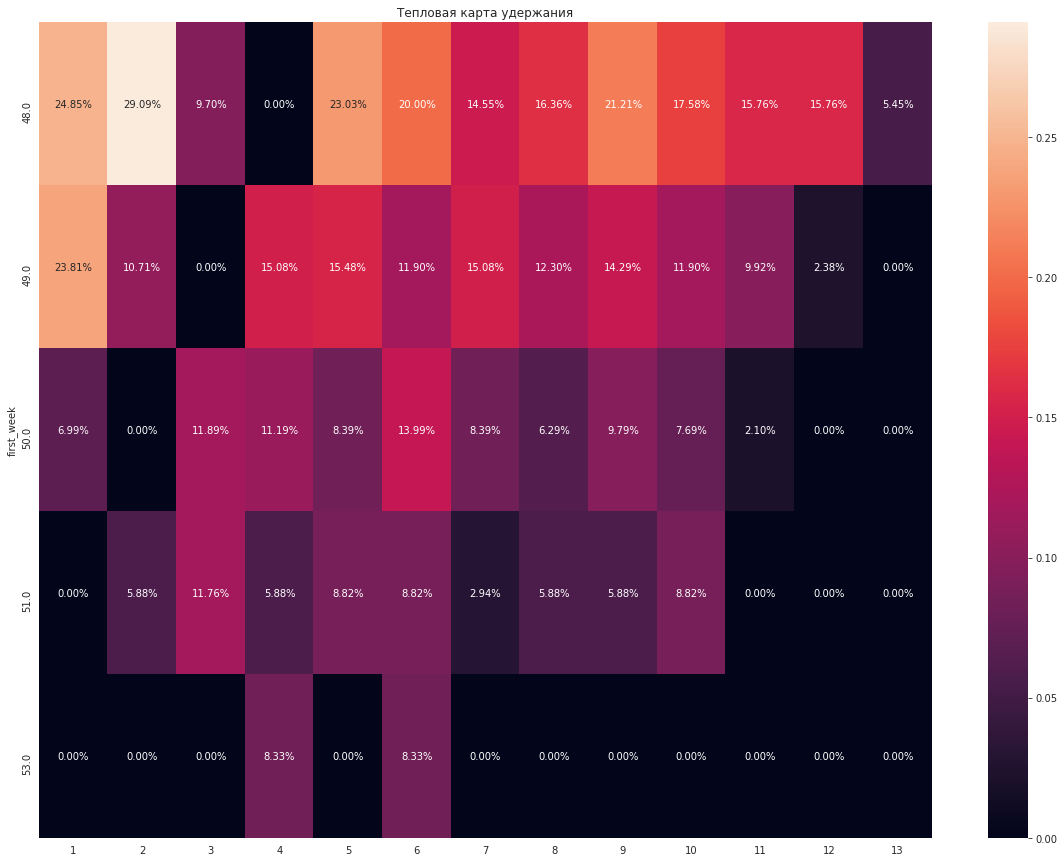

In [138]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(20, 15))  # задаём размер графика
sns.heatmap(
    result_grouped_n.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

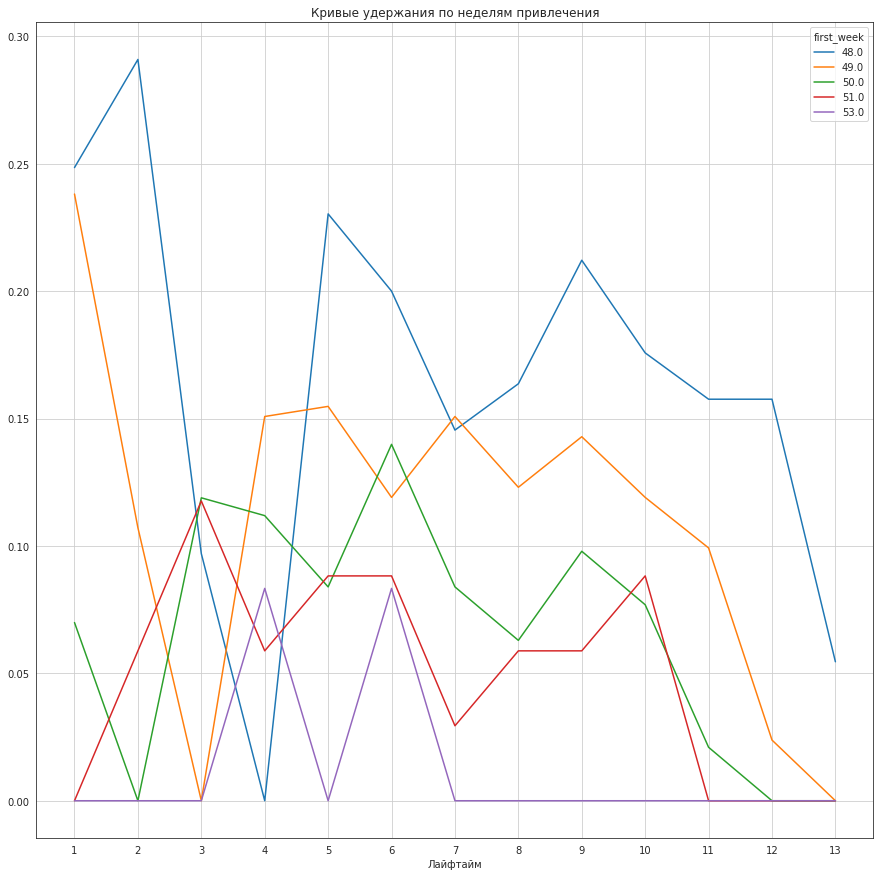

In [139]:
# строим кривые удержания

report = result_grouped_n.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 15),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по неделям привлечения')  # название графика
plt.show()

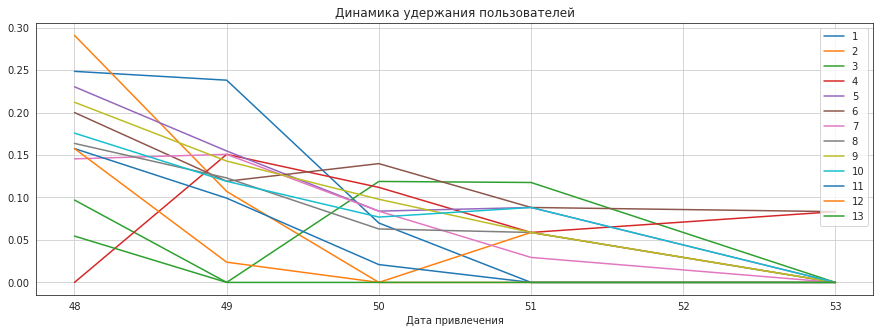

In [140]:
# строим графики изменений

report = result_grouped_n.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Дата привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

#### Вывод
Удержание клиентов без программы лояльности в целом выглядит лучше, однако у лояльных клиентов есть когорты и лайфтаймы в которых коэффициент 50%, это скорее всего на 23 февраля - половина лояльных клиентов вернулась накануне мужского праздника. Кроме того 4 и 6 лайфтаймы у обоих групп выше в динамике первой недели января чем остальные - это связано с накопленны спросом за праздничные дни.
Тепловая карты лояльных клиентов имеют более контрастные ячейки, не лояльных в целом карта теплее.

<a id='step_5'></a><h3> 5. Формулируем и проверим статистические гипотезы.  </h3>   

[К плану работ](#step_0) 

In [141]:
revenue_loyalty = data_for_cohort[data_for_cohort['loyalty_program']==1.0]['revenue']
revenue_unloyalty = data_for_cohort[data_for_cohort['loyalty_program']==0.0]['revenue']
revenue_shop0 = data_for_cohort[data_for_cohort['shop_id'] == 'Shop 0'][['revenue', 'loyalty_program']]
revenue_loyalty_shop0 = revenue_shop0[revenue_shop0['loyalty_program']==1.0]['revenue']
revenue_unloyalty_shop0 = revenue_shop0[revenue_shop0['loyalty_program']==0.0]['revenue']
revenue_loyalty = revenue_loyalty.sort_values(ascending=False)
revenue_unloyalty = revenue_unloyalty.sort_values(ascending=False)
revenue_loyalty_shop0 = revenue_loyalty_shop0.sort_values(ascending=False)
revenue_unloyalty_shop0 = revenue_unloyalty_shop0.sort_values(ascending=False)


<a id='step_5.1'></a><h3> 5.1 Гипотеза о среднем чеке  </h3>   

[К плану работ](#step_0)    


H0: средний чек участников программы лояльности и у остальных покупателей равны.  
          H1: средний чек участников программы лояльности и у остальных покупателей не равны.

In [142]:
# H0 гипотеза: средние чеки по программе лояльности и без программы лояльности равны
# H1 гипотеза средние чеки по программе лояльности и без программы лояльности не равны
revenue_loyalty
revenue_unloyalty
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(revenue_loyalty, revenue_unloyalty)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  4.193493269541676e-93
Отвергаем нулевую гипотезу: разница статистически значима


<a id='step_5.2'></a><h3> 5.2 Гипотеза о среднем чеке в магазине Shop 0 </h3>   

[К плану работ](#step_0)    

H0: средний чек в магазине Shop 0 участников программы лояльности и у остальных покупателей равны.  
          H1: средний чек в магазине Shop 0 участников программы лояльности и у остальных покупателей не равны.

Проверим гипотезы с помощью статистического теста. </h3>   



In [143]:
# H0 гипотеза: средние чеки в магазине Shop 0 по программе лояльности и без программы лояльности равны
# H1 гипотеза средние чеки в магазине Shop 0 по программе лояльности и без программы лояльности не равны

revenue_loyalty_shop0
revenue_unloyalty_shop0
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(revenue_loyalty_shop0, revenue_unloyalty_shop0)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  2.3953164673661012e-82
Отвергаем нулевую гипотезу: разница статистически значима


<a id='step_5.3'></a><h3> 5.3 Retention, количество покупок на человека, количество товаров на покупателя или в корзине - статистические гипотезы</h3>   

[К плану работ](#step_0) 

In [144]:
report = retention.drop(columns=['cohort_size', 0])
report_n = report.loc[0].sort_values()
a = list(report_n)
report_l = report.loc[1].sort_values()
b = list(report_l)

In [145]:
# H0 гипотеза: Retention  по программе лояльности  и без программы лояльности равны

# H1 гипотеза Retention  по программе лояльности и без программы лояльности не равны
a
b

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(a,b)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.025699705421314088
Отвергаем нулевую гипотезу: разница статистически значима


In [146]:
report = retention.drop(columns=['cohort_size', 0])
report_n = report.loc[0].sort_values()
a = list(report_n)
report_l = report.loc[1].sort_values()
b = list(report_l)

In [147]:
data_per_u = data.dropna().reset_index()
# группируем таблицу по магазинам и программе лояльности
data_per_u = data_per_u.groupby(['customer_id', 'purchase_date', 'loyalty_program'], as_index=False).agg({'quantity':'sum'}).sort_values(by='purchase_date', ascending=False)

data_per_u_l = list(data_per_u[data_per_u['loyalty_program'] == 1.0]['quantity'].abs().sort_values())
data_per_u_n = list(data_per_u[data_per_u['loyalty_program'] == 0.0]['quantity'].abs().sort_values())


In [148]:
# H0 гипотеза: количество товара на человека  по программе лояльности  и без программы лояльности равны

# H1 гипотеза количество товара на человека  по программе лояльности и без программы лояльности не равны
data_per_u_l
data_per_u_n

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(data_per_u_l,data_per_u_n)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.009839627475495046
Отвергаем нулевую гипотезу: разница статистически значима


<a id='step_5.4'></a><h3> 5.4 Вывод по статистическому анализу гипотез  </h3>   

[К плану работ](#step_0)   

##### Вывод:   
Мы проверили статистические гипотезы о равенстве средних чеков во всех магазинах по программе лояльности и без с помощью теста Манна-Уинни и отвергли нулевую гипотезу.
В проверке статистической гипотезы о равестве чеков по программе лояльности и без в головном магазине Shop 0 мы тоже отвергли нулевую гипотезу - чеки не равны.   
Проверка статистических гипотез о равенстве удержания клиентов и количества товаров в чеке по программе лояльности и без не подтвердились - они разные

<a id='step_6'></a><h3> 6. Результаты исследования, выводы и рекомендации для заказчика  </h3>   

[К плану работ](#step_0)     

Исходя из вышеперечисленного подводим итог:
Данные исследования включают 3  месяца наблюдений (с 2016-12-01 08:26:00) - данные с касс 31 магазина сети "Мы строили, строили и наконец построили". Из них только один магазин - с большим оборотом товара (92%) - Shop 0. Всего 4061 чек и 1727 профиля покупателя для анализа.
В 4-х магазинах действует программа лояльности, количество лояльных клиентов в 2 раза меньше чем не лояльных.  
В исходных данных есть пропуски, дубликаты, неверные и отрицательные значения. Помимо этого в таблице товар-цена одному товару соответствует до 7 цен. Однозначной привязки цен из прайса к товарам в таблице данных с касс - нет, ни по времени ни по номеру магазина.  
Поэтому в исследовании были сделаны допущения, удалена часть данных и заменены отрицательные значения на положительные. В силу этого наше исследование носит ориентировочный характер и в нем могут быть неточности.   
Привязка цен происходит по принципу: минимальная цена соответствует прайсу программы лояльности, медианная - основному.
Доля товаров купленных по программе лояльности во всей сети 22%, а в Shop 0 - почти на 10% больше. Значит при повышении оборота магазинов - будет расти и доля покупок по программе лояльности, есть потенциал для роста.
Медианная цена прайса 2,55 рублей, средняя - 19 - это свидетельствует о низком прайсе и больших выбросах.
В одном из магазинов лояльности самое высокое количество товаров чеке - Shop 19,однако последний месяц этот магазин не работает. Может быть товары закончились (по программе лояльности) или собственники недовольны ходом реализации программы. В магазине 8 в чеках по программе лояльности маленькое количество товаров - или клиенты не хотят пользоваться программой или выбор ассортимента не большой.   
магазины 5, 9, 11, 15, 20, 21, 25, 27, 29, 30 - кандидаты на введение программы лояльности в дальнейшем - там мало продается товара. При этом магазин 5 входит в топ 5 магазинов в которых максимум товара на покупателя и по количеству проданного товара в чеке, а 20, 21, 29 - минимальное количество товара на покупателя.   
Shop 3, Shop 14, Shop 2, Shop 22 - продается много товара и без программы лояльности, если внедрить там программу лояльности снизится средний и медианный чек. 
В графиках показателей магазина прослеживается сезонность и зависимость от дней недели. У лояльных клиентов эта зависимость меньше выражена - можно сделать предположение что лояльные клиенты - это профессионалы строительной отрасли и они ходят за покупками не только в праздники и выходные. Также есть всплески в дни праздников и накануне(Новый год и 23 февраля). 14 февраля - спад и когорты купившие первый раз в районе этого дня малоактивны - это не наш праздник.
Интересный момент - покупки совершенные до нового года имеют большое число и низкую стоимость, а покупки совершенные в новогодние каникулы имеют больший чек, отсюда вывод - сувениры к новому году покупаются массово и по низкой цене, а после нового года люди идут за дорогими подарками.
Можно сделать вывод что программу лояльности нужно ориентировать на профессионалов, и на покупки себе, а не на сувениры друзьям.
Кроме того, в графиках прослеживается тенденция немного позже 5 и 20 числа - выдачи зп и аванса - в эти моменты всплеск активности - в это время нужно завозить товар. Исключение январь - там другая зависимость из-за каникул.
В данных нет информации, но могу предположить что март - месяц женского праздника в сети будет спад, а к середине апреля и далее рост продаж из-за старта дачного сезони и майских выходных.
В программе лояльности места по количеству проданного товара на покупателя распределены между Shop 19, Shop 28, Shop 0 и Shop 8. В Первых двух по программе лояльности продано товара больше чем без программы лояльности. 
Явным лидером по количеству чеков на человека является Shop 6 (в 6 раз больше чем в среднем по магазинам) - на этот магазин стоит обратить внимание.

Расчет затрат на программу лояльности вёлся следующим образом:  
Мы предположили что затраты - это разница суммы продаж по прайсу с медианными ценами и с минимальными ценами. К этой сумме были прибавлены все подарки (товары 0 количеством в чеке) по цене медианного прайса, плюс заработная плата маркетолога за 3 месяца (100000 * 3=300000 рублей), плюс затраты на выпуск карт лояльности 2000 штук по цене 25 рублей. Из этой суммы была вычтена сумма продаж карт лояльности за все 3 месяца.   
Затраты поделили на количество лояльных клиентов и получили затраты на привлечение одного клиента в программу лояльности порядка 1000 рублей.  

Анализ ведется по таблице с 4061 чеку. Из нее выделено 1727 профиля покупателя. Когорты сформированы по дню первой покупки, в данных всего 75 лайфтаймов(дней жизни клента с момента первого чека).  
На графике динамики привлечения покупателей видно, что максимальное количество привлеченных покупателей было накануне нового года в декабре, в январе и феврале привлеченных новых покупателей в разы меньше.   
Клиенты пришедшие в магазин в день влюбленных "не наш профиль" и на день защитника отечества приходят только постоянные(не новые) клиенты, которые знают ассортимент и делают осознанные покупки.  
Тепловая карта удержания клиентов имеет неоднородный характер, это може свидетельствовать о том, что в строительные магазины заходят крайне редко и нерегулярно.  
Количество лояльных пользователей уменьшается от месяца к месяцу более чем в 2 раза каждый месяц - это свидетельствует об отказе клиентов оплачивать карту лояльности из-за того что выгода по ней может быть меньше чем затраты, однако также в этом вопросе нельзя исключать фактор сезонности. Есть вероятность того что с началом дачного сезона в апреле-марте покупок станет больше и клиентов программы лояльности тоже. Получается что затраты среднего клиента программы лояльности на карты привелегий за три месяца составили 589 рублей.   
До учета выручки от карт лояльности накопленная выручка на человека LTV по программе лояльности была ниже чем клиента не участвующего в ней. При учете выручки от карт - лояльные клиенты дают выручку сети наших магазинов все равно ниже чем нелояльне. Накопленная выручка клиентов программы лояльности растет медленней чем выручка у обычных клиентов.  
Программа лояльности не окупилась. В динамике LTV больше всего накапливалась накануне праздников(подарки) на новый год и день защитника отечества.  
Средний чек по всей таблице примерно 358 рублей, по программе лояльности на 54% ниже, без программы - на 29% выше.  
Медианный чек по всей таблице составляет 176 рублей, по программе лояльности на 44% ниже, без программы лояльности на 48% выше.  
Медианный чек самый высокий в январе - люди сами совершают покупки в период новогодних праздников, есть версия что на подаренные деньги. Декабрьский медианный чек самый низкий - новогодние сувениры как правило недорогие. Февральский чет выше декабрьского но меньше январского.  
Среднее количество уникальных пользователей за день: 27  
Среднее количество уникальных пользователей за неделю: 140  
Среднее количество уникальных пользователей за месяц: 514  
В день привлекалось больше всего в январе, по неделям - максимум на 49-ю неделю (сезон новогодних распродаж). Помесячно количество лояльных клиентов постоянно сокращается.  
Проверка статистических гипотез о равности среднего чека по программе лояльности и без по всей сети и в магазине 0 - не подтвердилась.  
Итого:
Программа лояльности снижает средний чек, удержание клиентов, количество товара в чеке и количество покупок на человека. Кроме того количество проданных карт лояльности от месяца к месяцу становится меньше. Также большое количество проданного товара по программе лояльности привело к остановке работы одного из магазинов.   
Следовательно, **программа лояльности не дала ожидаемого результата**, только подсветила аудиторию (скорее всего профессионалы строительного бизнеса). Программу лояльности нужно либо отменить, либо пересмотреть ее условия.

<a id='step_7'></a><h3> 7. Рекомендации и материалы для отдела маркетинга и коммерческого департамента  </h3>   

[К плану работ](#step_0)    

Использовать информацию рекомендаций для руководителей, подробно изучить работу маназина 19 и 5.
Ориентация программы лояльности должна быть на профессионалов строительной отрасли, товары должны завозиться к 5 и 20 числу, у сезон спада продаж - увеличивать активность программы по стимулированию привлечения покупателей, перед новым годом стимулировать к большему чеку, после нового года по увеличению количества проданного товара.

По итогам исследования презентация в процессе подготовки, после получения замечаний будет приложена к проекту

In [149]:
result_raw.to_csv('result_raw.csv')

In [150]:
data_for_cohort.to_csv('data_for_cohort.csv')

In [151]:
data_for_cohort = data_for_cohort.melt(
    id_vars=['shop_id', 'revenue'], value_vars=['loyalty_program', 'user_id']
)
